# Predicting House Prices with Advanced Regression Techniques

<p><a name="sections"></a></p>

## Sections

- <a href="#Understanding">Data Understanding</a><br>
    - <a href="#Meanings">Feature Meanings</a><br>
    - <a href="#Categorized">Features Categorized</a><br>
    - <a href="#Distributions">Feature Distributions</a><br>
    - <a href="#Missing">Missing Values</a><br>
    - <a href="#Correlation">Correlation Among Numerical Features</a><br>
    - <a href="#Outliers">Outliers</a><br>
- <a href="#Preparation">Data Preparation</a><br>
    - <a href="#Drop">Drop Columns</a><br>
    - <a href="#H_Outliers">Handle Outliers</a><br>
    - <a href="#H_Missing">Handle Missing Values</a><br>
    - <a href="#Impute">Imputation</a><br>        
    - <a href="#Encode">Encoding</a><br>  
    - <a href="#Normalize">Normalization</a><br>  
    - <a href="#Selection">Feature Selection</a><br>          
- <a href="#Modeling">Data Modeling</a><br>
    - <a href="#Boost">XGB Gradient Boost</a><br> 
    - <a href="#Forest">XGB Random Forest</a><br> 
    - <a href="#Compare">Compare and Predict</a><br>     


Useful Links:
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques
- http://jse.amstat.org/v19n3/decock.pdf
- http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

<p><a name="Understanding"></a></p>

## Data Understanding: Exploratory Data Analaysis

Import Packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option('max_rows', None)
pd.set_option('max_columns', None)

Load the Ames, Iowa Housing Data Set:

In [2]:
housing=pd.read_csv('data/train.csv')

In [3]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

<p><a name="Meanings"></a></p>

### Feature Meanings
- Id: Observation number
- MSSubClass: Identifies the type of dwelling involved in the sale
- MSZoning: Identifies the general zoning classification of the sale
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access to property
- Alley: Type of alley access to property
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to various conditions
- Condition2: Proximity to various conditions (if more than one is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Evaluates the quality of the material on the exterior 
- ExterCond: Evaluates the present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Evaluates the height of the basement
- BsmtCond: Evaluates the general condition of the basement
- BsmtExposure: Refers to walkout or garden level walls
- BsmtFinType1: Rating of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Rating of basement finished area (if multiple types)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
- Kitchen: Kitchens above grade
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality (Assume typical unless deductions are warranted)
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold (MM)
- YrSold: Year Sold (YYYY)
- SaleType: Type of sale
- SaleCondition: Condition of sale
- SalePrice: Sale price 



<p><a name="Categorized"></a></p>

### Features Categorized
- **20 Continuous Features**
    - LotFrontage: Linear feet of street connected to property
    - LotArea: Lot size in square feet
    - MasVnrArea: Masonry veneer area in square feet
    - BsmtFinSF1: Type 1 finished square feet
    - BsmtFinSF2: Type 2 finished square feet
    - BsmtUnfSF: Unfinished square feet of basement area
    - TotalBsmtSF: Total square feet of basement area
    - 1stFlrSF: First Floor square feet
    - 2ndFlrSF: Second floor square feet
    - LowQualFinSF: Low quality finished square feet (all floors)
    - GrLivArea: Above grade (ground) living area square feet
    - GarageArea: Size of garage in square feet
    - WoodDeckSF: Wood deck area in square feet
    - OpenPorchSF: Open porch area in square feet
    - EnclosedPorch: Enclosed porch area in square feet
    - 3SsnPorch: Three season porch area in square feet
    - ScreenPorch: Screen porch area in square feet
    - PoolArea: Pool area in square feet
    - MiscVal: Value of miscellaneous feature
    - SalePrice: Sale price 
    

- **15 Discrete Features**
    - Id: Observation number
    - YearBuilt: Original construction date
    - YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
    - BsmtFullBath: Basement full bathrooms
    - BsmtHalfBath: Basement half bathrooms
    - FullBath: Full bathrooms above grade
    - HalfBath: Half baths above grade
    - Bedroom: Bedrooms above grade (does NOT include basement bedrooms)
    - Kitchen: Kitchens above grade
    - TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    - Fireplaces: Number of fireplaces
    - GarageYrBlt: Year garage was built
    - GarageCars: Size of garage in car capacity
    - MoSold: Month Sold (MM)
    - YrSold: Year Sold (YYYY)


- **46 Categorical Features**
    - 23 Nominal Features:
        - MSSubClass: Identifies the type of dwelling involved in the sale.
        - MSZoning: Identifies the general zoning classification of the sale.
        - Street: Type of road access to property
        - Alley: Type of alley access to property
        - LandContour: Flatness of the property
        - LotConfig: Lot configuration
        - Neighborhood: Physical locations within Ames city limits
        - Condition1: Proximity to various conditions
        - Condition2: Proximity to various conditions (if more than one is present)
        - BldgType: Type of dwelling
        - HouseStyle: Style of dwelling
        - RoofStyle: Type of roof
        - RoofMatl: Roof material
        - Exterior1st: Exterior covering on house
        - Exterior2nd: Exterior covering on house (if more than one material)
        - MasVnrType: Masonry veneer type
        - Foundation: Type of foundation
        - Heating: Type of heating
        - CentralAir: Central air conditioning
        - GarageType: Garage location
        - MiscFeature: Miscellaneous feature not covered in other categories
        - SaleType: Type of sale
        - SaleCondition: Condition of sale
        
    - 23 Ordinal Features:
        - LotShape: General shape of property
        - Utilities: Type of utilities available
        - LandSlope: Slope of property
        - OverallQual: Rates the overall material and finish of the house
        - OverallCond: Rates the overall condition of the house
        - ExterQual: Evaluates the quality of the material on the exterior 
        - ExterCond: Evaluates the present condition of the material on the exterior
        - BsmtQual: Evaluates the height of the basement
        - BsmtCond: Evaluates the general condition of the basement
        - BsmtExposure: Refers to walkout or garden level walls
        - BsmtFinType1: Rating of basement finished area
        - BsmtFinType2: Rating of basement finished area (if multiple types)
        - HeatingQC: Heating quality and condition
        - Electrical: Electrical system
        - KitchenQual: Kitchen quality
        - Functional: Home functionality (Assume typical unless deductions are warranted)
        - FireplaceQu: Fireplace quality
        - GarageFinish: Interior finish of the garage
        - GarageQual: Garage quality
        - GarageCond: Garage condition
        - PavedDrive: Paved driveway
        - PoolQC: Pool quality
        - Fence: Fence quality




- **_I should drop the Id column since it's redundant; Id = index+1_**

In [6]:
housing.Id

0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        13
13        14
14        15
15        16
16        17
17        18
18        19
19        20
20        21
21        22
22        23
23        24
24        25
25        26
26        27
27        28
28        29
29        30
30        31
31        32
32        33
33        34
34        35
35        36
36        37
37        38
38        39
39        40
40        41
41        42
42        43
43        44
44        45
45        46
46        47
47        48
48        49
49        50
50        51
51        52
52        53
53        54
54        55
55        56
56        57
57        58
58        59
59        60
60        61
61        62
62        63
63        64
64        65
65        66
66        67
67        68
68        69
69        70
70        71
71        72
72        73
73        74
74        75
75        76
76        77

<p><a name="Distributions"></a></p>

### Feature Distributions

Distribution of Numerical Features:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002529A1277C8>,
      dtype=object)

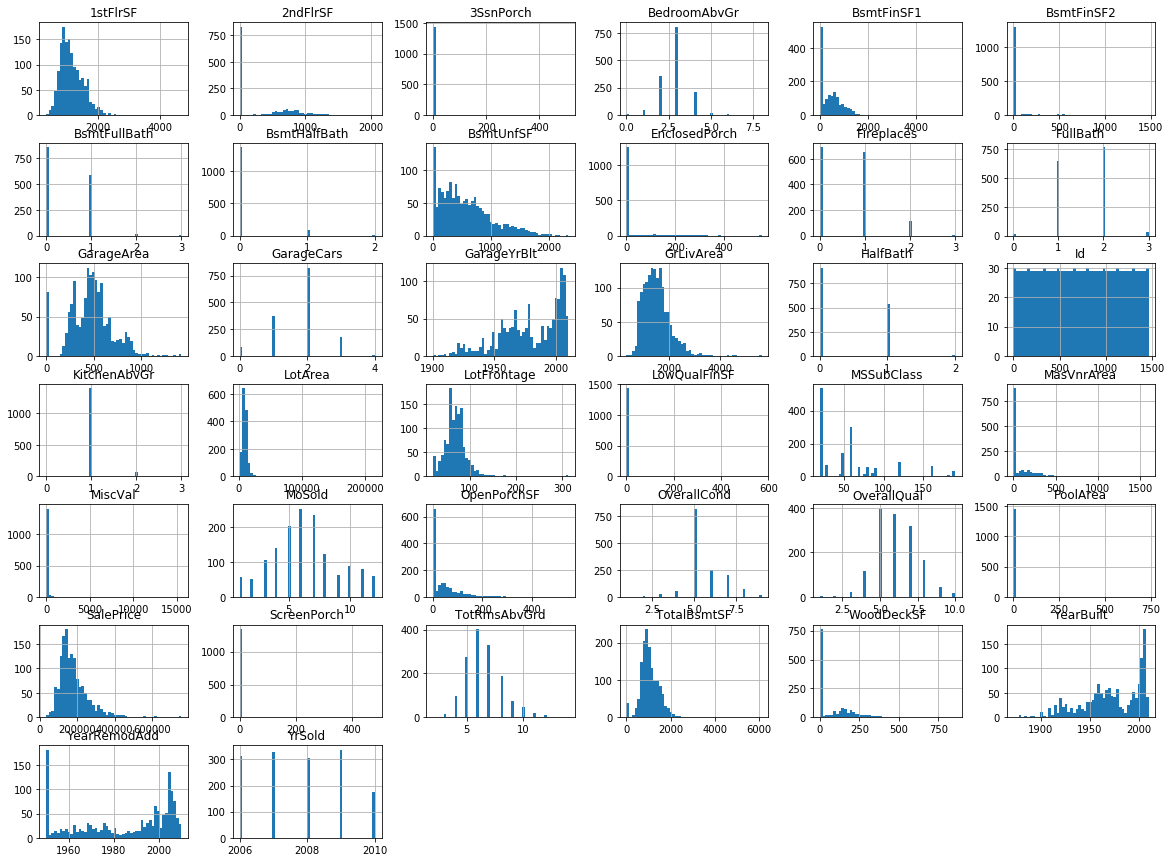

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

Distribution of Continuous Features:

In [8]:
continuous = ['LotFrontage',
'LotArea',
'MasVnrArea',
'BsmtFinSF1',
'BsmtFinSF2',
'BsmtUnfSF',
'TotalBsmtSF',
'1stFlrSF',
'2ndFlrSF',
'LowQualFinSF',
'GrLivArea',
'GarageArea',
'WoodDeckSF',
'OpenPorchSF',
'EnclosedPorch',
'3SsnPorch',
'ScreenPorch',
'PoolArea',
'MiscVal',
'SalePrice']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002529CA50F08>,
      dtype=object)

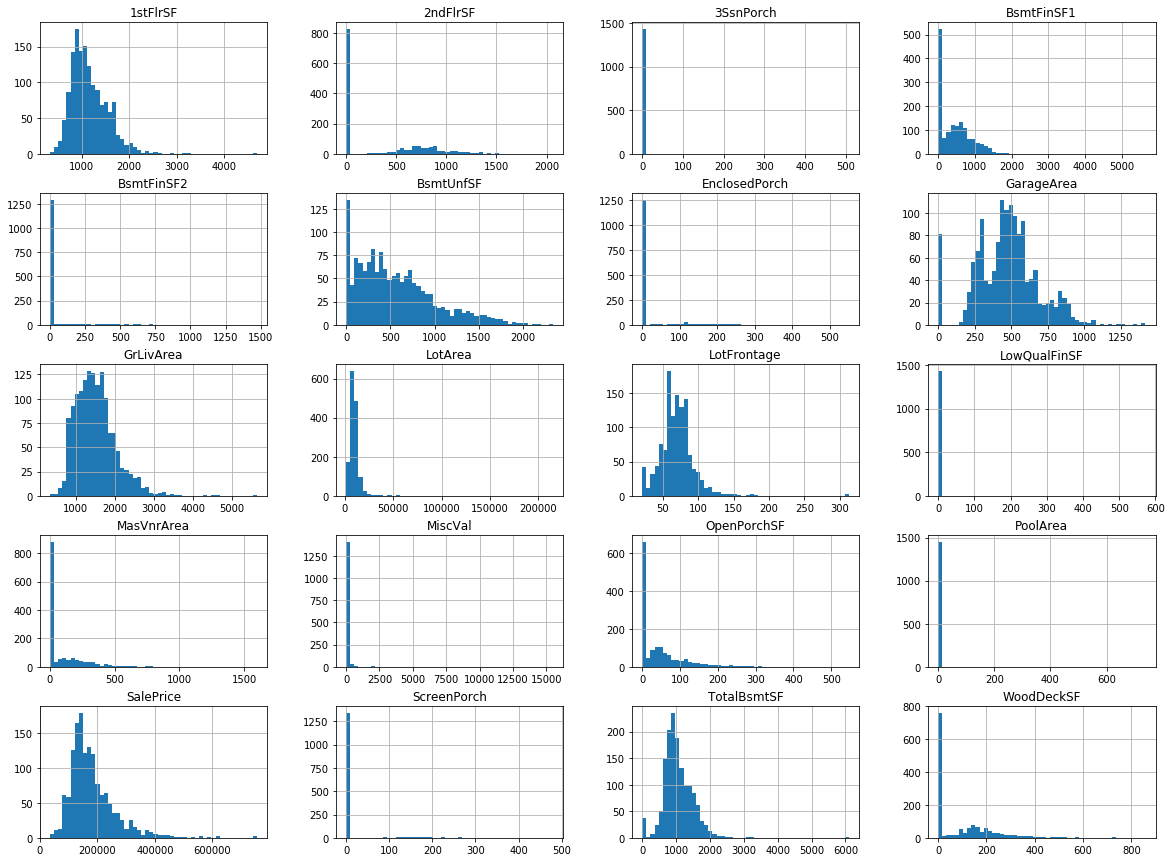

In [9]:
housing[continuous].hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
housing['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [11]:
housing['LowQualFinSF'].value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

- **_Much of the continuous features are skewed. Perhaps I should normalize._** 
- **_Perhaps I can get rid of some of these features like 'PoolArea' and 'LowQualFinSF' that seem to add nothing to the data._** 

Descriptive Statistics of Numerical Features:

In [12]:
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

Count distribution of Categorical Features:

In [13]:
housing.select_dtypes(include=[np.object]).columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [14]:
categorical = ['MSSubClass',
'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [15]:
for feature in categorical:
    display(housing[feature].value_counts().to_frame())
    print(f'There are {housing[feature].unique().size} features in {feature}.')

MSSubClass
20          536
60          299
50          144
120          87
30           69
160          63
70           60
80           58
90           52
190          30
85           20
75           16
45           12
180          10
40            4

There are 15 features in MSSubClass.


MSZoning
RL           1151
RM            218
FV             65
RH             16
C (all)        10

There are 5 features in MSZoning.


Street
Pave    1454
Grvl       6

There are 2 features in Street.


Alley
Grvl     50
Pave     41

There are 3 features in Alley.


LotShape
Reg       925
IR1       484
IR2        41
IR3        10

There are 4 features in LotShape.


LandContour
Lvl         1311
Bnk           63
HLS           50
Low           36

There are 4 features in LandContour.


Utilities
AllPub       1459
NoSeWa          1

There are 2 features in Utilities.


LotConfig
Inside        1052
Corner         263
CulDSac         94
FR2             47
FR3              4

There are 5 features in LotConfig.


LandSlope
Gtl       1382
Mod         65
Sev         13

There are 3 features in LandSlope.


Neighborhood
NAmes             225
CollgCr           150
OldTown           113
Edwards           100
Somerst            86
Gilbert            79
NridgHt            77
Sawyer             74
NWAmes             73
SawyerW            59
BrkSide            58
Crawfor            51
Mitchel            49
NoRidge            41
Timber             38
IDOTRR             37
ClearCr            28
SWISU              25
StoneBr            25
Blmngtn            17
MeadowV            17
BrDale             16
Veenker            11
NPkVill             9
Blueste             2

There are 25 features in Neighborhood.


Condition1
Norm          1260
Feedr           81
Artery          48
RRAn            26
PosN            19
RRAe            11
PosA             8
RRNn             5
RRNe             2

There are 9 features in Condition1.


Condition2
Norm          1445
Feedr            6
RRNn             2
Artery           2
PosN             2
RRAn             1
RRAe             1
PosA             1

There are 8 features in Condition2.


BldgType
1Fam        1220
TwnhsE       114
Duplex        52
Twnhs         43
2fmCon        31

There are 5 features in BldgType.


HouseStyle
1Story         726
2Story         445
1.5Fin         154
SLvl            65
SFoyer          37
1.5Unf          14
2.5Unf          11
2.5Fin           8

There are 8 features in HouseStyle.


OverallQual
5           397
6           374
7           319
8           168
4           116
9            43
3            20
10           18
2             3
1             2

There are 10 features in OverallQual.


OverallCond
5          821
6          252
7          205
8           72
4           57
3           25
9           22
2            5
1            1

There are 9 features in OverallCond.


RoofStyle
Gable         1141
Hip            286
Flat            13
Gambrel         11
Mansard          7
Shed             2

There are 6 features in RoofStyle.


RoofMatl
CompShg      1434
Tar&Grv        11
WdShngl         6
WdShake         5
ClyTile         1
Metal           1
Roll            1
Membran         1

There are 8 features in RoofMatl.


Exterior1st
VinylSd          515
HdBoard          222
MetalSd          220
Wd Sdng          206
Plywood          108
CemntBd           61
BrkFace           50
WdShing           26
Stucco            25
AsbShng           20
Stone              2
BrkComm            2
ImStucc            1
AsphShn            1
CBlock             1

There are 15 features in Exterior1st.


Exterior2nd
VinylSd          504
MetalSd          214
HdBoard          207
Wd Sdng          197
Plywood          142
CmentBd           60
Wd Shng           38
Stucco            26
BrkFace           25
AsbShng           20
ImStucc           10
Brk Cmn            7
Stone              5
AsphShn            3
CBlock             1
Other              1

There are 16 features in Exterior2nd.


MasVnrType
None            864
BrkFace         445
Stone           128
BrkCmn           15

There are 5 features in MasVnrType.


ExterQual
TA        906
Gd        488
Ex         52
Fa         14

There are 4 features in ExterQual.


ExterCond
TA       1282
Gd        146
Fa         28
Ex          3
Po          1

There are 5 features in ExterCond.


Foundation
PConc          647
CBlock         634
BrkTil         146
Slab            24
Stone            6
Wood             3

There are 6 features in Foundation.


BsmtQual
TA       649
Gd       618
Ex       121
Fa        35

There are 5 features in BsmtQual.


BsmtCond
TA      1311
Gd        65
Fa        45
Po         2

There are 5 features in BsmtCond.


BsmtExposure
No           953
Av           221
Gd           134
Mn           114

There are 5 features in BsmtExposure.


BsmtFinType1
Unf           430
GLQ           418
ALQ           220
BLQ           148
Rec           133
LwQ            74

There are 7 features in BsmtFinType1.


BsmtFinType2
Unf          1256
Rec            54
LwQ            46
BLQ            33
ALQ            19
GLQ            14

There are 7 features in BsmtFinType2.


Heating
GasA      1428
GasW        18
Grav         7
Wall         4
OthW         2
Floor        1

There are 6 features in Heating.


HeatingQC
Ex        741
TA        428
Gd        241
Fa         49
Po          1

There are 5 features in HeatingQC.


CentralAir
Y        1365
N          95

There are 2 features in CentralAir.


Electrical
SBrkr        1334
FuseA          94
FuseF          27
FuseP           3
Mix             1

There are 6 features in Electrical.


KitchenQual
TA          735
Gd          586
Ex          100
Fa           39

There are 4 features in KitchenQual.


Functional
Typ         1360
Min2          34
Min1          31
Mod           15
Maj1          14
Maj2           5
Sev            1

There are 7 features in Functional.


FireplaceQu
Gd          380
TA          313
Fa           33
Ex           24
Po           20

There are 6 features in FireplaceQu.


GarageType
Attchd          870
Detchd          387
BuiltIn          88
Basment          19
CarPort           9
2Types            6

There are 7 features in GarageType.


GarageFinish
Unf           605
RFn           422
Fin           352

There are 4 features in GarageFinish.


GarageQual
TA        1311
Fa          48
Gd          14
Ex           3
Po           3

There are 6 features in GarageQual.


GarageCond
TA        1326
Fa          35
Gd           9
Po           7
Ex           2

There are 6 features in GarageCond.


PavedDrive
Y        1340
N          90
P          30

There are 3 features in PavedDrive.


PoolQC
Gd       3
Ex       2
Fa       2

There are 4 features in PoolQC.


Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11

There are 5 features in Fence.


MiscFeature
Shed           49
Othr            2
Gar2            2
TenC            1

There are 5 features in MiscFeature.


SaleType
WD         1267
New         122
COD          43
ConLD         9
ConLw         5
ConLI         5
CWD           4
Oth           3
Con           2

There are 9 features in SaleType.


SaleCondition
Normal            1198
Partial            125
Abnorml            101
Family              20
Alloca              12
AdjLand              4

There are 6 features in SaleCondition.


- **_Street and Utilities to name a couple features seem useless._**
- **_PoolQC seems to be missing most of its data..._**

In [16]:
housing['PoolQC']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
50      NaN
51      NaN
52      NaN
53      NaN
54      NaN
55      NaN
56      NaN
57      NaN
58      NaN
59      NaN
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
71      NaN
72      NaN
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
82      NaN
83  

<p><a name="Missing"></a></p>

### Missing Values

In [17]:
housing.columns[housing.isnull().any()].size

19

In [18]:
missing_cols = housing.columns[housing.isnull().any()].tolist()
missing_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [19]:
missing = 1 - housing.count()/len(housing) 
missing

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
Street           0.000000
Alley            0.937671
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.005479
MasVnrArea       0.005479
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.025342
BsmtCond         0.025342
BsmtExposure     0.026027
BsmtFinType1     0.025342
BsmtFinSF1       0.000000
BsmtFinType2     0.026027
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF 

Percentage of missing values:

In [20]:
missing = missing[missing > 0]
missing

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [21]:
missing.sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

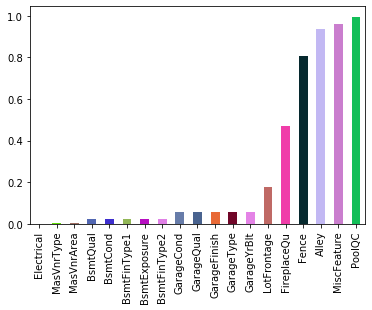

In [22]:
missing.sort_values().plot.bar(color=np.random.rand(len(missing),3))
plt.title('Features with Missing Values')
plt.show()

- **_I may have to get rid of some features due to the preponderance of missing values, and find suitable replacements for the missing values in other features._**


Relationship Between Missing Values and SalesPrice:

In [23]:
housing[missing_cols]

LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0            65.0   NaN    BrkFace       196.0       Gd       TA           No   
1            80.0   NaN       None         0.0       Gd       TA           Gd   
2            68.0   NaN    BrkFace       162.0       Gd       TA           Mn   
3            60.0   NaN       None         0.0       TA       Gd           No   
4            84.0   NaN    BrkFace       350.0       Gd       TA           Av   
5            85.0   NaN       None         0.0       Gd       TA           No   
6            75.0   NaN      Stone       186.0       Ex       TA           Av   
7             NaN   NaN      Stone       240.0       Gd       TA           Mn   
8            51.0   NaN       None         0.0       TA       TA           No   
9            50.0   NaN       None         0.0       TA       TA           No   
10           70.0   NaN       None         0.0       TA       TA           No   
11           85.0   NaN      Stone       286.0       Ex       TA           No   
12            NaN   NaN       None         0.0       TA       TA           No   
13           91.0   NaN      Stone       306.0       Gd       TA           Av   
14            NaN   NaN    BrkFace       212.0       TA       TA           No   
15           51.0   NaN       None         0.0       TA       TA           No   
16            NaN   NaN    BrkFace       180.0       TA       TA           No   
17           72.0   NaN       None         0.0      NaN      NaN          NaN   
18           66.0   NaN       None         0.0       TA       TA           No   
19           70.0   NaN       None         0.0       TA       TA           No   
20          101.0   NaN    BrkFace       380.0       Ex       TA           Av   
21           57.0  Grvl       None         0.0       TA       TA           No   
22           75.0   NaN    BrkFace       281.0       Gd       TA           No   
23           44.0   NaN       None         0.0       Gd       TA           No   
24            NaN   NaN       None         0.0       TA       TA           Mn   
25          110.0   NaN      Stone       640.0       Gd       TA           No   
26           60.0   NaN       None         0.0       TA       TA           Mn   
27           98.0   NaN      Stone       200.0       Ex       TA           No   
28           47.0   NaN       None         0.0       TA       TA           Gd   
29           60.0   NaN       None         0.0       TA       TA           No   
30           50.0  Pave       None         0.0       TA       TA           No   
31            NaN   NaN       None         0.0       TA       TA           No   
32           85.0   NaN       None         0.0       Ex       TA           Av   
33           70.0   NaN       None         0.0       TA       TA           No   
34           60.0   NaN    BrkFace       246.0       Ex       TA           No   
35          108.0   NaN      Stone       132.0       Ex       TA           Av   
36          112.0   NaN       None         0.0       Gd       TA           No   
37           74.0   NaN    BrkFace       650.0       TA       TA           No   
38           68.0   NaN       None         0.0       TA       TA           No   
39           65.0   NaN       None         0.0      NaN      NaN          NaN   
40           84.0   NaN    BrkFace       101.0       TA       TA           No   
41          115.0   NaN       None         0.0       TA       TA           Gd   
42            NaN   NaN       None         0.0       Gd       TA           Av   
43            NaN   NaN       None         0.0       Gd       TA           Av   
44           70.0   NaN       None         0.0       TA       TA           No   
45           61.0   NaN    BrkFace       412.0       Ex       TA           No   
46           48.0   NaN       None         0.0       Ex       TA           No   
47           84.0   NaN       None         0.0       Gd       TA           Av   
48           33.0   NaN       None   

In [24]:
# Note: Median is used since that measure of central tendency is resistant to outliers.
housing1 = housing[missing_cols].copy()
housing1[missing_cols] = np.where(housing[missing[missing > 0].index].isnull(), 1, 0)
housing1 = pd.concat([housing1, housing[['SalePrice']]], axis=1)
housing1

LotFrontage  Alley  MasVnrType  MasVnrArea  BsmtQual  BsmtCond  \
0               0      1           0           0         0         0   
1               0      1           0           0         0         0   
2               0      1           0           0         0         0   
3               0      1           0           0         0         0   
4               0      1           0           0         0         0   
5               0      1           0           0         0         0   
6               0      1           0           0         0         0   
7               1      1           0           0         0         0   
8               0      1           0           0         0         0   
9               0      1           0           0         0         0   
10              0      1           0           0         0         0   
11              0      1           0           0         0         0   
12              1      1           0           0         0         0   
13              0      1           0           0         0         0   
14              1      1           0           0         0         0   
15              0      1           0           0         0         0   
16              1      1           0           0         0         0   
17              0      1           0           0         1         1   
18              0      1           0           0         0         0   
19              0      1           0           0         0         0   
20              0      1           0           0         0         0   
21              0      0           0           0         0         0   
22              0      1           0           0         0         0   
23              0      1           0           0         0         0   
24              1      1           0           0         0         0   
25              0      1           0           0         0         0   
26              0      1           0           0         0         0   
27              0      1           0           0         0         0   
28              0      1           0           0         0         0   
29              0      1           0           0         0         0   
30              0      0           0           0         0         0   
31              1      1           0           0         0         0   
32              0      1           0           0         0         0   
33              0      1           0           0         0         0   
34              0      1           0           0         0         0   
35              0      1           0           0         0         0   
36              0      1           0           0         0         0   
37              0      1           0           0         0         0   
38              0      1           0           0         0         0   
39              0      1           0           0         1         1   
40              0      1           0           0         0         0   
41              0      1           0           0         0         0   
42              1      1           0           0         0         0   
43              1      1           0           0         0         0   
44              0      1           0           0         0         0   
45              0      1           0           0         0         0   
46              0      1           0           0         0         0   
47              0      1           0           0         0         0   
48              0      1           0           0         0         0   
49              0      1           0           0         0         0   
50              1      1           0           0         0         0   
51              0      1           0           0         0         0   
52              0      1           0           0         0         0   
53              0      1           0           0         0         0   
54              0      1           0          

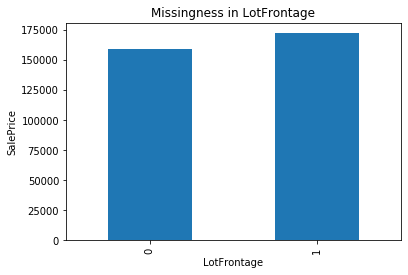

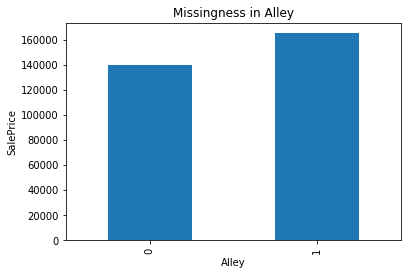

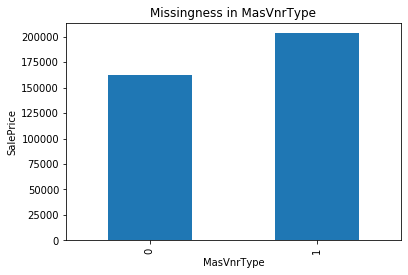

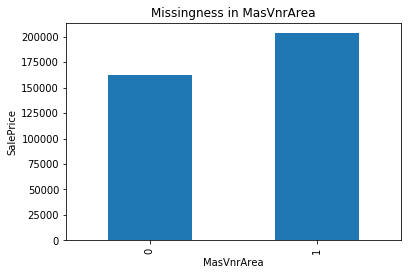

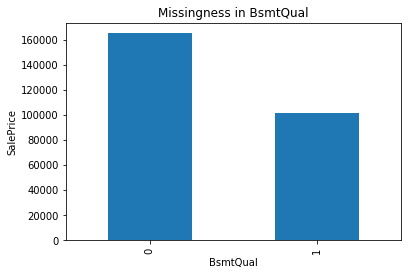

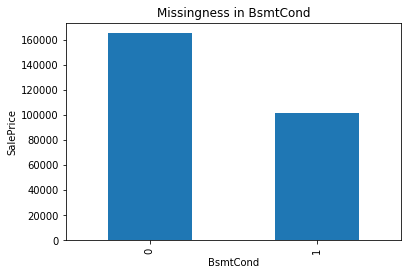

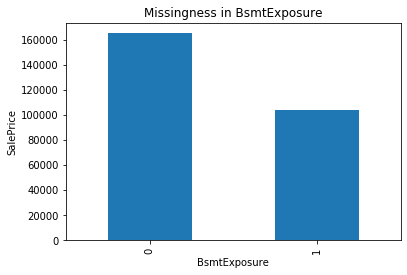

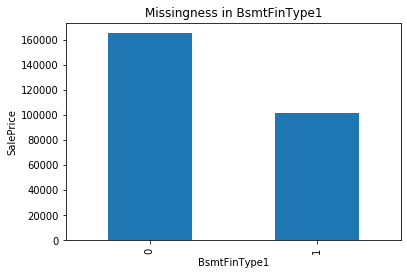

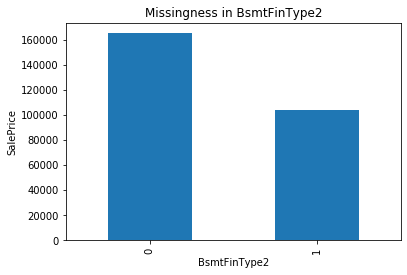

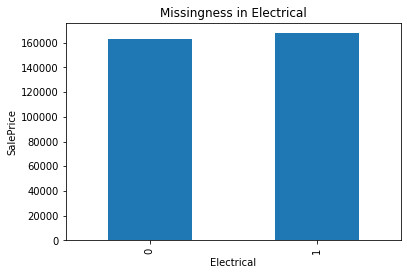

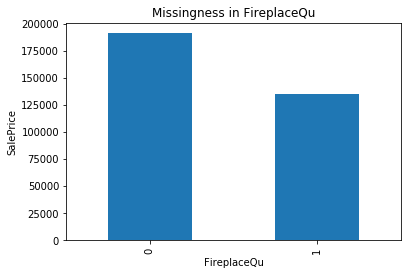

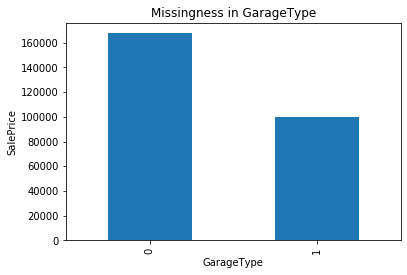

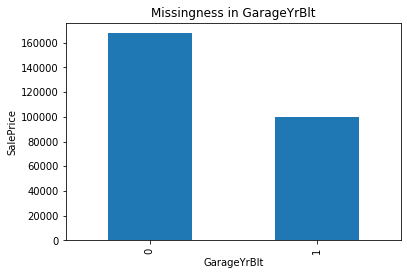

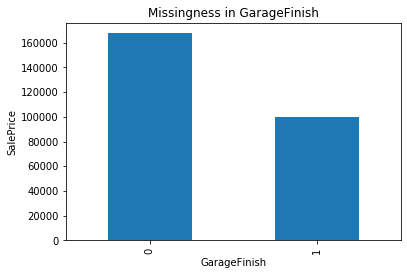

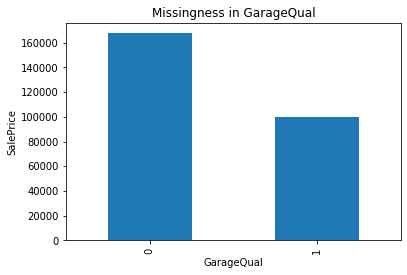

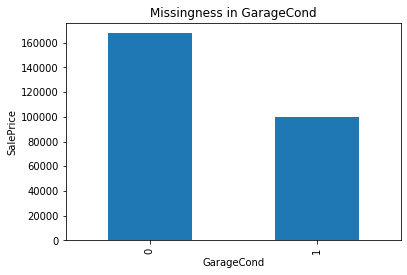

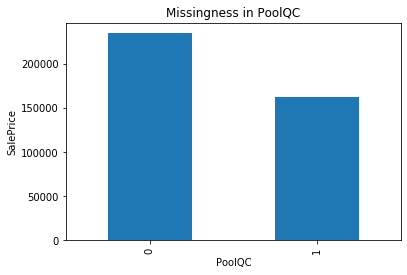

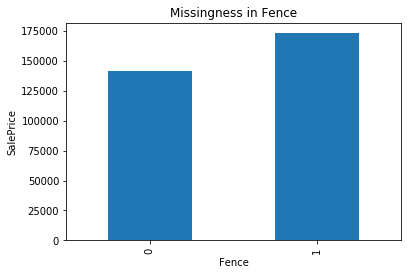

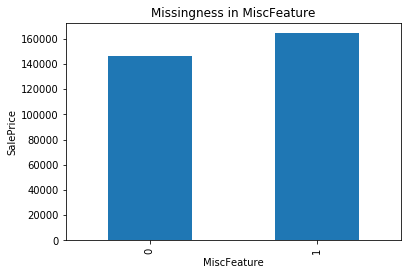

In [25]:
for feature in missing_cols:
    housing1.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(f'Missingness in {feature}')
    plt.ylabel('SalePrice')
    plt.show()

**_Due to the relationship between the missing values and SalePrice, it would prove useful to replace them with meaningful values instead of just dropping the columns._**

<p><a name="Correlation"></a></p>

### Correlation Among the Numerical Features 

In [26]:
numerical = housing.select_dtypes(include=[np.number]).columns.tolist()
numerical

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
correlation = housing[numerical].corr()
correlation

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [28]:
correlation['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

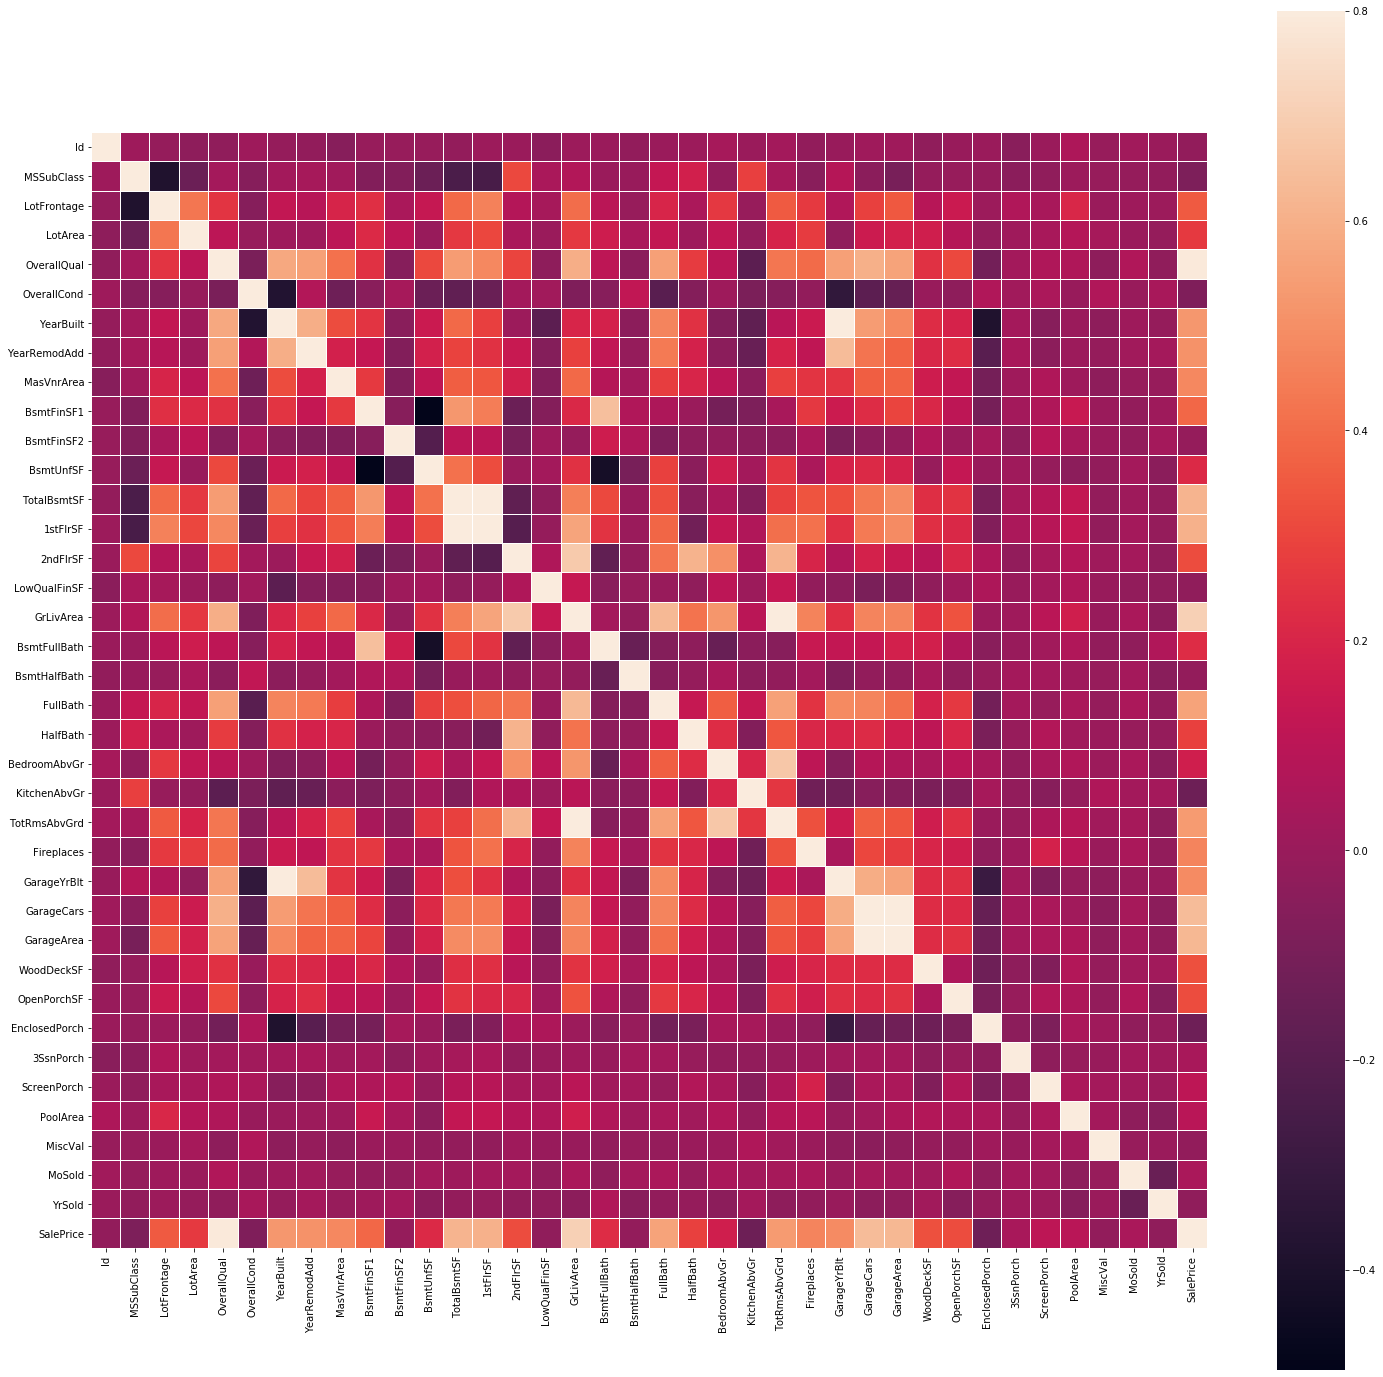

In [29]:
f,ax = plt.subplots(figsize=(25,25))
sns.heatmap(correlation, vmax=.8, linewidths=0.01, linecolor='white', square=True)
plt.title('Correlation Among Numerical Features')
plt.show()

**_There is high multicolinearity._**

The features that have a correlation greater than .5 with SalePrice:

In [30]:
n=11
features = correlation['SalePrice'].sort_values(ascending=False).index.tolist()[:n]
features

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

In [31]:
np.corrcoef(housing[features].values)

array([[1.        , 0.99999095, 0.99999961, ..., 0.99999412, 0.99997623,
        0.99997646],
       [0.99999095, 1.        , 0.99999014, ..., 0.99998377, 0.99999166,
        0.99999345],
       [0.99999961, 0.99999014, 1.        , ..., 0.99999584, 0.99997196,
        0.99997312],
       ...,
       [0.99999412, 0.99998377, 0.99999584, ..., 1.        , 0.99996068,
        0.99996546],
       [0.99997623, 0.99999166, 0.99997196, ..., 0.99996068, 1.        ,
        0.99999835],
       [0.99997646, 0.99999345, 0.99997312, ..., 0.99996546, 0.99999835,
        1.        ]])

In [32]:
correlation.loc[features,features]

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  \
SalePrice      1.000000     0.790982   0.708624    0.640409    0.623431   
OverallQual    0.790982     1.000000   0.593007    0.600671    0.562022   
GrLivArea      0.708624     0.593007   1.000000    0.467247    0.468997   
GarageCars     0.640409     0.600671   0.467247    1.000000    0.882475   
GarageArea     0.623431     0.562022   0.468997    0.882475    1.000000   
TotalBsmtSF    0.613581     0.537808   0.454868    0.434585    0.486665   
1stFlrSF       0.605852     0.476224   0.566024    0.439317    0.489782   
FullBath       0.560664     0.550600   0.630012    0.469672    0.405656   
TotRmsAbvGrd   0.533723     0.427452   0.825489    0.362289    0.337822   
YearBuilt      0.522897     0.572323   0.199010    0.537850    0.478954   
YearRemodAdd   0.507101     0.550684   0.287389    0.420622    0.371600   

              TotalBsmtSF  1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  \
SalePrice        0.613581  0.605852  0.560664      0.533723   0.522897   
OverallQual      0.537808  0.476224  0.550600      0.427452   0.572323   
GrLivArea        0.454868  0.566024  0.630012      0.825489   0.199010   
GarageCars       0.434585  0.439317  0.469672      0.362289   0.537850   
GarageArea       0.486665  0.489782  0.405656      0.337822   0.478954   
TotalBsmtSF      1.000000  0.819530  0.323722      0.285573   0.391452   
1stFlrSF         0.819530  1.000000  0.380637      0.409516   0.281986   
FullBath         0.323722  0.380637  1.000000      0.554784   0.468271   
TotRmsAbvGrd     0.285573  0.409516  0.554784      1.000000   0.095589   
YearBuilt        0.391452  0.281986  0.468271      0.095589   1.000000   
YearRemodAdd     0.291066  0.240379  0.439046      0.191740   0.592855   

              YearRemodAdd  
SalePrice         0.507101  
OverallQual       0.550684  
GrLivArea         0.287389  
GarageCars        0.420622  
GarageArea        0.371600  
TotalBsmtSF       0.291066  
1stFlrSF          0.240379  
FullBath          0.439046  
TotRmsAbvGrd      0.191740  
YearBuilt         0.592855  
YearRemodAdd      1.000000

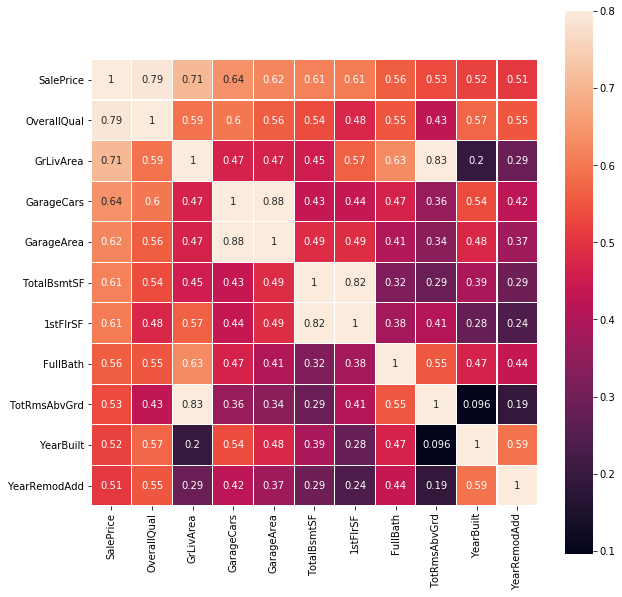

In [33]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation.loc[features,features], vmax=0.8, annot=True, linewidths=0.01, linecolor='white', square=True)
plt.title('Correlation Among Select Numerical Features')
plt.show()

**_Multicolinearity can be seen more plainly. For instance, GarageCars and GarageArea have a pearson correlation coefficient of 0.88. Since SalePrice and GarageCars have a higher correlation coefficient than SalePrice and GarageArea, it'd make sense to get rid of GarageArea_**.

<p><a name="Outliers"></a></p>

### Outliers

Documentation: 

"There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students."

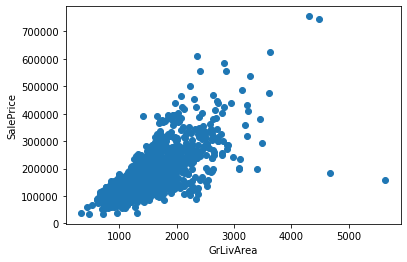

In [34]:
plt.scatter(housing['GrLivArea'],housing['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [35]:
housing['GrLivArea'].nlargest(5)

1298    5642
523     4676
1182    4476
691     4316
1169    3627
Name: GrLivArea, dtype: int64

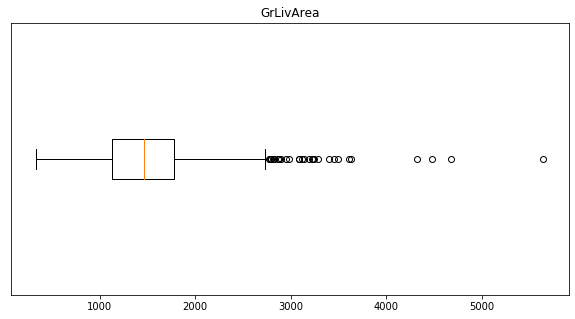

In [36]:
f,ax = plt.subplots(figsize=(10,5))
plt.boxplot(housing['GrLivArea'], vert=False)
plt.yticks(ticks=[])
plt.title('GrLivArea')
plt.show()

I see 4 values here. Let's see what other outliers may exist in the data:

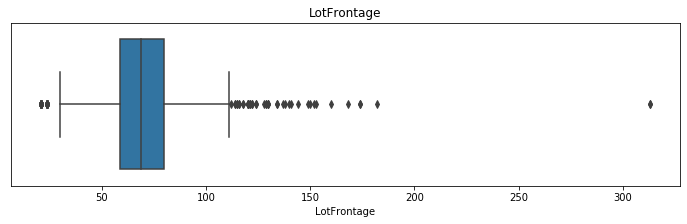

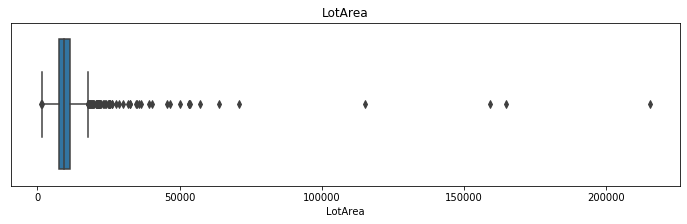

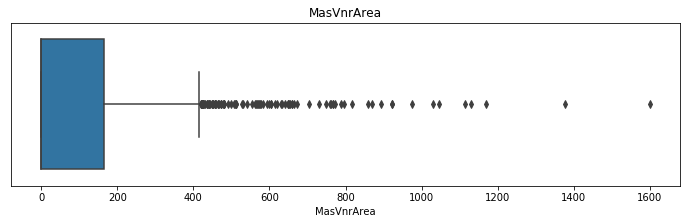

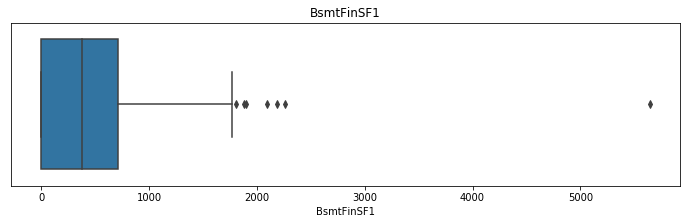

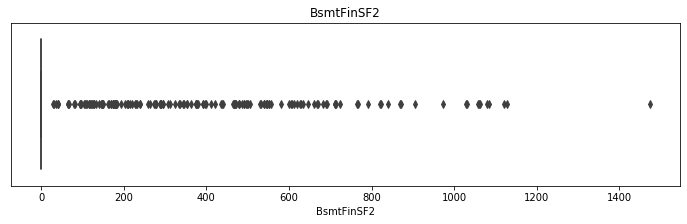

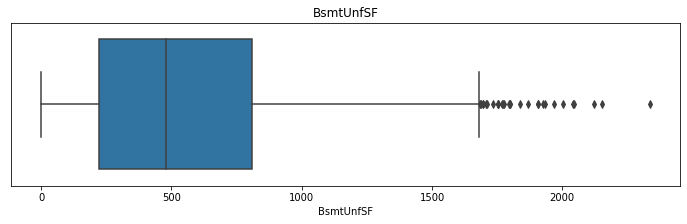

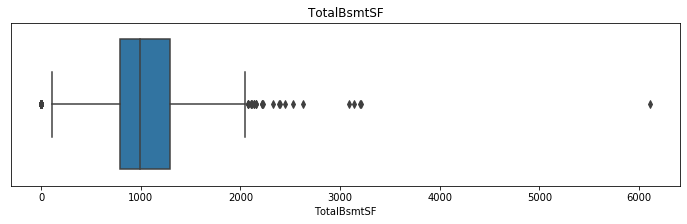

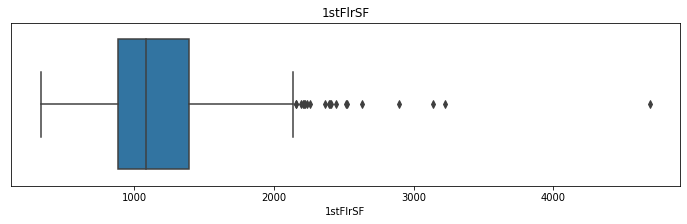

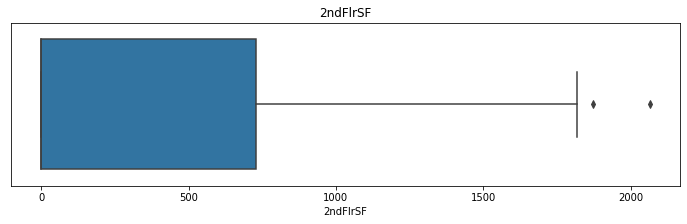

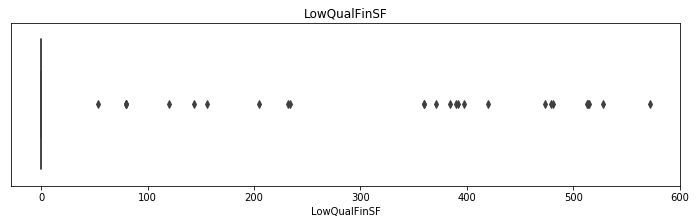

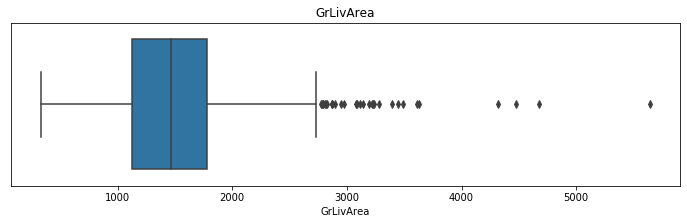

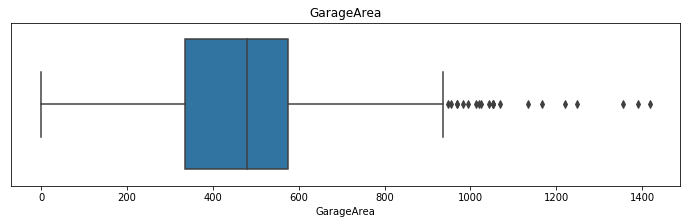

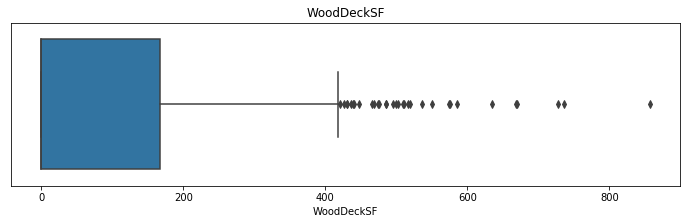

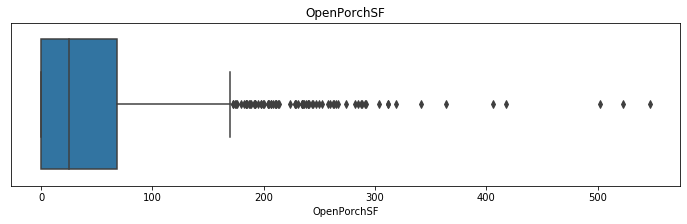

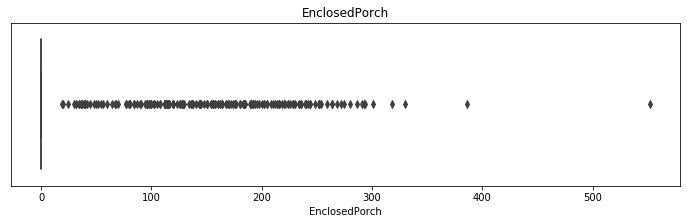

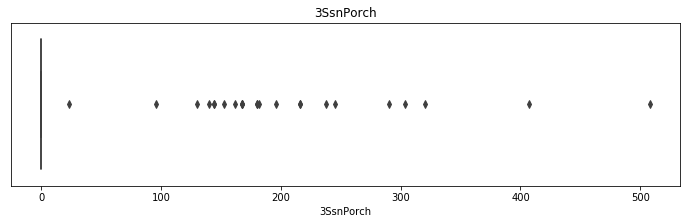

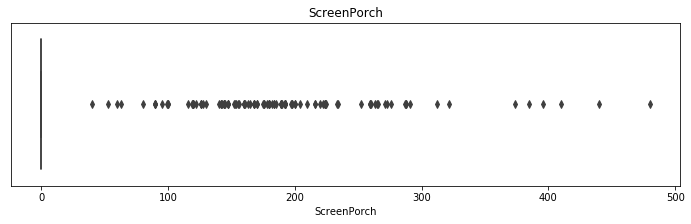

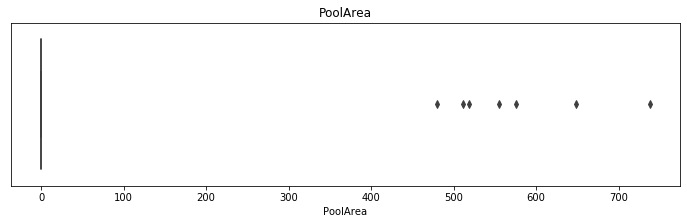

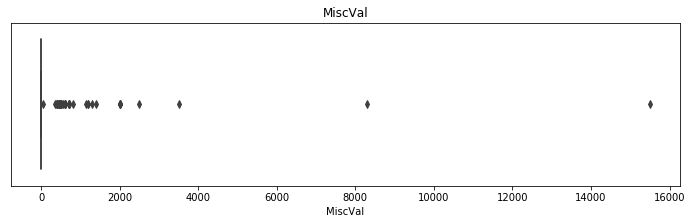

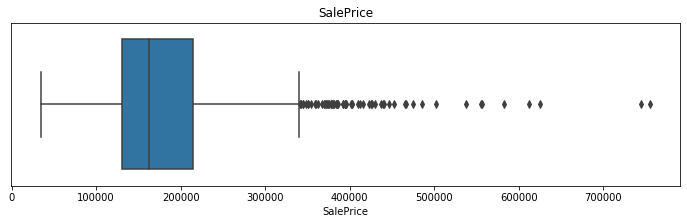

In [37]:
for feature in continuous:
    f,ax = plt.subplots(figsize=(12,3))
    sns.boxplot(x=housing[feature])
    plt.yticks(ticks=[])
    plt.title(feature)
    plt.show()

**_Outliers exist in the data. I'll consider how to best deal with them._**

<p><a name="Preparation"></a></p>

## Data Preparation

Note: I got the idea to combine the train and test datasets during the Feature Engineering portion from Alexandru (https://www.kaggle.com/apapiu/regularized-linear-models) and separating them afterwards, instead of applying the functions below on them separately. I went this route after the modeling failed since the train and test datasets ended up with a different number of columns.
So shout out to him.

<p><a name="Drop"></a></p>

### Drop Columns

In [38]:
train,test = pd.read_csv('data/train.csv'),pd.read_csv('data/test.csv')
dataset = pd.concat((train.loc[:,'MSSubClass':], test.loc[:,'MSSubClass':]))
dataset.shape

C:\Users\TRW\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(2919, 80)

In [39]:
# def drop_columns(dataset,features):
#     data = dataset.copy()
#     return data.drop(columns=features)

In [40]:
# features=['Id']

In [41]:
# housingD = drop_columns(housing,features)
# housingD.columns

In [42]:
# train,test=drop_columns(train),drop_columns(test)

_Note: Multicolinearity does **not** affect the accuracy of predictive models, including regression models. However, the feature importance scores will be influenced. Since the objective is to predict house prices, and not to determine the most important features, I won't attempt to mitigate multicolinearity. Hence I only dropped the *Id* column._

<p><a name="H_Outliers"></a></p>

### Handle Outliers

In [43]:
# housingD.shape

In [44]:
# housingO = housingD.copy()

In [45]:
# housingO[housingO['GrLivArea'] > 4000].shape

In [46]:
# housingO = housingO[housingO['GrLivArea'] < 4000]
# housingO.shape

In [47]:
# housingO[housingO['LotFrontage'] > 200].shape

In [48]:
# housingO = housingO[(housingO['LotFrontage'].isna()) | (housingO['LotFrontage'] < 200)]
# housingO.shape

In [49]:
# housingO[housingO['LotArea'] > 100000] .shape

In [50]:
# housingO = housingO[housingO['LotArea'] < 100000] 
# housingO.shape

In [51]:
def handle_outliers(dataset):
    data = dataset.copy()
    condition1 = data['GrLivArea'] < 4000
    condition2 = (data['LotFrontage'].isna()) | (data['LotFrontage'] < 200)
    condition3 = data['LotArea'] < 100000
    return data[condition1 & condition2 & condition3]

In [52]:
# handle_outliers(housingD).shape

In [53]:
# train,test=handle_outliers(train),handle_outliers(test)

In [54]:
dataset = handle_outliers(dataset)

<p><a name="H_Missing"></a></p>

### Missing Values

In [55]:
# missing.sort_values(ascending=False)

According to the documentation, the **NA** in the follow features means "not present" or "no access." Let's give the **NA**s a suitable value so that they are not interpreted as _missing_.

    PoolQC          
    MiscFeature     
    Alley           
    Fence           
    FireplaceQu     
    GarageYrBlt     
    GarageType      
    GarageFinish    
    GarageQual      
    GarageCond      
    BsmtFinType2    
    BsmtExposure    
    BsmtFinType1    
    BsmtCond        
    BsmtQual        
    MasVnrArea      
    MasVnrType      

In [56]:
# housingM = housingO.copy()
# housingM.head()

In [57]:
def replace_na_cat(dataset,features):
    data = dataset.copy()
    data[features] = data[features].fillna('NotApplicable')
    return data

In [58]:
features = ['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [59]:
# housingM=replace_na_cat(housingM,features)
# housingM.head(10)

In [60]:
# train,test=replace_na_cat(train,features),replace_na_cat(test,features)

In [61]:
dataset = replace_na_cat(dataset,features)

Note: Since there are no 0 (zero) values in the 'LotFrontage' feature, it is possible that the missing values, although not specified in the documentation, should be zero to reflect that the street is not directly connected to the property. The lack of **NA** values in the 'Street' feature does not affect my hypothesis since one can still have road access without the road being directly connected to one's property. SO, let's the **NA** values in that column zero in addition to the other features.

In [62]:
def replace_na_num(dataset,features):
    data = dataset.copy()
    data[features] = data[features].fillna(0)
    return data

In [63]:
features = ['MasVnrArea', 'GarageYrBlt', 'LotFrontage']

In [64]:
# housingM=replace_na_num(housingM,features)
# housingM.head(10)

In [65]:
# train,test=replace_na_num(train,features),replace_na_num(test,features)

In [66]:
# missing = 1 - housingM.count()/len(housingM) 
# missing = missing[missing > 0]
# missing.sort_values(ascending=False)

In [67]:
# housingM[housingM['Electrical'].isna()]

In [68]:
# housingM['SalePrice'].median()

In [69]:
# # From above:
# housing1.groupby('Electrical')['SalePrice'].median().plot.bar()
# plt.title(f'Missingness in Electrical')
# plt.ylabel('SalePrice')
# plt.show()

In [70]:
dataset = replace_na_num(dataset,features)

Given that only one feature with a missing value remains, that feature only has one missing value, and the SalePrice for that house is fairly close to the median SalePrice, let's just get rid of its missing value(s).

In [71]:
# housingM.shape

In [72]:
# housingM[~housingM['Electrical'].isna()].shape


In [73]:
def remove_missing(dataset,features):
    data = dataset.copy()
    return data[~data[features].isna()]

In [74]:
features = 'Electrical'

In [75]:
# housingM = remove_missing(housingM,features)
# housingM.shape

In [76]:
# housingM.head()

In [77]:
# train,test=remove_missing(train,features),remove_missing(test,features)

In [78]:
dataset = remove_missing(dataset,features)

<p><a name="Impute"></a></p>

### Imputation
Not applicable; all of the missing values are accounted for.

In [79]:
# # pip install impyute
# from impyute.imputation.cs import mice
# imputed_numerics = mice(housingFE[numerical])
# imputed_numerics.columns = housingFE[numerical].columns
# imputed_numerics.head() 


<p><a name="Encode"></a></p>

### Encoding

In [80]:
# housingE = housingM.copy()

I need to encode the following features:

In [81]:
object_features = dataset.select_dtypes(include=[np.object]).columns
object_features

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [82]:
# object_features = housingE.select_dtypes(include=[np.object]).columns
# object_features

In [83]:
# housingE[object_features].head()

In [84]:
# for feature in object_features:
#     display(housingE[object_features][feature].value_counts().to_frame())
#     print(f'There are {housingE[feature].unique().size} features in {feature}.')



In [85]:
nominal = ['MSSubClass', 
'MSZoning', 
'Street',
'Alley', 
'LandContour', 
'LotConfig', 
'Neighborhood',
'Condition1', 
'Condition2', 
'BldgType', 
'HouseStyle',
'RoofStyle', 
'RoofMatl', 
'Exterior1st',
'Exterior2nd',
'MasVnrType',
'Foundation', 
'Heating', 
'CentralAir',
'GarageType',
'MiscFeature',
'SaleType',
'SaleCondition']
 
ordinal = ['LotShape', 
'Utilities', 
'LandSlope', 
'OverallQual',
'OverallCond',
'ExterQual',
'ExterCond',
'BsmtQual', 
'BsmtCond',
'BsmtExposure',
'BsmtFinType1',
'BsmtFinType2',
'HeatingQC', 
'Electrical', 
'KitchenQual', 
'Functional',
'FireplaceQu', 
'GarageFinish',
'GarageQual', 
'GarageCond',
'PavedDrive', 
'PoolQC', 
'Fence']

In [86]:
noms = set(object_features) & set(nominal)
noms

{'Alley',
 'BldgType',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LandContour',
 'LotConfig',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street'}

In [87]:
ords = set(object_features) & set(ordinal)
ords

{'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'HeatingQC',
 'KitchenQual',
 'LandSlope',
 'LotShape',
 'PavedDrive',
 'PoolQC',
 'Utilities'}

In [88]:
# for feature in noms:
#     display(housingE[object_features][feature].value_counts().to_frame())
#     print(f'There are {housingE[feature].unique().size} features in {feature}.')


In [89]:
# for feature in ords:
#     display(housingE[object_features][feature].value_counts().to_frame())
#     print(f'There are {housingE[feature].unique().size} features in {feature}.')


**Each type of categorical feature requires its own type of encoding.**

Encode Nominal Data (Dummy Encoding):

In [90]:
def encode_noms(dataset,features):
    import pandas as pd
    data = dataset.copy()
    return pd.get_dummies(data,columns=features,drop_first=True)

In [91]:
# housingE = encode_noms(housingE,noms)
# housingE.head()

In [92]:
# train,test=encode_noms(train,noms),encode_noms(test,noms)

In [93]:
dataset=encode_noms(dataset,noms)

Encode Ordinal Data (Integer Encoding):

In [94]:
def encode_ords(dataset,features):
#     pip install category_encoders
    from category_encoders.ordinal import OrdinalEncoder
    data = dataset.copy()
    enc = OrdinalEncoder(cols=features,return_df=True)
    return enc.fit_transform(data)

In [95]:
# housingE = encode_ords(housingE,ords)   
# housingE.head()

In [96]:
# housingE.dtypes

In [97]:
# train,test=encode_ords(train,ords),encode_ords(test,ords)

In [98]:
dataset=encode_noms(dataset,ords)

<p><a name="Normalize"></a></p>

### Normalization
Not applicable; normalization is not required for XGBoost.

<p><a name="Selection"></a></p>

### Feature Selection
Not applicable. XGBoost can do feature selection for you anyway.

<p><a name="Modeling"></a></p>

## Data Modeling Using XGBoost

I decided to utilize the XGBoost Python library due to its known advantages over traditional Gradient Boosting and Random Forest.

More info: https://xgboost.readthedocs.io/en/latest/index.html

In [99]:
# pip install xgboost

In [100]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
%matplotlib inline

In [157]:
X = dataset[:1450].drop(columns=['SalePrice'])

In [158]:
x = dataset[1450:].drop(columns=['SalePrice'])

In [159]:
Y = dataset['SalePrice'][:1450]

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

<p><a name="Boost"></a></p>

### XGB Gradient Boosting

In [190]:
# Gradient Boosting
params1 = {
    'n_estimators':[1000],
    'max_depth':[3,5],
    'learning_rate':np.linspace(0.001,0.1,4),#
    'gamma':np.linspace(0,1,5),#
    'min_child_weight':np.linspace(1,5,3),#
    'subsample':np.linspace(0.3,0.9,3), # 
    'colsample_bytree':np.linspace(0.3,0.9,3),#
    'reg_alpha':[0,.01,.1,.5,1],#
    'reg_lambda':[0,.01,.1,.5,1],#    
    'scale_pos_weight':np.linspace(1,5,3)#
}

# params1 = {
#     'max_depth':[3],#
# }

xgb_estimator1 = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000,
     subsample=0.6, colsample_bytree=0.6,seed=42)

gsearch1 = GridSearchCV(estimator=xgb_estimator1,param_grid=params1,
                       scoring='neg_root_mean_squared_error',n_jobs=4,
                       refit='neg_root_mean_squared_error',cv=10,verbose=11)

gsearch1.fit(X_train,y_train)

Fitting 10 folds for each of 81000 candidates, totalling 810000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    5.4s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    5.5s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    8.7s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done  15 tasks      | elapsed:   15.4s
[Parallel(

[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 138 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 139 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 140 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 141 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 142 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 143 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 145 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 147 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 148 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 149 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 150 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 151 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 152 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 272 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 273 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 274 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 275 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 276 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 277 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 278 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 279 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 281 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 282 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 283 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 284 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 285 tasks      | elapsed:  4.7min
[Parallel(n_jobs=4)]: Done 286 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Done 287 tasks      | elapsed:  4.8min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 408 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 409 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 410 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 411 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 412 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 413 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 414 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 415 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 416 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 417 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 418 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 419 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 420 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 421 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 422 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Done 423 tasks      | elapsed:  6.9min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 544 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 545 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done 546 tasks      | elapsed:  8.9min
[Parallel(n_jobs=4)]: Done 547 tasks      | elapsed:  8.9min
[Parallel(n_jobs=4)]: Done 548 tasks      | elapsed:  8.9min
[Parallel(n_jobs=4)]: Done 549 tasks      | elapsed:  8.9min
[Parallel(n_jobs=4)]: Done 550 tasks      | elapsed:  8.9min
[Parallel(n_jobs=4)]: Done 551 tasks      | elapsed:  8.9min
[Parallel(n_jobs=4)]: Done 552 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 553 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 554 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 555 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 556 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 557 tasks      | elapsed:  9.0min
[Parallel(n_jobs=4)]: Done 558 tasks      | elapsed:  9.1min
[Parallel(n_jobs=4)]: Done 559 tasks      | elapsed:  9.1min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 680 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done 681 tasks      | elapsed: 10.8min
[Parallel(n_jobs=4)]: Done 682 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done 683 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done 684 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done 685 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done 686 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done 687 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done 688 tasks      | elapsed: 10.9min
[Parallel(n_jobs=4)]: Done 689 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Done 690 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Done 691 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Done 692 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Done 693 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Done 694 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Done 695 tasks      | elapsed: 11.0min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 816 tasks      | elapsed: 12.8min
[Parallel(n_jobs=4)]: Done 817 tasks      | elapsed: 12.8min
[Parallel(n_jobs=4)]: Done 818 tasks      | elapsed: 12.8min
[Parallel(n_jobs=4)]: Done 819 tasks      | elapsed: 12.8min
[Parallel(n_jobs=4)]: Done 820 tasks      | elapsed: 12.9min
[Parallel(n_jobs=4)]: Done 821 tasks      | elapsed: 12.9min
[Parallel(n_jobs=4)]: Done 822 tasks      | elapsed: 12.9min
[Parallel(n_jobs=4)]: Done 823 tasks      | elapsed: 12.9min
[Parallel(n_jobs=4)]: Done 824 tasks      | elapsed: 12.9min
[Parallel(n_jobs=4)]: Done 825 tasks      | elapsed: 12.9min
[Parallel(n_jobs=4)]: Done 826 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Done 827 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Done 828 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Done 829 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Done 830 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Done 831 tasks      | elapsed: 13.0min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 952 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 953 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 954 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 955 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 956 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 957 tasks      | elapsed: 14.8min
[Parallel(n_jobs=4)]: Done 958 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 959 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 960 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 961 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 962 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 963 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 964 tasks      | elapsed: 15.0min
[Parallel(n_jobs=4)]: Done 965 tasks      | elapsed: 15.0min
[Parallel(n_jobs=4)]: Done 966 tasks      | elapsed: 15.0min
[Parallel(n_jobs=4)]: Done 967 tasks      | elapsed: 15.0min
[Parallel(n_jobs=4)]: Do

[Parallel(n_jobs=4)]: Done 1086 tasks      | elapsed: 16.8min
[Parallel(n_jobs=4)]: Done 1087 tasks      | elapsed: 16.8min
[Parallel(n_jobs=4)]: Done 1088 tasks      | elapsed: 16.8min
[Parallel(n_jobs=4)]: Done 1089 tasks      | elapsed: 16.8min
[Parallel(n_jobs=4)]: Done 1090 tasks      | elapsed: 16.8min
[Parallel(n_jobs=4)]: Done 1091 tasks      | elapsed: 16.8min
[Parallel(n_jobs=4)]: Done 1092 tasks      | elapsed: 16.8min
[Parallel(n_jobs=4)]: Done 1093 tasks      | elapsed: 16.8min
[Parallel(n_jobs=4)]: Done 1094 tasks      | elapsed: 16.9min
[Parallel(n_jobs=4)]: Done 1095 tasks      | elapsed: 16.9min
[Parallel(n_jobs=4)]: Done 1096 tasks      | elapsed: 16.9min
[Parallel(n_jobs=4)]: Done 1097 tasks      | elapsed: 16.9min
[Parallel(n_jobs=4)]: Done 1098 tasks      | elapsed: 16.9min
[Parallel(n_jobs=4)]: Done 1099 tasks      | elapsed: 16.9min
[Parallel(n_jobs=4)]: Done 1100 tasks      | elapsed: 17.0min
[Parallel(n_jobs=4)]: Done 1101 tasks      | elapsed: 17.0min
[Paralle

[Parallel(n_jobs=4)]: Done 1220 tasks      | elapsed: 18.7min
[Parallel(n_jobs=4)]: Done 1221 tasks      | elapsed: 18.7min
[Parallel(n_jobs=4)]: Done 1222 tasks      | elapsed: 18.7min
[Parallel(n_jobs=4)]: Done 1223 tasks      | elapsed: 18.7min
[Parallel(n_jobs=4)]: Done 1224 tasks      | elapsed: 18.8min
[Parallel(n_jobs=4)]: Done 1225 tasks      | elapsed: 18.8min
[Parallel(n_jobs=4)]: Done 1226 tasks      | elapsed: 18.8min
[Parallel(n_jobs=4)]: Done 1227 tasks      | elapsed: 18.8min
[Parallel(n_jobs=4)]: Done 1228 tasks      | elapsed: 18.8min
[Parallel(n_jobs=4)]: Done 1229 tasks      | elapsed: 18.8min
[Parallel(n_jobs=4)]: Done 1230 tasks      | elapsed: 18.8min
[Parallel(n_jobs=4)]: Done 1231 tasks      | elapsed: 18.8min
[Parallel(n_jobs=4)]: Done 1232 tasks      | elapsed: 18.9min
[Parallel(n_jobs=4)]: Done 1233 tasks      | elapsed: 18.9min
[Parallel(n_jobs=4)]: Done 1234 tasks      | elapsed: 18.9min
[Parallel(n_jobs=4)]: Done 1235 tasks      | elapsed: 18.9min
[Paralle

[Parallel(n_jobs=4)]: Done 1354 tasks      | elapsed: 20.6min
[Parallel(n_jobs=4)]: Done 1355 tasks      | elapsed: 20.6min
[Parallel(n_jobs=4)]: Done 1356 tasks      | elapsed: 20.7min
[Parallel(n_jobs=4)]: Done 1357 tasks      | elapsed: 20.7min
[Parallel(n_jobs=4)]: Done 1358 tasks      | elapsed: 20.7min
[Parallel(n_jobs=4)]: Done 1359 tasks      | elapsed: 20.7min
[Parallel(n_jobs=4)]: Done 1360 tasks      | elapsed: 20.7min
[Parallel(n_jobs=4)]: Done 1361 tasks      | elapsed: 20.7min
[Parallel(n_jobs=4)]: Done 1362 tasks      | elapsed: 20.8min
[Parallel(n_jobs=4)]: Done 1363 tasks      | elapsed: 20.8min
[Parallel(n_jobs=4)]: Done 1364 tasks      | elapsed: 20.8min
[Parallel(n_jobs=4)]: Done 1365 tasks      | elapsed: 20.8min
[Parallel(n_jobs=4)]: Done 1366 tasks      | elapsed: 20.8min
[Parallel(n_jobs=4)]: Done 1367 tasks      | elapsed: 20.8min
[Parallel(n_jobs=4)]: Done 1368 tasks      | elapsed: 20.8min
[Parallel(n_jobs=4)]: Done 1369 tasks      | elapsed: 20.8min
[Paralle

[Parallel(n_jobs=4)]: Done 1488 tasks      | elapsed: 22.6min
[Parallel(n_jobs=4)]: Done 1489 tasks      | elapsed: 22.6min
[Parallel(n_jobs=4)]: Done 1490 tasks      | elapsed: 22.6min
[Parallel(n_jobs=4)]: Done 1491 tasks      | elapsed: 22.6min
[Parallel(n_jobs=4)]: Done 1492 tasks      | elapsed: 22.7min
[Parallel(n_jobs=4)]: Done 1493 tasks      | elapsed: 22.7min
[Parallel(n_jobs=4)]: Done 1494 tasks      | elapsed: 22.7min
[Parallel(n_jobs=4)]: Done 1495 tasks      | elapsed: 22.7min
[Parallel(n_jobs=4)]: Done 1496 tasks      | elapsed: 22.7min
[Parallel(n_jobs=4)]: Done 1497 tasks      | elapsed: 22.7min
[Parallel(n_jobs=4)]: Done 1498 tasks      | elapsed: 22.8min
[Parallel(n_jobs=4)]: Done 1499 tasks      | elapsed: 22.8min
[Parallel(n_jobs=4)]: Done 1500 tasks      | elapsed: 22.8min
[Parallel(n_jobs=4)]: Done 1501 tasks      | elapsed: 22.8min
[Parallel(n_jobs=4)]: Done 1502 tasks      | elapsed: 22.8min
[Parallel(n_jobs=4)]: Done 1503 tasks      | elapsed: 22.8min
[Paralle

[Parallel(n_jobs=4)]: Done 1622 tasks      | elapsed: 24.6min
[Parallel(n_jobs=4)]: Done 1623 tasks      | elapsed: 24.6min
[Parallel(n_jobs=4)]: Done 1624 tasks      | elapsed: 24.6min
[Parallel(n_jobs=4)]: Done 1625 tasks      | elapsed: 24.6min
[Parallel(n_jobs=4)]: Done 1626 tasks      | elapsed: 24.6min
[Parallel(n_jobs=4)]: Done 1627 tasks      | elapsed: 24.6min
[Parallel(n_jobs=4)]: Done 1628 tasks      | elapsed: 24.6min
[Parallel(n_jobs=4)]: Done 1629 tasks      | elapsed: 24.6min
[Parallel(n_jobs=4)]: Done 1630 tasks      | elapsed: 24.7min
[Parallel(n_jobs=4)]: Done 1631 tasks      | elapsed: 24.7min
[Parallel(n_jobs=4)]: Done 1632 tasks      | elapsed: 24.7min
[Parallel(n_jobs=4)]: Done 1633 tasks      | elapsed: 24.7min
[Parallel(n_jobs=4)]: Done 1634 tasks      | elapsed: 24.7min
[Parallel(n_jobs=4)]: Done 1635 tasks      | elapsed: 24.7min
[Parallel(n_jobs=4)]: Done 1636 tasks      | elapsed: 24.7min
[Parallel(n_jobs=4)]: Done 1637 tasks      | elapsed: 24.7min
[Paralle

[Parallel(n_jobs=4)]: Done 1756 tasks      | elapsed: 26.5min
[Parallel(n_jobs=4)]: Done 1757 tasks      | elapsed: 26.5min
[Parallel(n_jobs=4)]: Done 1758 tasks      | elapsed: 26.5min
[Parallel(n_jobs=4)]: Done 1759 tasks      | elapsed: 26.5min
[Parallel(n_jobs=4)]: Done 1760 tasks      | elapsed: 26.6min
[Parallel(n_jobs=4)]: Done 1761 tasks      | elapsed: 26.6min
[Parallel(n_jobs=4)]: Done 1762 tasks      | elapsed: 26.6min
[Parallel(n_jobs=4)]: Done 1763 tasks      | elapsed: 26.6min
[Parallel(n_jobs=4)]: Done 1764 tasks      | elapsed: 26.6min
[Parallel(n_jobs=4)]: Done 1765 tasks      | elapsed: 26.6min
[Parallel(n_jobs=4)]: Done 1766 tasks      | elapsed: 26.7min
[Parallel(n_jobs=4)]: Done 1767 tasks      | elapsed: 26.7min
[Parallel(n_jobs=4)]: Done 1768 tasks      | elapsed: 26.7min
[Parallel(n_jobs=4)]: Done 1769 tasks      | elapsed: 26.7min
[Parallel(n_jobs=4)]: Done 1770 tasks      | elapsed: 26.7min
[Parallel(n_jobs=4)]: Done 1771 tasks      | elapsed: 26.7min
[Paralle

[Parallel(n_jobs=4)]: Done 1890 tasks      | elapsed: 28.5min
[Parallel(n_jobs=4)]: Done 1891 tasks      | elapsed: 28.5min
[Parallel(n_jobs=4)]: Done 1892 tasks      | elapsed: 28.5min
[Parallel(n_jobs=4)]: Done 1893 tasks      | elapsed: 28.5min
[Parallel(n_jobs=4)]: Done 1894 tasks      | elapsed: 28.5min
[Parallel(n_jobs=4)]: Done 1895 tasks      | elapsed: 28.5min
[Parallel(n_jobs=4)]: Done 1896 tasks      | elapsed: 28.5min
[Parallel(n_jobs=4)]: Done 1897 tasks      | elapsed: 28.5min
[Parallel(n_jobs=4)]: Done 1898 tasks      | elapsed: 28.6min
[Parallel(n_jobs=4)]: Done 1899 tasks      | elapsed: 28.6min
[Parallel(n_jobs=4)]: Done 1900 tasks      | elapsed: 28.6min
[Parallel(n_jobs=4)]: Done 1901 tasks      | elapsed: 28.6min
[Parallel(n_jobs=4)]: Done 1902 tasks      | elapsed: 28.6min
[Parallel(n_jobs=4)]: Done 1903 tasks      | elapsed: 28.6min
[Parallel(n_jobs=4)]: Done 1904 tasks      | elapsed: 28.7min
[Parallel(n_jobs=4)]: Done 1905 tasks      | elapsed: 28.7min
[Paralle

[Parallel(n_jobs=4)]: Done 2024 tasks      | elapsed: 30.4min
[Parallel(n_jobs=4)]: Done 2025 tasks      | elapsed: 30.4min
[Parallel(n_jobs=4)]: Done 2026 tasks      | elapsed: 30.4min
[Parallel(n_jobs=4)]: Done 2027 tasks      | elapsed: 30.4min
[Parallel(n_jobs=4)]: Done 2028 tasks      | elapsed: 30.4min
[Parallel(n_jobs=4)]: Done 2029 tasks      | elapsed: 30.4min
[Parallel(n_jobs=4)]: Done 2030 tasks      | elapsed: 30.5min
[Parallel(n_jobs=4)]: Done 2031 tasks      | elapsed: 30.5min
[Parallel(n_jobs=4)]: Done 2032 tasks      | elapsed: 30.5min
[Parallel(n_jobs=4)]: Done 2033 tasks      | elapsed: 30.5min
[Parallel(n_jobs=4)]: Done 2034 tasks      | elapsed: 30.5min
[Parallel(n_jobs=4)]: Done 2035 tasks      | elapsed: 30.5min
[Parallel(n_jobs=4)]: Done 2036 tasks      | elapsed: 30.6min
[Parallel(n_jobs=4)]: Done 2037 tasks      | elapsed: 30.6min
[Parallel(n_jobs=4)]: Done 2038 tasks      | elapsed: 30.6min
[Parallel(n_jobs=4)]: Done 2039 tasks      | elapsed: 30.6min
[Paralle

[Parallel(n_jobs=4)]: Done 2158 tasks      | elapsed: 32.3min
[Parallel(n_jobs=4)]: Done 2159 tasks      | elapsed: 32.3min
[Parallel(n_jobs=4)]: Done 2160 tasks      | elapsed: 32.4min
[Parallel(n_jobs=4)]: Done 2161 tasks      | elapsed: 32.4min
[Parallel(n_jobs=4)]: Done 2162 tasks      | elapsed: 32.4min
[Parallel(n_jobs=4)]: Done 2163 tasks      | elapsed: 32.4min
[Parallel(n_jobs=4)]: Done 2164 tasks      | elapsed: 32.4min
[Parallel(n_jobs=4)]: Done 2165 tasks      | elapsed: 32.4min
[Parallel(n_jobs=4)]: Done 2166 tasks      | elapsed: 32.4min
[Parallel(n_jobs=4)]: Done 2167 tasks      | elapsed: 32.5min
[Parallel(n_jobs=4)]: Done 2168 tasks      | elapsed: 32.5min
[Parallel(n_jobs=4)]: Done 2169 tasks      | elapsed: 32.5min
[Parallel(n_jobs=4)]: Done 2170 tasks      | elapsed: 32.5min
[Parallel(n_jobs=4)]: Done 2171 tasks      | elapsed: 32.5min
[Parallel(n_jobs=4)]: Done 2172 tasks      | elapsed: 32.5min
[Parallel(n_jobs=4)]: Done 2173 tasks      | elapsed: 32.5min
[Paralle

[Parallel(n_jobs=4)]: Done 2292 tasks      | elapsed: 34.3min
[Parallel(n_jobs=4)]: Done 2293 tasks      | elapsed: 34.3min
[Parallel(n_jobs=4)]: Done 2294 tasks      | elapsed: 34.3min
[Parallel(n_jobs=4)]: Done 2295 tasks      | elapsed: 34.3min
[Parallel(n_jobs=4)]: Done 2296 tasks      | elapsed: 34.3min
[Parallel(n_jobs=4)]: Done 2297 tasks      | elapsed: 34.3min
[Parallel(n_jobs=4)]: Done 2298 tasks      | elapsed: 34.4min
[Parallel(n_jobs=4)]: Done 2299 tasks      | elapsed: 34.4min
[Parallel(n_jobs=4)]: Done 2300 tasks      | elapsed: 34.4min
[Parallel(n_jobs=4)]: Done 2301 tasks      | elapsed: 34.4min
[Parallel(n_jobs=4)]: Done 2302 tasks      | elapsed: 34.4min
[Parallel(n_jobs=4)]: Done 2303 tasks      | elapsed: 34.4min
[Parallel(n_jobs=4)]: Done 2304 tasks      | elapsed: 34.5min
[Parallel(n_jobs=4)]: Done 2305 tasks      | elapsed: 34.5min
[Parallel(n_jobs=4)]: Done 2306 tasks      | elapsed: 34.5min
[Parallel(n_jobs=4)]: Done 2307 tasks      | elapsed: 34.5min
[Paralle

[Parallel(n_jobs=4)]: Done 2426 tasks      | elapsed: 36.2min
[Parallel(n_jobs=4)]: Done 2427 tasks      | elapsed: 36.2min
[Parallel(n_jobs=4)]: Done 2428 tasks      | elapsed: 36.3min
[Parallel(n_jobs=4)]: Done 2429 tasks      | elapsed: 36.3min
[Parallel(n_jobs=4)]: Done 2430 tasks      | elapsed: 36.3min
[Parallel(n_jobs=4)]: Done 2431 tasks      | elapsed: 36.3min
[Parallel(n_jobs=4)]: Done 2432 tasks      | elapsed: 36.3min
[Parallel(n_jobs=4)]: Done 2433 tasks      | elapsed: 36.3min
[Parallel(n_jobs=4)]: Done 2434 tasks      | elapsed: 36.3min
[Parallel(n_jobs=4)]: Done 2435 tasks      | elapsed: 36.3min
[Parallel(n_jobs=4)]: Done 2436 tasks      | elapsed: 36.4min
[Parallel(n_jobs=4)]: Done 2437 tasks      | elapsed: 36.4min
[Parallel(n_jobs=4)]: Done 2438 tasks      | elapsed: 36.4min
[Parallel(n_jobs=4)]: Done 2439 tasks      | elapsed: 36.4min
[Parallel(n_jobs=4)]: Done 2440 tasks      | elapsed: 36.4min
[Parallel(n_jobs=4)]: Done 2441 tasks      | elapsed: 36.4min
[Paralle

[Parallel(n_jobs=4)]: Done 2560 tasks      | elapsed: 38.2min
[Parallel(n_jobs=4)]: Done 2561 tasks      | elapsed: 38.2min
[Parallel(n_jobs=4)]: Done 2562 tasks      | elapsed: 38.2min
[Parallel(n_jobs=4)]: Done 2563 tasks      | elapsed: 38.2min
[Parallel(n_jobs=4)]: Done 2564 tasks      | elapsed: 38.2min
[Parallel(n_jobs=4)]: Done 2565 tasks      | elapsed: 38.2min
[Parallel(n_jobs=4)]: Done 2566 tasks      | elapsed: 38.3min
[Parallel(n_jobs=4)]: Done 2567 tasks      | elapsed: 38.3min
[Parallel(n_jobs=4)]: Done 2568 tasks      | elapsed: 38.3min
[Parallel(n_jobs=4)]: Done 2569 tasks      | elapsed: 38.3min
[Parallel(n_jobs=4)]: Done 2570 tasks      | elapsed: 38.3min
[Parallel(n_jobs=4)]: Done 2571 tasks      | elapsed: 38.3min
[Parallel(n_jobs=4)]: Done 2572 tasks      | elapsed: 38.3min
[Parallel(n_jobs=4)]: Done 2573 tasks      | elapsed: 38.3min
[Parallel(n_jobs=4)]: Done 2574 tasks      | elapsed: 38.4min
[Parallel(n_jobs=4)]: Done 2575 tasks      | elapsed: 38.4min
[Paralle

[Parallel(n_jobs=4)]: Done 2694 tasks      | elapsed: 40.1min
[Parallel(n_jobs=4)]: Done 2695 tasks      | elapsed: 40.1min
[Parallel(n_jobs=4)]: Done 2696 tasks      | elapsed: 40.1min
[Parallel(n_jobs=4)]: Done 2697 tasks      | elapsed: 40.1min
[Parallel(n_jobs=4)]: Done 2698 tasks      | elapsed: 40.2min
[Parallel(n_jobs=4)]: Done 2699 tasks      | elapsed: 40.2min
[Parallel(n_jobs=4)]: Done 2700 tasks      | elapsed: 40.2min
[Parallel(n_jobs=4)]: Done 2701 tasks      | elapsed: 40.2min
[Parallel(n_jobs=4)]: Done 2702 tasks      | elapsed: 40.2min
[Parallel(n_jobs=4)]: Done 2703 tasks      | elapsed: 40.2min
[Parallel(n_jobs=4)]: Done 2704 tasks      | elapsed: 40.2min
[Parallel(n_jobs=4)]: Done 2705 tasks      | elapsed: 40.2min
[Parallel(n_jobs=4)]: Done 2706 tasks      | elapsed: 40.3min
[Parallel(n_jobs=4)]: Done 2707 tasks      | elapsed: 40.3min
[Parallel(n_jobs=4)]: Done 2708 tasks      | elapsed: 40.3min
[Parallel(n_jobs=4)]: Done 2709 tasks      | elapsed: 40.3min
[Paralle

[Parallel(n_jobs=4)]: Done 2828 tasks      | elapsed: 42.1min
[Parallel(n_jobs=4)]: Done 2829 tasks      | elapsed: 42.1min
[Parallel(n_jobs=4)]: Done 2830 tasks      | elapsed: 42.1min
[Parallel(n_jobs=4)]: Done 2831 tasks      | elapsed: 42.1min
[Parallel(n_jobs=4)]: Done 2832 tasks      | elapsed: 42.1min
[Parallel(n_jobs=4)]: Done 2833 tasks      | elapsed: 42.1min
[Parallel(n_jobs=4)]: Done 2834 tasks      | elapsed: 42.2min
[Parallel(n_jobs=4)]: Done 2835 tasks      | elapsed: 42.2min
[Parallel(n_jobs=4)]: Done 2836 tasks      | elapsed: 42.2min
[Parallel(n_jobs=4)]: Done 2837 tasks      | elapsed: 42.2min
[Parallel(n_jobs=4)]: Done 2838 tasks      | elapsed: 42.2min
[Parallel(n_jobs=4)]: Done 2839 tasks      | elapsed: 42.2min
[Parallel(n_jobs=4)]: Done 2840 tasks      | elapsed: 42.3min
[Parallel(n_jobs=4)]: Done 2841 tasks      | elapsed: 42.3min
[Parallel(n_jobs=4)]: Done 2842 tasks      | elapsed: 42.3min
[Parallel(n_jobs=4)]: Done 2843 tasks      | elapsed: 42.3min
[Paralle

[Parallel(n_jobs=4)]: Done 2962 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 2963 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 2964 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 2965 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 2966 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 2967 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 2968 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 2969 tasks      | elapsed: 44.1min
[Parallel(n_jobs=4)]: Done 2970 tasks      | elapsed: 44.2min
[Parallel(n_jobs=4)]: Done 2971 tasks      | elapsed: 44.2min
[Parallel(n_jobs=4)]: Done 2972 tasks      | elapsed: 44.2min
[Parallel(n_jobs=4)]: Done 2973 tasks      | elapsed: 44.2min
[Parallel(n_jobs=4)]: Done 2974 tasks      | elapsed: 44.2min
[Parallel(n_jobs=4)]: Done 2975 tasks      | elapsed: 44.2min
[Parallel(n_jobs=4)]: Done 2976 tasks      | elapsed: 44.3min
[Parallel(n_jobs=4)]: Done 2977 tasks      | elapsed: 44.3min
[Paralle

[Parallel(n_jobs=4)]: Done 3096 tasks      | elapsed: 46.0min
[Parallel(n_jobs=4)]: Done 3097 tasks      | elapsed: 46.0min
[Parallel(n_jobs=4)]: Done 3098 tasks      | elapsed: 46.0min
[Parallel(n_jobs=4)]: Done 3099 tasks      | elapsed: 46.0min
[Parallel(n_jobs=4)]: Done 3100 tasks      | elapsed: 46.1min
[Parallel(n_jobs=4)]: Done 3101 tasks      | elapsed: 46.1min
[Parallel(n_jobs=4)]: Done 3102 tasks      | elapsed: 46.1min
[Parallel(n_jobs=4)]: Done 3103 tasks      | elapsed: 46.1min
[Parallel(n_jobs=4)]: Done 3104 tasks      | elapsed: 46.1min
[Parallel(n_jobs=4)]: Done 3105 tasks      | elapsed: 46.1min
[Parallel(n_jobs=4)]: Done 3106 tasks      | elapsed: 46.2min
[Parallel(n_jobs=4)]: Done 3107 tasks      | elapsed: 46.2min
[Parallel(n_jobs=4)]: Done 3108 tasks      | elapsed: 46.2min
[Parallel(n_jobs=4)]: Done 3109 tasks      | elapsed: 46.2min
[Parallel(n_jobs=4)]: Done 3110 tasks      | elapsed: 46.2min
[Parallel(n_jobs=4)]: Done 3111 tasks      | elapsed: 46.2min
[Paralle

[Parallel(n_jobs=4)]: Done 3230 tasks      | elapsed: 48.0min
[Parallel(n_jobs=4)]: Done 3231 tasks      | elapsed: 48.0min
[Parallel(n_jobs=4)]: Done 3232 tasks      | elapsed: 48.0min
[Parallel(n_jobs=4)]: Done 3233 tasks      | elapsed: 48.0min
[Parallel(n_jobs=4)]: Done 3234 tasks      | elapsed: 48.0min
[Parallel(n_jobs=4)]: Done 3235 tasks      | elapsed: 48.0min
[Parallel(n_jobs=4)]: Done 3236 tasks      | elapsed: 48.1min
[Parallel(n_jobs=4)]: Done 3237 tasks      | elapsed: 48.1min
[Parallel(n_jobs=4)]: Done 3238 tasks      | elapsed: 48.1min
[Parallel(n_jobs=4)]: Done 3239 tasks      | elapsed: 48.1min
[Parallel(n_jobs=4)]: Done 3240 tasks      | elapsed: 48.1min
[Parallel(n_jobs=4)]: Done 3241 tasks      | elapsed: 48.1min
[Parallel(n_jobs=4)]: Done 3242 tasks      | elapsed: 48.1min
[Parallel(n_jobs=4)]: Done 3243 tasks      | elapsed: 48.1min
[Parallel(n_jobs=4)]: Done 3244 tasks      | elapsed: 48.2min
[Parallel(n_jobs=4)]: Done 3245 tasks      | elapsed: 48.2min
[Paralle

[Parallel(n_jobs=4)]: Done 3364 tasks      | elapsed: 49.9min
[Parallel(n_jobs=4)]: Done 3365 tasks      | elapsed: 49.9min
[Parallel(n_jobs=4)]: Done 3366 tasks      | elapsed: 50.0min
[Parallel(n_jobs=4)]: Done 3367 tasks      | elapsed: 50.0min
[Parallel(n_jobs=4)]: Done 3368 tasks      | elapsed: 50.0min
[Parallel(n_jobs=4)]: Done 3369 tasks      | elapsed: 50.0min
[Parallel(n_jobs=4)]: Done 3370 tasks      | elapsed: 50.0min
[Parallel(n_jobs=4)]: Done 3371 tasks      | elapsed: 50.0min
[Parallel(n_jobs=4)]: Done 3372 tasks      | elapsed: 50.0min
[Parallel(n_jobs=4)]: Done 3373 tasks      | elapsed: 50.0min
[Parallel(n_jobs=4)]: Done 3374 tasks      | elapsed: 50.1min
[Parallel(n_jobs=4)]: Done 3375 tasks      | elapsed: 50.1min
[Parallel(n_jobs=4)]: Done 3376 tasks      | elapsed: 50.1min
[Parallel(n_jobs=4)]: Done 3377 tasks      | elapsed: 50.1min
[Parallel(n_jobs=4)]: Done 3378 tasks      | elapsed: 50.1min
[Parallel(n_jobs=4)]: Done 3379 tasks      | elapsed: 50.1min
[Paralle

[Parallel(n_jobs=4)]: Done 3498 tasks      | elapsed: 51.9min
[Parallel(n_jobs=4)]: Done 3499 tasks      | elapsed: 51.9min
[Parallel(n_jobs=4)]: Done 3500 tasks      | elapsed: 51.9min
[Parallel(n_jobs=4)]: Done 3501 tasks      | elapsed: 51.9min
[Parallel(n_jobs=4)]: Done 3502 tasks      | elapsed: 51.9min
[Parallel(n_jobs=4)]: Done 3503 tasks      | elapsed: 51.9min
[Parallel(n_jobs=4)]: Done 3504 tasks      | elapsed: 51.9min
[Parallel(n_jobs=4)]: Done 3505 tasks      | elapsed: 51.9min
[Parallel(n_jobs=4)]: Done 3506 tasks      | elapsed: 52.0min
[Parallel(n_jobs=4)]: Done 3507 tasks      | elapsed: 52.0min
[Parallel(n_jobs=4)]: Done 3508 tasks      | elapsed: 52.0min
[Parallel(n_jobs=4)]: Done 3509 tasks      | elapsed: 52.0min
[Parallel(n_jobs=4)]: Done 3510 tasks      | elapsed: 52.0min
[Parallel(n_jobs=4)]: Done 3511 tasks      | elapsed: 52.0min
[Parallel(n_jobs=4)]: Done 3512 tasks      | elapsed: 52.1min
[Parallel(n_jobs=4)]: Done 3513 tasks      | elapsed: 52.1min
[Paralle

[Parallel(n_jobs=4)]: Done 3632 tasks      | elapsed: 53.8min
[Parallel(n_jobs=4)]: Done 3633 tasks      | elapsed: 53.8min
[Parallel(n_jobs=4)]: Done 3634 tasks      | elapsed: 53.8min
[Parallel(n_jobs=4)]: Done 3635 tasks      | elapsed: 53.8min
[Parallel(n_jobs=4)]: Done 3636 tasks      | elapsed: 53.8min
[Parallel(n_jobs=4)]: Done 3637 tasks      | elapsed: 53.8min
[Parallel(n_jobs=4)]: Done 3638 tasks      | elapsed: 53.9min
[Parallel(n_jobs=4)]: Done 3639 tasks      | elapsed: 53.9min
[Parallel(n_jobs=4)]: Done 3640 tasks      | elapsed: 53.9min
[Parallel(n_jobs=4)]: Done 3641 tasks      | elapsed: 53.9min
[Parallel(n_jobs=4)]: Done 3642 tasks      | elapsed: 53.9min
[Parallel(n_jobs=4)]: Done 3643 tasks      | elapsed: 53.9min
[Parallel(n_jobs=4)]: Done 3644 tasks      | elapsed: 54.0min
[Parallel(n_jobs=4)]: Done 3645 tasks      | elapsed: 54.0min
[Parallel(n_jobs=4)]: Done 3646 tasks      | elapsed: 54.0min
[Parallel(n_jobs=4)]: Done 3647 tasks      | elapsed: 54.0min
[Paralle

[Parallel(n_jobs=4)]: Done 3766 tasks      | elapsed: 55.8min
[Parallel(n_jobs=4)]: Done 3767 tasks      | elapsed: 55.8min
[Parallel(n_jobs=4)]: Done 3768 tasks      | elapsed: 55.8min
[Parallel(n_jobs=4)]: Done 3769 tasks      | elapsed: 55.8min
[Parallel(n_jobs=4)]: Done 3770 tasks      | elapsed: 55.8min
[Parallel(n_jobs=4)]: Done 3771 tasks      | elapsed: 55.8min
[Parallel(n_jobs=4)]: Done 3772 tasks      | elapsed: 55.8min
[Parallel(n_jobs=4)]: Done 3773 tasks      | elapsed: 55.8min
[Parallel(n_jobs=4)]: Done 3774 tasks      | elapsed: 55.9min
[Parallel(n_jobs=4)]: Done 3775 tasks      | elapsed: 55.9min
[Parallel(n_jobs=4)]: Done 3776 tasks      | elapsed: 55.9min
[Parallel(n_jobs=4)]: Done 3777 tasks      | elapsed: 55.9min
[Parallel(n_jobs=4)]: Done 3778 tasks      | elapsed: 56.0min
[Parallel(n_jobs=4)]: Done 3779 tasks      | elapsed: 56.0min
[Parallel(n_jobs=4)]: Done 3780 tasks      | elapsed: 56.0min
[Parallel(n_jobs=4)]: Done 3781 tasks      | elapsed: 56.0min
[Paralle

[Parallel(n_jobs=4)]: Done 3900 tasks      | elapsed: 57.7min
[Parallel(n_jobs=4)]: Done 3901 tasks      | elapsed: 57.7min
[Parallel(n_jobs=4)]: Done 3902 tasks      | elapsed: 57.7min
[Parallel(n_jobs=4)]: Done 3903 tasks      | elapsed: 57.7min
[Parallel(n_jobs=4)]: Done 3904 tasks      | elapsed: 57.8min
[Parallel(n_jobs=4)]: Done 3905 tasks      | elapsed: 57.8min
[Parallel(n_jobs=4)]: Done 3906 tasks      | elapsed: 57.8min
[Parallel(n_jobs=4)]: Done 3907 tasks      | elapsed: 57.8min
[Parallel(n_jobs=4)]: Done 3908 tasks      | elapsed: 57.8min
[Parallel(n_jobs=4)]: Done 3909 tasks      | elapsed: 57.8min
[Parallel(n_jobs=4)]: Done 3910 tasks      | elapsed: 57.9min
[Parallel(n_jobs=4)]: Done 3911 tasks      | elapsed: 57.9min
[Parallel(n_jobs=4)]: Done 3912 tasks      | elapsed: 57.9min
[Parallel(n_jobs=4)]: Done 3913 tasks      | elapsed: 57.9min
[Parallel(n_jobs=4)]: Done 3914 tasks      | elapsed: 57.9min
[Parallel(n_jobs=4)]: Done 3915 tasks      | elapsed: 57.9min
[Paralle

[Parallel(n_jobs=4)]: Done 4034 tasks      | elapsed: 59.7min
[Parallel(n_jobs=4)]: Done 4035 tasks      | elapsed: 59.7min
[Parallel(n_jobs=4)]: Done 4036 tasks      | elapsed: 59.7min
[Parallel(n_jobs=4)]: Done 4037 tasks      | elapsed: 59.7min
[Parallel(n_jobs=4)]: Done 4038 tasks      | elapsed: 59.7min
[Parallel(n_jobs=4)]: Done 4039 tasks      | elapsed: 59.7min
[Parallel(n_jobs=4)]: Done 4040 tasks      | elapsed: 59.7min
[Parallel(n_jobs=4)]: Done 4041 tasks      | elapsed: 59.7min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 59.8min
[Parallel(n_jobs=4)]: Done 4043 tasks      | elapsed: 59.8min
[Parallel(n_jobs=4)]: Done 4044 tasks      | elapsed: 59.8min
[Parallel(n_jobs=4)]: Done 4045 tasks      | elapsed: 59.8min
[Parallel(n_jobs=4)]: Done 4046 tasks      | elapsed: 59.9min
[Parallel(n_jobs=4)]: Done 4047 tasks      | elapsed: 59.9min
[Parallel(n_jobs=4)]: Done 4048 tasks      | elapsed: 59.9min
[Parallel(n_jobs=4)]: Done 4049 tasks      | elapsed: 59.9min
[Paralle

[Parallel(n_jobs=4)]: Done 4168 tasks      | elapsed: 61.6min
[Parallel(n_jobs=4)]: Done 4169 tasks      | elapsed: 61.6min
[Parallel(n_jobs=4)]: Done 4170 tasks      | elapsed: 61.7min
[Parallel(n_jobs=4)]: Done 4171 tasks      | elapsed: 61.7min
[Parallel(n_jobs=4)]: Done 4172 tasks      | elapsed: 61.7min
[Parallel(n_jobs=4)]: Done 4173 tasks      | elapsed: 61.7min
[Parallel(n_jobs=4)]: Done 4174 tasks      | elapsed: 61.7min
[Parallel(n_jobs=4)]: Done 4175 tasks      | elapsed: 61.7min
[Parallel(n_jobs=4)]: Done 4176 tasks      | elapsed: 61.7min
[Parallel(n_jobs=4)]: Done 4177 tasks      | elapsed: 61.7min
[Parallel(n_jobs=4)]: Done 4178 tasks      | elapsed: 61.8min
[Parallel(n_jobs=4)]: Done 4179 tasks      | elapsed: 61.8min
[Parallel(n_jobs=4)]: Done 4180 tasks      | elapsed: 61.8min
[Parallel(n_jobs=4)]: Done 4181 tasks      | elapsed: 61.8min
[Parallel(n_jobs=4)]: Done 4182 tasks      | elapsed: 61.8min
[Parallel(n_jobs=4)]: Done 4183 tasks      | elapsed: 61.8min
[Paralle

[Parallel(n_jobs=4)]: Done 4302 tasks      | elapsed: 63.6min
[Parallel(n_jobs=4)]: Done 4303 tasks      | elapsed: 63.6min
[Parallel(n_jobs=4)]: Done 4304 tasks      | elapsed: 63.6min
[Parallel(n_jobs=4)]: Done 4305 tasks      | elapsed: 63.6min
[Parallel(n_jobs=4)]: Done 4306 tasks      | elapsed: 63.6min
[Parallel(n_jobs=4)]: Done 4307 tasks      | elapsed: 63.6min
[Parallel(n_jobs=4)]: Done 4308 tasks      | elapsed: 63.7min
[Parallel(n_jobs=4)]: Done 4309 tasks      | elapsed: 63.7min
[Parallel(n_jobs=4)]: Done 4310 tasks      | elapsed: 63.7min
[Parallel(n_jobs=4)]: Done 4311 tasks      | elapsed: 63.7min
[Parallel(n_jobs=4)]: Done 4312 tasks      | elapsed: 63.7min
[Parallel(n_jobs=4)]: Done 4313 tasks      | elapsed: 63.7min
[Parallel(n_jobs=4)]: Done 4314 tasks      | elapsed: 63.8min
[Parallel(n_jobs=4)]: Done 4315 tasks      | elapsed: 63.8min
[Parallel(n_jobs=4)]: Done 4316 tasks      | elapsed: 63.8min
[Parallel(n_jobs=4)]: Done 4317 tasks      | elapsed: 63.8min
[Paralle

[Parallel(n_jobs=4)]: Done 4436 tasks      | elapsed: 65.5min
[Parallel(n_jobs=4)]: Done 4437 tasks      | elapsed: 65.5min
[Parallel(n_jobs=4)]: Done 4438 tasks      | elapsed: 65.6min
[Parallel(n_jobs=4)]: Done 4439 tasks      | elapsed: 65.6min
[Parallel(n_jobs=4)]: Done 4440 tasks      | elapsed: 65.6min
[Parallel(n_jobs=4)]: Done 4441 tasks      | elapsed: 65.6min
[Parallel(n_jobs=4)]: Done 4442 tasks      | elapsed: 65.6min
[Parallel(n_jobs=4)]: Done 4443 tasks      | elapsed: 65.6min
[Parallel(n_jobs=4)]: Done 4444 tasks      | elapsed: 65.6min
[Parallel(n_jobs=4)]: Done 4445 tasks      | elapsed: 65.6min
[Parallel(n_jobs=4)]: Done 4446 tasks      | elapsed: 65.7min
[Parallel(n_jobs=4)]: Done 4447 tasks      | elapsed: 65.7min
[Parallel(n_jobs=4)]: Done 4448 tasks      | elapsed: 65.7min
[Parallel(n_jobs=4)]: Done 4449 tasks      | elapsed: 65.7min
[Parallel(n_jobs=4)]: Done 4450 tasks      | elapsed: 65.7min
[Parallel(n_jobs=4)]: Done 4451 tasks      | elapsed: 65.7min
[Paralle

[Parallel(n_jobs=4)]: Done 4570 tasks      | elapsed: 67.5min
[Parallel(n_jobs=4)]: Done 4571 tasks      | elapsed: 67.5min
[Parallel(n_jobs=4)]: Done 4572 tasks      | elapsed: 67.5min
[Parallel(n_jobs=4)]: Done 4573 tasks      | elapsed: 67.5min
[Parallel(n_jobs=4)]: Done 4574 tasks      | elapsed: 67.6min
[Parallel(n_jobs=4)]: Done 4575 tasks      | elapsed: 67.6min
[Parallel(n_jobs=4)]: Done 4576 tasks      | elapsed: 67.6min
[Parallel(n_jobs=4)]: Done 4577 tasks      | elapsed: 67.6min
[Parallel(n_jobs=4)]: Done 4578 tasks      | elapsed: 67.6min
[Parallel(n_jobs=4)]: Done 4579 tasks      | elapsed: 67.6min
[Parallel(n_jobs=4)]: Done 4580 tasks      | elapsed: 67.6min
[Parallel(n_jobs=4)]: Done 4581 tasks      | elapsed: 67.6min
[Parallel(n_jobs=4)]: Done 4582 tasks      | elapsed: 67.7min
[Parallel(n_jobs=4)]: Done 4583 tasks      | elapsed: 67.7min
[Parallel(n_jobs=4)]: Done 4584 tasks      | elapsed: 67.7min
[Parallel(n_jobs=4)]: Done 4585 tasks      | elapsed: 67.7min
[Paralle

[Parallel(n_jobs=4)]: Done 4704 tasks      | elapsed: 69.4min
[Parallel(n_jobs=4)]: Done 4705 tasks      | elapsed: 69.4min
[Parallel(n_jobs=4)]: Done 4706 tasks      | elapsed: 69.5min
[Parallel(n_jobs=4)]: Done 4707 tasks      | elapsed: 69.5min
[Parallel(n_jobs=4)]: Done 4708 tasks      | elapsed: 69.5min
[Parallel(n_jobs=4)]: Done 4709 tasks      | elapsed: 69.5min
[Parallel(n_jobs=4)]: Done 4710 tasks      | elapsed: 69.5min
[Parallel(n_jobs=4)]: Done 4711 tasks      | elapsed: 69.5min
[Parallel(n_jobs=4)]: Done 4712 tasks      | elapsed: 69.5min
[Parallel(n_jobs=4)]: Done 4713 tasks      | elapsed: 69.5min
[Parallel(n_jobs=4)]: Done 4714 tasks      | elapsed: 69.6min
[Parallel(n_jobs=4)]: Done 4715 tasks      | elapsed: 69.6min
[Parallel(n_jobs=4)]: Done 4716 tasks      | elapsed: 69.6min
[Parallel(n_jobs=4)]: Done 4717 tasks      | elapsed: 69.6min
[Parallel(n_jobs=4)]: Done 4718 tasks      | elapsed: 69.6min
[Parallel(n_jobs=4)]: Done 4719 tasks      | elapsed: 69.6min
[Paralle

[Parallel(n_jobs=4)]: Done 4838 tasks      | elapsed: 71.4min
[Parallel(n_jobs=4)]: Done 4839 tasks      | elapsed: 71.4min
[Parallel(n_jobs=4)]: Done 4840 tasks      | elapsed: 71.4min
[Parallel(n_jobs=4)]: Done 4841 tasks      | elapsed: 71.4min
[Parallel(n_jobs=4)]: Done 4842 tasks      | elapsed: 71.4min
[Parallel(n_jobs=4)]: Done 4843 tasks      | elapsed: 71.4min
[Parallel(n_jobs=4)]: Done 4844 tasks      | elapsed: 71.4min
[Parallel(n_jobs=4)]: Done 4845 tasks      | elapsed: 71.4min
[Parallel(n_jobs=4)]: Done 4846 tasks      | elapsed: 71.5min
[Parallel(n_jobs=4)]: Done 4847 tasks      | elapsed: 71.5min
[Parallel(n_jobs=4)]: Done 4848 tasks      | elapsed: 71.5min
[Parallel(n_jobs=4)]: Done 4849 tasks      | elapsed: 71.5min
[Parallel(n_jobs=4)]: Done 4850 tasks      | elapsed: 71.5min
[Parallel(n_jobs=4)]: Done 4851 tasks      | elapsed: 71.5min
[Parallel(n_jobs=4)]: Done 4852 tasks      | elapsed: 71.6min
[Parallel(n_jobs=4)]: Done 4853 tasks      | elapsed: 71.6min
[Paralle

[Parallel(n_jobs=4)]: Done 4972 tasks      | elapsed: 73.3min
[Parallel(n_jobs=4)]: Done 4973 tasks      | elapsed: 73.3min
[Parallel(n_jobs=4)]: Done 4974 tasks      | elapsed: 73.4min
[Parallel(n_jobs=4)]: Done 4975 tasks      | elapsed: 73.4min
[Parallel(n_jobs=4)]: Done 4976 tasks      | elapsed: 73.4min
[Parallel(n_jobs=4)]: Done 4977 tasks      | elapsed: 73.4min
[Parallel(n_jobs=4)]: Done 4978 tasks      | elapsed: 73.4min
[Parallel(n_jobs=4)]: Done 4979 tasks      | elapsed: 73.4min
[Parallel(n_jobs=4)]: Done 4980 tasks      | elapsed: 73.5min
[Parallel(n_jobs=4)]: Done 4981 tasks      | elapsed: 73.5min
[Parallel(n_jobs=4)]: Done 4982 tasks      | elapsed: 73.5min
[Parallel(n_jobs=4)]: Done 4983 tasks      | elapsed: 73.5min
[Parallel(n_jobs=4)]: Done 4984 tasks      | elapsed: 73.5min
[Parallel(n_jobs=4)]: Done 4985 tasks      | elapsed: 73.5min
[Parallel(n_jobs=4)]: Done 4986 tasks      | elapsed: 73.6min
[Parallel(n_jobs=4)]: Done 4987 tasks      | elapsed: 73.6min
[Paralle

[Parallel(n_jobs=4)]: Done 5106 tasks      | elapsed: 75.3min
[Parallel(n_jobs=4)]: Done 5107 tasks      | elapsed: 75.3min
[Parallel(n_jobs=4)]: Done 5108 tasks      | elapsed: 75.3min
[Parallel(n_jobs=4)]: Done 5109 tasks      | elapsed: 75.3min
[Parallel(n_jobs=4)]: Done 5110 tasks      | elapsed: 75.4min
[Parallel(n_jobs=4)]: Done 5111 tasks      | elapsed: 75.4min
[Parallel(n_jobs=4)]: Done 5112 tasks      | elapsed: 75.4min
[Parallel(n_jobs=4)]: Done 5113 tasks      | elapsed: 75.4min
[Parallel(n_jobs=4)]: Done 5114 tasks      | elapsed: 75.4min
[Parallel(n_jobs=4)]: Done 5115 tasks      | elapsed: 75.4min
[Parallel(n_jobs=4)]: Done 5116 tasks      | elapsed: 75.5min
[Parallel(n_jobs=4)]: Done 5117 tasks      | elapsed: 75.5min
[Parallel(n_jobs=4)]: Done 5118 tasks      | elapsed: 75.5min
[Parallel(n_jobs=4)]: Done 5119 tasks      | elapsed: 75.5min
[Parallel(n_jobs=4)]: Done 5120 tasks      | elapsed: 75.5min
[Parallel(n_jobs=4)]: Done 5121 tasks      | elapsed: 75.5min
[Paralle

[Parallel(n_jobs=4)]: Done 5240 tasks      | elapsed: 77.3min
[Parallel(n_jobs=4)]: Done 5241 tasks      | elapsed: 77.3min
[Parallel(n_jobs=4)]: Done 5242 tasks      | elapsed: 77.3min
[Parallel(n_jobs=4)]: Done 5243 tasks      | elapsed: 77.3min
[Parallel(n_jobs=4)]: Done 5244 tasks      | elapsed: 77.3min
[Parallel(n_jobs=4)]: Done 5245 tasks      | elapsed: 77.3min
[Parallel(n_jobs=4)]: Done 5246 tasks      | elapsed: 77.4min
[Parallel(n_jobs=4)]: Done 5247 tasks      | elapsed: 77.4min
[Parallel(n_jobs=4)]: Done 5248 tasks      | elapsed: 77.4min
[Parallel(n_jobs=4)]: Done 5249 tasks      | elapsed: 77.4min
[Parallel(n_jobs=4)]: Done 5250 tasks      | elapsed: 77.4min
[Parallel(n_jobs=4)]: Done 5251 tasks      | elapsed: 77.4min
[Parallel(n_jobs=4)]: Done 5252 tasks      | elapsed: 77.4min
[Parallel(n_jobs=4)]: Done 5253 tasks      | elapsed: 77.4min
[Parallel(n_jobs=4)]: Done 5254 tasks      | elapsed: 77.5min
[Parallel(n_jobs=4)]: Done 5255 tasks      | elapsed: 77.5min
[Paralle

[Parallel(n_jobs=4)]: Done 5374 tasks      | elapsed: 79.2min
[Parallel(n_jobs=4)]: Done 5375 tasks      | elapsed: 79.2min
[Parallel(n_jobs=4)]: Done 5376 tasks      | elapsed: 79.2min
[Parallel(n_jobs=4)]: Done 5377 tasks      | elapsed: 79.2min
[Parallel(n_jobs=4)]: Done 5378 tasks      | elapsed: 79.3min
[Parallel(n_jobs=4)]: Done 5379 tasks      | elapsed: 79.3min
[Parallel(n_jobs=4)]: Done 5380 tasks      | elapsed: 79.3min
[Parallel(n_jobs=4)]: Done 5381 tasks      | elapsed: 79.3min
[Parallel(n_jobs=4)]: Done 5382 tasks      | elapsed: 79.3min
[Parallel(n_jobs=4)]: Done 5383 tasks      | elapsed: 79.3min
[Parallel(n_jobs=4)]: Done 5384 tasks      | elapsed: 79.4min
[Parallel(n_jobs=4)]: Done 5385 tasks      | elapsed: 79.4min
[Parallel(n_jobs=4)]: Done 5386 tasks      | elapsed: 79.4min
[Parallel(n_jobs=4)]: Done 5387 tasks      | elapsed: 79.4min
[Parallel(n_jobs=4)]: Done 5388 tasks      | elapsed: 79.4min
[Parallel(n_jobs=4)]: Done 5389 tasks      | elapsed: 79.4min
[Paralle

[Parallel(n_jobs=4)]: Done 5508 tasks      | elapsed: 81.2min
[Parallel(n_jobs=4)]: Done 5509 tasks      | elapsed: 81.2min
[Parallel(n_jobs=4)]: Done 5510 tasks      | elapsed: 81.2min
[Parallel(n_jobs=4)]: Done 5511 tasks      | elapsed: 81.2min
[Parallel(n_jobs=4)]: Done 5512 tasks      | elapsed: 81.2min
[Parallel(n_jobs=4)]: Done 5513 tasks      | elapsed: 81.2min
[Parallel(n_jobs=4)]: Done 5514 tasks      | elapsed: 81.3min
[Parallel(n_jobs=4)]: Done 5515 tasks      | elapsed: 81.3min
[Parallel(n_jobs=4)]: Done 5516 tasks      | elapsed: 81.3min
[Parallel(n_jobs=4)]: Done 5517 tasks      | elapsed: 81.3min
[Parallel(n_jobs=4)]: Done 5518 tasks      | elapsed: 81.3min
[Parallel(n_jobs=4)]: Done 5519 tasks      | elapsed: 81.3min
[Parallel(n_jobs=4)]: Done 5520 tasks      | elapsed: 81.3min
[Parallel(n_jobs=4)]: Done 5521 tasks      | elapsed: 81.3min
[Parallel(n_jobs=4)]: Done 5522 tasks      | elapsed: 81.4min
[Parallel(n_jobs=4)]: Done 5523 tasks      | elapsed: 81.4min
[Paralle

[Parallel(n_jobs=4)]: Done 5642 tasks      | elapsed: 83.1min
[Parallel(n_jobs=4)]: Done 5643 tasks      | elapsed: 83.1min
[Parallel(n_jobs=4)]: Done 5644 tasks      | elapsed: 83.1min
[Parallel(n_jobs=4)]: Done 5645 tasks      | elapsed: 83.1min
[Parallel(n_jobs=4)]: Done 5646 tasks      | elapsed: 83.2min
[Parallel(n_jobs=4)]: Done 5647 tasks      | elapsed: 83.2min
[Parallel(n_jobs=4)]: Done 5648 tasks      | elapsed: 83.2min
[Parallel(n_jobs=4)]: Done 5649 tasks      | elapsed: 83.2min
[Parallel(n_jobs=4)]: Done 5650 tasks      | elapsed: 83.2min
[Parallel(n_jobs=4)]: Done 5651 tasks      | elapsed: 83.2min
[Parallel(n_jobs=4)]: Done 5652 tasks      | elapsed: 83.3min
[Parallel(n_jobs=4)]: Done 5653 tasks      | elapsed: 83.3min
[Parallel(n_jobs=4)]: Done 5654 tasks      | elapsed: 83.3min
[Parallel(n_jobs=4)]: Done 5655 tasks      | elapsed: 83.3min
[Parallel(n_jobs=4)]: Done 5656 tasks      | elapsed: 83.3min
[Parallel(n_jobs=4)]: Done 5657 tasks      | elapsed: 83.3min
[Paralle

[Parallel(n_jobs=4)]: Done 5776 tasks      | elapsed: 85.1min
[Parallel(n_jobs=4)]: Done 5777 tasks      | elapsed: 85.1min
[Parallel(n_jobs=4)]: Done 5778 tasks      | elapsed: 85.1min
[Parallel(n_jobs=4)]: Done 5779 tasks      | elapsed: 85.1min
[Parallel(n_jobs=4)]: Done 5780 tasks      | elapsed: 85.1min
[Parallel(n_jobs=4)]: Done 5781 tasks      | elapsed: 85.1min
[Parallel(n_jobs=4)]: Done 5782 tasks      | elapsed: 85.2min
[Parallel(n_jobs=4)]: Done 5783 tasks      | elapsed: 85.2min
[Parallel(n_jobs=4)]: Done 5784 tasks      | elapsed: 85.2min
[Parallel(n_jobs=4)]: Done 5785 tasks      | elapsed: 85.2min
[Parallel(n_jobs=4)]: Done 5786 tasks      | elapsed: 85.2min
[Parallel(n_jobs=4)]: Done 5787 tasks      | elapsed: 85.2min
[Parallel(n_jobs=4)]: Done 5788 tasks      | elapsed: 85.3min
[Parallel(n_jobs=4)]: Done 5789 tasks      | elapsed: 85.3min
[Parallel(n_jobs=4)]: Done 5790 tasks      | elapsed: 85.3min
[Parallel(n_jobs=4)]: Done 5791 tasks      | elapsed: 85.3min
[Paralle

[Parallel(n_jobs=4)]: Done 5910 tasks      | elapsed: 87.1min
[Parallel(n_jobs=4)]: Done 5911 tasks      | elapsed: 87.1min
[Parallel(n_jobs=4)]: Done 5912 tasks      | elapsed: 87.1min
[Parallel(n_jobs=4)]: Done 5913 tasks      | elapsed: 87.1min
[Parallel(n_jobs=4)]: Done 5914 tasks      | elapsed: 87.1min
[Parallel(n_jobs=4)]: Done 5915 tasks      | elapsed: 87.1min
[Parallel(n_jobs=4)]: Done 5916 tasks      | elapsed: 87.1min
[Parallel(n_jobs=4)]: Done 5917 tasks      | elapsed: 87.1min
[Parallel(n_jobs=4)]: Done 5918 tasks      | elapsed: 87.2min
[Parallel(n_jobs=4)]: Done 5919 tasks      | elapsed: 87.2min
[Parallel(n_jobs=4)]: Done 5920 tasks      | elapsed: 87.2min
[Parallel(n_jobs=4)]: Done 5921 tasks      | elapsed: 87.2min
[Parallel(n_jobs=4)]: Done 5922 tasks      | elapsed: 87.2min
[Parallel(n_jobs=4)]: Done 5923 tasks      | elapsed: 87.2min
[Parallel(n_jobs=4)]: Done 5924 tasks      | elapsed: 87.2min
[Parallel(n_jobs=4)]: Done 5925 tasks      | elapsed: 87.2min
[Paralle

[Parallel(n_jobs=4)]: Done 6044 tasks      | elapsed: 89.0min
[Parallel(n_jobs=4)]: Done 6045 tasks      | elapsed: 89.0min
[Parallel(n_jobs=4)]: Done 6046 tasks      | elapsed: 89.0min
[Parallel(n_jobs=4)]: Done 6047 tasks      | elapsed: 89.0min
[Parallel(n_jobs=4)]: Done 6048 tasks      | elapsed: 89.0min
[Parallel(n_jobs=4)]: Done 6049 tasks      | elapsed: 89.0min
[Parallel(n_jobs=4)]: Done 6050 tasks      | elapsed: 89.1min
[Parallel(n_jobs=4)]: Done 6051 tasks      | elapsed: 89.1min
[Parallel(n_jobs=4)]: Done 6052 tasks      | elapsed: 89.1min
[Parallel(n_jobs=4)]: Done 6053 tasks      | elapsed: 89.1min
[Parallel(n_jobs=4)]: Done 6054 tasks      | elapsed: 89.1min
[Parallel(n_jobs=4)]: Done 6055 tasks      | elapsed: 89.1min
[Parallel(n_jobs=4)]: Done 6056 tasks      | elapsed: 89.2min
[Parallel(n_jobs=4)]: Done 6057 tasks      | elapsed: 89.2min
[Parallel(n_jobs=4)]: Done 6058 tasks      | elapsed: 89.2min
[Parallel(n_jobs=4)]: Done 6059 tasks      | elapsed: 89.2min
[Paralle

[Parallel(n_jobs=4)]: Done 6178 tasks      | elapsed: 90.9min
[Parallel(n_jobs=4)]: Done 6179 tasks      | elapsed: 90.9min
[Parallel(n_jobs=4)]: Done 6180 tasks      | elapsed: 91.0min
[Parallel(n_jobs=4)]: Done 6181 tasks      | elapsed: 91.0min
[Parallel(n_jobs=4)]: Done 6182 tasks      | elapsed: 91.0min
[Parallel(n_jobs=4)]: Done 6183 tasks      | elapsed: 91.0min
[Parallel(n_jobs=4)]: Done 6184 tasks      | elapsed: 91.0min
[Parallel(n_jobs=4)]: Done 6185 tasks      | elapsed: 91.0min
[Parallel(n_jobs=4)]: Done 6186 tasks      | elapsed: 91.0min
[Parallel(n_jobs=4)]: Done 6187 tasks      | elapsed: 91.0min
[Parallel(n_jobs=4)]: Done 6188 tasks      | elapsed: 91.1min
[Parallel(n_jobs=4)]: Done 6189 tasks      | elapsed: 91.1min
[Parallel(n_jobs=4)]: Done 6190 tasks      | elapsed: 91.1min
[Parallel(n_jobs=4)]: Done 6191 tasks      | elapsed: 91.1min
[Parallel(n_jobs=4)]: Done 6192 tasks      | elapsed: 91.1min
[Parallel(n_jobs=4)]: Done 6193 tasks      | elapsed: 91.1min
[Paralle

[Parallel(n_jobs=4)]: Done 6312 tasks      | elapsed: 92.9min
[Parallel(n_jobs=4)]: Done 6313 tasks      | elapsed: 92.9min
[Parallel(n_jobs=4)]: Done 6314 tasks      | elapsed: 92.9min
[Parallel(n_jobs=4)]: Done 6315 tasks      | elapsed: 92.9min
[Parallel(n_jobs=4)]: Done 6316 tasks      | elapsed: 92.9min
[Parallel(n_jobs=4)]: Done 6317 tasks      | elapsed: 92.9min
[Parallel(n_jobs=4)]: Done 6318 tasks      | elapsed: 93.0min
[Parallel(n_jobs=4)]: Done 6319 tasks      | elapsed: 93.0min
[Parallel(n_jobs=4)]: Done 6320 tasks      | elapsed: 93.0min
[Parallel(n_jobs=4)]: Done 6321 tasks      | elapsed: 93.0min
[Parallel(n_jobs=4)]: Done 6322 tasks      | elapsed: 93.0min
[Parallel(n_jobs=4)]: Done 6323 tasks      | elapsed: 93.0min
[Parallel(n_jobs=4)]: Done 6324 tasks      | elapsed: 93.1min
[Parallel(n_jobs=4)]: Done 6325 tasks      | elapsed: 93.1min
[Parallel(n_jobs=4)]: Done 6326 tasks      | elapsed: 93.1min
[Parallel(n_jobs=4)]: Done 6327 tasks      | elapsed: 93.1min
[Paralle

[Parallel(n_jobs=4)]: Done 6446 tasks      | elapsed: 94.8min
[Parallel(n_jobs=4)]: Done 6447 tasks      | elapsed: 94.8min
[Parallel(n_jobs=4)]: Done 6448 tasks      | elapsed: 94.9min
[Parallel(n_jobs=4)]: Done 6449 tasks      | elapsed: 94.9min
[Parallel(n_jobs=4)]: Done 6450 tasks      | elapsed: 94.9min
[Parallel(n_jobs=4)]: Done 6451 tasks      | elapsed: 94.9min
[Parallel(n_jobs=4)]: Done 6452 tasks      | elapsed: 94.9min
[Parallel(n_jobs=4)]: Done 6453 tasks      | elapsed: 94.9min
[Parallel(n_jobs=4)]: Done 6454 tasks      | elapsed: 95.0min
[Parallel(n_jobs=4)]: Done 6455 tasks      | elapsed: 95.0min
[Parallel(n_jobs=4)]: Done 6456 tasks      | elapsed: 95.0min
[Parallel(n_jobs=4)]: Done 6457 tasks      | elapsed: 95.0min
[Parallel(n_jobs=4)]: Done 6458 tasks      | elapsed: 95.0min
[Parallel(n_jobs=4)]: Done 6459 tasks      | elapsed: 95.0min
[Parallel(n_jobs=4)]: Done 6460 tasks      | elapsed: 95.0min
[Parallel(n_jobs=4)]: Done 6461 tasks      | elapsed: 95.0min
[Paralle

[Parallel(n_jobs=4)]: Done 6580 tasks      | elapsed: 96.8min
[Parallel(n_jobs=4)]: Done 6581 tasks      | elapsed: 96.8min
[Parallel(n_jobs=4)]: Done 6582 tasks      | elapsed: 96.8min
[Parallel(n_jobs=4)]: Done 6583 tasks      | elapsed: 96.8min
[Parallel(n_jobs=4)]: Done 6584 tasks      | elapsed: 96.9min
[Parallel(n_jobs=4)]: Done 6585 tasks      | elapsed: 96.9min
[Parallel(n_jobs=4)]: Done 6586 tasks      | elapsed: 96.9min
[Parallel(n_jobs=4)]: Done 6587 tasks      | elapsed: 96.9min
[Parallel(n_jobs=4)]: Done 6588 tasks      | elapsed: 96.9min
[Parallel(n_jobs=4)]: Done 6589 tasks      | elapsed: 96.9min
[Parallel(n_jobs=4)]: Done 6590 tasks      | elapsed: 97.0min
[Parallel(n_jobs=4)]: Done 6591 tasks      | elapsed: 97.0min
[Parallel(n_jobs=4)]: Done 6592 tasks      | elapsed: 97.0min
[Parallel(n_jobs=4)]: Done 6593 tasks      | elapsed: 97.0min
[Parallel(n_jobs=4)]: Done 6594 tasks      | elapsed: 97.0min
[Parallel(n_jobs=4)]: Done 6595 tasks      | elapsed: 97.0min
[Paralle

[Parallel(n_jobs=4)]: Done 6714 tasks      | elapsed: 98.8min
[Parallel(n_jobs=4)]: Done 6715 tasks      | elapsed: 98.8min
[Parallel(n_jobs=4)]: Done 6716 tasks      | elapsed: 98.8min
[Parallel(n_jobs=4)]: Done 6717 tasks      | elapsed: 98.8min
[Parallel(n_jobs=4)]: Done 6718 tasks      | elapsed: 98.9min
[Parallel(n_jobs=4)]: Done 6719 tasks      | elapsed: 98.9min
[Parallel(n_jobs=4)]: Done 6720 tasks      | elapsed: 98.9min
[Parallel(n_jobs=4)]: Done 6721 tasks      | elapsed: 98.9min
[Parallel(n_jobs=4)]: Done 6722 tasks      | elapsed: 98.9min
[Parallel(n_jobs=4)]: Done 6723 tasks      | elapsed: 98.9min
[Parallel(n_jobs=4)]: Done 6724 tasks      | elapsed: 99.0min
[Parallel(n_jobs=4)]: Done 6725 tasks      | elapsed: 99.0min
[Parallel(n_jobs=4)]: Done 6726 tasks      | elapsed: 99.0min
[Parallel(n_jobs=4)]: Done 6727 tasks      | elapsed: 99.0min
[Parallel(n_jobs=4)]: Done 6728 tasks      | elapsed: 99.0min
[Parallel(n_jobs=4)]: Done 6729 tasks      | elapsed: 99.0min
[Paralle

[Parallel(n_jobs=4)]: Done 6846 tasks      | elapsed: 101.4min
[Parallel(n_jobs=4)]: Done 6847 tasks      | elapsed: 101.4min
[Parallel(n_jobs=4)]: Done 6848 tasks      | elapsed: 101.5min
[Parallel(n_jobs=4)]: Done 6849 tasks      | elapsed: 101.5min
[Parallel(n_jobs=4)]: Done 6850 tasks      | elapsed: 101.5min
[Parallel(n_jobs=4)]: Done 6851 tasks      | elapsed: 101.5min
[Parallel(n_jobs=4)]: Done 6852 tasks      | elapsed: 101.5min
[Parallel(n_jobs=4)]: Done 6853 tasks      | elapsed: 101.5min
[Parallel(n_jobs=4)]: Done 6854 tasks      | elapsed: 101.5min
[Parallel(n_jobs=4)]: Done 6855 tasks      | elapsed: 101.6min
[Parallel(n_jobs=4)]: Done 6856 tasks      | elapsed: 101.6min
[Parallel(n_jobs=4)]: Done 6857 tasks      | elapsed: 101.6min
[Parallel(n_jobs=4)]: Done 6858 tasks      | elapsed: 101.6min
[Parallel(n_jobs=4)]: Done 6859 tasks      | elapsed: 101.6min
[Parallel(n_jobs=4)]: Done 6860 tasks      | elapsed: 101.7min
[Parallel(n_jobs=4)]: Done 6861 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 6977 tasks      | elapsed: 104.2min
[Parallel(n_jobs=4)]: Done 6978 tasks      | elapsed: 104.2min
[Parallel(n_jobs=4)]: Done 6979 tasks      | elapsed: 104.2min
[Parallel(n_jobs=4)]: Done 6980 tasks      | elapsed: 104.2min
[Parallel(n_jobs=4)]: Done 6981 tasks      | elapsed: 104.2min
[Parallel(n_jobs=4)]: Done 6982 tasks      | elapsed: 104.3min
[Parallel(n_jobs=4)]: Done 6983 tasks      | elapsed: 104.3min
[Parallel(n_jobs=4)]: Done 6984 tasks      | elapsed: 104.3min
[Parallel(n_jobs=4)]: Done 6985 tasks      | elapsed: 104.3min
[Parallel(n_jobs=4)]: Done 6986 tasks      | elapsed: 104.4min
[Parallel(n_jobs=4)]: Done 6987 tasks      | elapsed: 104.4min
[Parallel(n_jobs=4)]: Done 6988 tasks      | elapsed: 104.4min
[Parallel(n_jobs=4)]: Done 6989 tasks      | elapsed: 104.4min
[Parallel(n_jobs=4)]: Done 6990 tasks      | elapsed: 104.5min
[Parallel(n_jobs=4)]: Done 6991 tasks      | elapsed: 104.5min
[Parallel(n_jobs=4)]: Done 6992 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 7108 tasks      | elapsed: 106.9min
[Parallel(n_jobs=4)]: Done 7109 tasks      | elapsed: 106.9min
[Parallel(n_jobs=4)]: Done 7110 tasks      | elapsed: 106.9min
[Parallel(n_jobs=4)]: Done 7111 tasks      | elapsed: 106.9min
[Parallel(n_jobs=4)]: Done 7112 tasks      | elapsed: 106.9min
[Parallel(n_jobs=4)]: Done 7113 tasks      | elapsed: 106.9min
[Parallel(n_jobs=4)]: Done 7114 tasks      | elapsed: 107.0min
[Parallel(n_jobs=4)]: Done 7115 tasks      | elapsed: 107.0min
[Parallel(n_jobs=4)]: Done 7116 tasks      | elapsed: 107.0min
[Parallel(n_jobs=4)]: Done 7117 tasks      | elapsed: 107.0min
[Parallel(n_jobs=4)]: Done 7118 tasks      | elapsed: 107.1min
[Parallel(n_jobs=4)]: Done 7119 tasks      | elapsed: 107.1min
[Parallel(n_jobs=4)]: Done 7120 tasks      | elapsed: 107.1min
[Parallel(n_jobs=4)]: Done 7121 tasks      | elapsed: 107.1min
[Parallel(n_jobs=4)]: Done 7122 tasks      | elapsed: 107.2min
[Parallel(n_jobs=4)]: Done 7123 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 7239 tasks      | elapsed: 109.7min
[Parallel(n_jobs=4)]: Done 7240 tasks      | elapsed: 109.8min
[Parallel(n_jobs=4)]: Done 7241 tasks      | elapsed: 109.8min
[Parallel(n_jobs=4)]: Done 7242 tasks      | elapsed: 109.9min
[Parallel(n_jobs=4)]: Done 7243 tasks      | elapsed: 109.9min
[Parallel(n_jobs=4)]: Done 7244 tasks      | elapsed: 109.9min
[Parallel(n_jobs=4)]: Done 7245 tasks      | elapsed: 110.0min
[Parallel(n_jobs=4)]: Done 7246 tasks      | elapsed: 110.0min
[Parallel(n_jobs=4)]: Done 7247 tasks      | elapsed: 110.0min
[Parallel(n_jobs=4)]: Done 7248 tasks      | elapsed: 110.1min
[Parallel(n_jobs=4)]: Done 7249 tasks      | elapsed: 110.1min
[Parallel(n_jobs=4)]: Done 7250 tasks      | elapsed: 110.2min
[Parallel(n_jobs=4)]: Done 7251 tasks      | elapsed: 110.2min
[Parallel(n_jobs=4)]: Done 7252 tasks      | elapsed: 110.2min
[Parallel(n_jobs=4)]: Done 7253 tasks      | elapsed: 110.3min
[Parallel(n_jobs=4)]: Done 7254 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 7370 tasks      | elapsed: 112.9min
[Parallel(n_jobs=4)]: Done 7371 tasks      | elapsed: 112.9min
[Parallel(n_jobs=4)]: Done 7372 tasks      | elapsed: 112.9min
[Parallel(n_jobs=4)]: Done 7373 tasks      | elapsed: 112.9min
[Parallel(n_jobs=4)]: Done 7374 tasks      | elapsed: 113.0min
[Parallel(n_jobs=4)]: Done 7375 tasks      | elapsed: 113.0min
[Parallel(n_jobs=4)]: Done 7376 tasks      | elapsed: 113.0min
[Parallel(n_jobs=4)]: Done 7377 tasks      | elapsed: 113.0min
[Parallel(n_jobs=4)]: Done 7378 tasks      | elapsed: 113.1min
[Parallel(n_jobs=4)]: Done 7379 tasks      | elapsed: 113.1min
[Parallel(n_jobs=4)]: Done 7380 tasks      | elapsed: 113.1min
[Parallel(n_jobs=4)]: Done 7381 tasks      | elapsed: 113.1min
[Parallel(n_jobs=4)]: Done 7382 tasks      | elapsed: 113.1min
[Parallel(n_jobs=4)]: Done 7383 tasks      | elapsed: 113.2min
[Parallel(n_jobs=4)]: Done 7384 tasks      | elapsed: 113.2min
[Parallel(n_jobs=4)]: Done 7385 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 7501 tasks      | elapsed: 115.7min
[Parallel(n_jobs=4)]: Done 7502 tasks      | elapsed: 115.7min
[Parallel(n_jobs=4)]: Done 7503 tasks      | elapsed: 115.7min
[Parallel(n_jobs=4)]: Done 7504 tasks      | elapsed: 115.8min
[Parallel(n_jobs=4)]: Done 7505 tasks      | elapsed: 115.8min
[Parallel(n_jobs=4)]: Done 7506 tasks      | elapsed: 115.8min
[Parallel(n_jobs=4)]: Done 7507 tasks      | elapsed: 115.8min
[Parallel(n_jobs=4)]: Done 7508 tasks      | elapsed: 115.8min
[Parallel(n_jobs=4)]: Done 7509 tasks      | elapsed: 115.8min
[Parallel(n_jobs=4)]: Done 7510 tasks      | elapsed: 115.9min
[Parallel(n_jobs=4)]: Done 7511 tasks      | elapsed: 115.9min
[Parallel(n_jobs=4)]: Done 7512 tasks      | elapsed: 115.9min
[Parallel(n_jobs=4)]: Done 7513 tasks      | elapsed: 115.9min
[Parallel(n_jobs=4)]: Done 7514 tasks      | elapsed: 116.0min
[Parallel(n_jobs=4)]: Done 7515 tasks      | elapsed: 116.0min
[Parallel(n_jobs=4)]: Done 7516 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 7632 tasks      | elapsed: 118.3min
[Parallel(n_jobs=4)]: Done 7633 tasks      | elapsed: 118.3min
[Parallel(n_jobs=4)]: Done 7634 tasks      | elapsed: 118.4min
[Parallel(n_jobs=4)]: Done 7635 tasks      | elapsed: 118.4min
[Parallel(n_jobs=4)]: Done 7636 tasks      | elapsed: 118.4min
[Parallel(n_jobs=4)]: Done 7637 tasks      | elapsed: 118.4min
[Parallel(n_jobs=4)]: Done 7638 tasks      | elapsed: 118.5min
[Parallel(n_jobs=4)]: Done 7639 tasks      | elapsed: 118.5min
[Parallel(n_jobs=4)]: Done 7640 tasks      | elapsed: 118.5min
[Parallel(n_jobs=4)]: Done 7641 tasks      | elapsed: 118.5min
[Parallel(n_jobs=4)]: Done 7642 tasks      | elapsed: 118.6min
[Parallel(n_jobs=4)]: Done 7643 tasks      | elapsed: 118.6min
[Parallel(n_jobs=4)]: Done 7644 tasks      | elapsed: 118.6min
[Parallel(n_jobs=4)]: Done 7645 tasks      | elapsed: 118.6min
[Parallel(n_jobs=4)]: Done 7646 tasks      | elapsed: 118.7min
[Parallel(n_jobs=4)]: Done 7647 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 7763 tasks      | elapsed: 121.2min
[Parallel(n_jobs=4)]: Done 7764 tasks      | elapsed: 121.2min
[Parallel(n_jobs=4)]: Done 7765 tasks      | elapsed: 121.2min
[Parallel(n_jobs=4)]: Done 7766 tasks      | elapsed: 121.3min
[Parallel(n_jobs=4)]: Done 7767 tasks      | elapsed: 121.3min
[Parallel(n_jobs=4)]: Done 7768 tasks      | elapsed: 121.3min
[Parallel(n_jobs=4)]: Done 7769 tasks      | elapsed: 121.3min
[Parallel(n_jobs=4)]: Done 7770 tasks      | elapsed: 121.3min
[Parallel(n_jobs=4)]: Done 7771 tasks      | elapsed: 121.4min
[Parallel(n_jobs=4)]: Done 7772 tasks      | elapsed: 121.4min
[Parallel(n_jobs=4)]: Done 7773 tasks      | elapsed: 121.4min
[Parallel(n_jobs=4)]: Done 7774 tasks      | elapsed: 121.4min
[Parallel(n_jobs=4)]: Done 7775 tasks      | elapsed: 121.4min
[Parallel(n_jobs=4)]: Done 7776 tasks      | elapsed: 121.5min
[Parallel(n_jobs=4)]: Done 7777 tasks      | elapsed: 121.5min
[Parallel(n_jobs=4)]: Done 7778 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 7894 tasks      | elapsed: 124.0min
[Parallel(n_jobs=4)]: Done 7895 tasks      | elapsed: 124.0min
[Parallel(n_jobs=4)]: Done 7896 tasks      | elapsed: 124.0min
[Parallel(n_jobs=4)]: Done 7897 tasks      | elapsed: 124.0min
[Parallel(n_jobs=4)]: Done 7898 tasks      | elapsed: 124.1min
[Parallel(n_jobs=4)]: Done 7899 tasks      | elapsed: 124.1min
[Parallel(n_jobs=4)]: Done 7900 tasks      | elapsed: 124.1min
[Parallel(n_jobs=4)]: Done 7901 tasks      | elapsed: 124.1min
[Parallel(n_jobs=4)]: Done 7902 tasks      | elapsed: 124.1min
[Parallel(n_jobs=4)]: Done 7903 tasks      | elapsed: 124.1min
[Parallel(n_jobs=4)]: Done 7904 tasks      | elapsed: 124.2min
[Parallel(n_jobs=4)]: Done 7905 tasks      | elapsed: 124.2min
[Parallel(n_jobs=4)]: Done 7906 tasks      | elapsed: 124.2min
[Parallel(n_jobs=4)]: Done 7907 tasks      | elapsed: 124.2min
[Parallel(n_jobs=4)]: Done 7908 tasks      | elapsed: 124.3min
[Parallel(n_jobs=4)]: Done 7909 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 8025 tasks      | elapsed: 126.7min
[Parallel(n_jobs=4)]: Done 8026 tasks      | elapsed: 126.7min
[Parallel(n_jobs=4)]: Done 8027 tasks      | elapsed: 126.7min
[Parallel(n_jobs=4)]: Done 8028 tasks      | elapsed: 126.7min
[Parallel(n_jobs=4)]: Done 8029 tasks      | elapsed: 126.7min
[Parallel(n_jobs=4)]: Done 8030 tasks      | elapsed: 126.8min
[Parallel(n_jobs=4)]: Done 8031 tasks      | elapsed: 126.8min
[Parallel(n_jobs=4)]: Done 8032 tasks      | elapsed: 126.8min
[Parallel(n_jobs=4)]: Done 8033 tasks      | elapsed: 126.8min
[Parallel(n_jobs=4)]: Done 8034 tasks      | elapsed: 126.9min
[Parallel(n_jobs=4)]: Done 8035 tasks      | elapsed: 126.9min
[Parallel(n_jobs=4)]: Done 8036 tasks      | elapsed: 126.9min
[Parallel(n_jobs=4)]: Done 8037 tasks      | elapsed: 126.9min
[Parallel(n_jobs=4)]: Done 8038 tasks      | elapsed: 126.9min
[Parallel(n_jobs=4)]: Done 8039 tasks      | elapsed: 126.9min
[Parallel(n_jobs=4)]: Done 8040 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 8156 tasks      | elapsed: 129.4min
[Parallel(n_jobs=4)]: Done 8157 tasks      | elapsed: 129.4min
[Parallel(n_jobs=4)]: Done 8158 tasks      | elapsed: 129.4min
[Parallel(n_jobs=4)]: Done 8159 tasks      | elapsed: 129.5min
[Parallel(n_jobs=4)]: Done 8160 tasks      | elapsed: 129.5min
[Parallel(n_jobs=4)]: Done 8161 tasks      | elapsed: 129.5min
[Parallel(n_jobs=4)]: Done 8162 tasks      | elapsed: 129.5min
[Parallel(n_jobs=4)]: Done 8163 tasks      | elapsed: 129.5min
[Parallel(n_jobs=4)]: Done 8164 tasks      | elapsed: 129.6min
[Parallel(n_jobs=4)]: Done 8165 tasks      | elapsed: 129.6min
[Parallel(n_jobs=4)]: Done 8166 tasks      | elapsed: 129.6min
[Parallel(n_jobs=4)]: Done 8167 tasks      | elapsed: 129.6min
[Parallel(n_jobs=4)]: Done 8168 tasks      | elapsed: 129.6min
[Parallel(n_jobs=4)]: Done 8169 tasks      | elapsed: 129.6min
[Parallel(n_jobs=4)]: Done 8170 tasks      | elapsed: 129.7min
[Parallel(n_jobs=4)]: Done 8171 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 8288 tasks      | elapsed: 132.2min
[Parallel(n_jobs=4)]: Done 8289 tasks      | elapsed: 132.2min
[Parallel(n_jobs=4)]: Done 8290 tasks      | elapsed: 132.3min
[Parallel(n_jobs=4)]: Done 8291 tasks      | elapsed: 132.3min
[Parallel(n_jobs=4)]: Done 8292 tasks      | elapsed: 132.3min
[Parallel(n_jobs=4)]: Done 8293 tasks      | elapsed: 132.3min
[Parallel(n_jobs=4)]: Done 8294 tasks      | elapsed: 132.3min
[Parallel(n_jobs=4)]: Done 8295 tasks      | elapsed: 132.3min
[Parallel(n_jobs=4)]: Done 8296 tasks      | elapsed: 132.4min
[Parallel(n_jobs=4)]: Done 8297 tasks      | elapsed: 132.4min
[Parallel(n_jobs=4)]: Done 8298 tasks      | elapsed: 132.4min
[Parallel(n_jobs=4)]: Done 8299 tasks      | elapsed: 132.4min
[Parallel(n_jobs=4)]: Done 8300 tasks      | elapsed: 132.5min
[Parallel(n_jobs=4)]: Done 8301 tasks      | elapsed: 132.5min
[Parallel(n_jobs=4)]: Done 8302 tasks      | elapsed: 132.5min
[Parallel(n_jobs=4)]: Done 8303 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 8419 tasks      | elapsed: 134.9min
[Parallel(n_jobs=4)]: Done 8420 tasks      | elapsed: 135.0min
[Parallel(n_jobs=4)]: Done 8421 tasks      | elapsed: 135.0min
[Parallel(n_jobs=4)]: Done 8422 tasks      | elapsed: 135.0min
[Parallel(n_jobs=4)]: Done 8423 tasks      | elapsed: 135.0min
[Parallel(n_jobs=4)]: Done 8424 tasks      | elapsed: 135.0min
[Parallel(n_jobs=4)]: Done 8425 tasks      | elapsed: 135.0min
[Parallel(n_jobs=4)]: Done 8426 tasks      | elapsed: 135.1min
[Parallel(n_jobs=4)]: Done 8427 tasks      | elapsed: 135.1min
[Parallel(n_jobs=4)]: Done 8428 tasks      | elapsed: 135.1min
[Parallel(n_jobs=4)]: Done 8429 tasks      | elapsed: 135.1min
[Parallel(n_jobs=4)]: Done 8430 tasks      | elapsed: 135.2min
[Parallel(n_jobs=4)]: Done 8431 tasks      | elapsed: 135.2min
[Parallel(n_jobs=4)]: Done 8432 tasks      | elapsed: 135.2min
[Parallel(n_jobs=4)]: Done 8433 tasks      | elapsed: 135.2min
[Parallel(n_jobs=4)]: Done 8434 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 8550 tasks      | elapsed: 137.5min
[Parallel(n_jobs=4)]: Done 8551 tasks      | elapsed: 137.6min
[Parallel(n_jobs=4)]: Done 8552 tasks      | elapsed: 137.6min
[Parallel(n_jobs=4)]: Done 8553 tasks      | elapsed: 137.6min
[Parallel(n_jobs=4)]: Done 8554 tasks      | elapsed: 137.6min
[Parallel(n_jobs=4)]: Done 8555 tasks      | elapsed: 137.6min
[Parallel(n_jobs=4)]: Done 8556 tasks      | elapsed: 137.7min
[Parallel(n_jobs=4)]: Done 8557 tasks      | elapsed: 137.7min
[Parallel(n_jobs=4)]: Done 8558 tasks      | elapsed: 137.7min
[Parallel(n_jobs=4)]: Done 8559 tasks      | elapsed: 137.7min
[Parallel(n_jobs=4)]: Done 8560 tasks      | elapsed: 137.7min
[Parallel(n_jobs=4)]: Done 8561 tasks      | elapsed: 137.8min
[Parallel(n_jobs=4)]: Done 8562 tasks      | elapsed: 137.8min
[Parallel(n_jobs=4)]: Done 8563 tasks      | elapsed: 137.8min
[Parallel(n_jobs=4)]: Done 8564 tasks      | elapsed: 137.8min
[Parallel(n_jobs=4)]: Done 8565 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 8682 tasks      | elapsed: 140.3min
[Parallel(n_jobs=4)]: Done 8683 tasks      | elapsed: 140.3min
[Parallel(n_jobs=4)]: Done 8684 tasks      | elapsed: 140.4min
[Parallel(n_jobs=4)]: Done 8685 tasks      | elapsed: 140.4min
[Parallel(n_jobs=4)]: Done 8686 tasks      | elapsed: 140.4min
[Parallel(n_jobs=4)]: Done 8687 tasks      | elapsed: 140.4min
[Parallel(n_jobs=4)]: Done 8688 tasks      | elapsed: 140.5min
[Parallel(n_jobs=4)]: Done 8689 tasks      | elapsed: 140.5min
[Parallel(n_jobs=4)]: Done 8690 tasks      | elapsed: 140.5min
[Parallel(n_jobs=4)]: Done 8691 tasks      | elapsed: 140.5min
[Parallel(n_jobs=4)]: Done 8692 tasks      | elapsed: 140.6min
[Parallel(n_jobs=4)]: Done 8693 tasks      | elapsed: 140.6min
[Parallel(n_jobs=4)]: Done 8694 tasks      | elapsed: 140.6min
[Parallel(n_jobs=4)]: Done 8695 tasks      | elapsed: 140.6min
[Parallel(n_jobs=4)]: Done 8696 tasks      | elapsed: 140.7min
[Parallel(n_jobs=4)]: Done 8697 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 8813 tasks      | elapsed: 143.1min
[Parallel(n_jobs=4)]: Done 8814 tasks      | elapsed: 143.1min
[Parallel(n_jobs=4)]: Done 8815 tasks      | elapsed: 143.2min
[Parallel(n_jobs=4)]: Done 8816 tasks      | elapsed: 143.2min
[Parallel(n_jobs=4)]: Done 8817 tasks      | elapsed: 143.2min
[Parallel(n_jobs=4)]: Done 8818 tasks      | elapsed: 143.2min
[Parallel(n_jobs=4)]: Done 8819 tasks      | elapsed: 143.2min
[Parallel(n_jobs=4)]: Done 8820 tasks      | elapsed: 143.3min
[Parallel(n_jobs=4)]: Done 8821 tasks      | elapsed: 143.3min
[Parallel(n_jobs=4)]: Done 8822 tasks      | elapsed: 143.3min
[Parallel(n_jobs=4)]: Done 8823 tasks      | elapsed: 143.3min
[Parallel(n_jobs=4)]: Done 8824 tasks      | elapsed: 143.4min
[Parallel(n_jobs=4)]: Done 8825 tasks      | elapsed: 143.4min
[Parallel(n_jobs=4)]: Done 8826 tasks      | elapsed: 143.4min
[Parallel(n_jobs=4)]: Done 8827 tasks      | elapsed: 143.4min
[Parallel(n_jobs=4)]: Done 8828 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 8944 tasks      | elapsed: 145.8min
[Parallel(n_jobs=4)]: Done 8945 tasks      | elapsed: 145.8min
[Parallel(n_jobs=4)]: Done 8946 tasks      | elapsed: 145.8min
[Parallel(n_jobs=4)]: Done 8947 tasks      | elapsed: 145.8min
[Parallel(n_jobs=4)]: Done 8948 tasks      | elapsed: 145.9min
[Parallel(n_jobs=4)]: Done 8949 tasks      | elapsed: 145.9min
[Parallel(n_jobs=4)]: Done 8950 tasks      | elapsed: 145.9min
[Parallel(n_jobs=4)]: Done 8951 tasks      | elapsed: 145.9min
[Parallel(n_jobs=4)]: Done 8952 tasks      | elapsed: 146.0min
[Parallel(n_jobs=4)]: Done 8953 tasks      | elapsed: 146.0min
[Parallel(n_jobs=4)]: Done 8954 tasks      | elapsed: 146.0min
[Parallel(n_jobs=4)]: Done 8955 tasks      | elapsed: 146.0min
[Parallel(n_jobs=4)]: Done 8956 tasks      | elapsed: 146.1min
[Parallel(n_jobs=4)]: Done 8957 tasks      | elapsed: 146.1min
[Parallel(n_jobs=4)]: Done 8958 tasks      | elapsed: 146.1min
[Parallel(n_jobs=4)]: Done 8959 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 9075 tasks      | elapsed: 148.5min
[Parallel(n_jobs=4)]: Done 9076 tasks      | elapsed: 148.5min
[Parallel(n_jobs=4)]: Done 9077 tasks      | elapsed: 148.6min
[Parallel(n_jobs=4)]: Done 9078 tasks      | elapsed: 148.6min
[Parallel(n_jobs=4)]: Done 9079 tasks      | elapsed: 148.6min
[Parallel(n_jobs=4)]: Done 9080 tasks      | elapsed: 148.6min
[Parallel(n_jobs=4)]: Done 9081 tasks      | elapsed: 148.6min
[Parallel(n_jobs=4)]: Done 9082 tasks      | elapsed: 148.6min
[Parallel(n_jobs=4)]: Done 9083 tasks      | elapsed: 148.7min
[Parallel(n_jobs=4)]: Done 9084 tasks      | elapsed: 148.7min
[Parallel(n_jobs=4)]: Done 9085 tasks      | elapsed: 148.7min
[Parallel(n_jobs=4)]: Done 9086 tasks      | elapsed: 148.7min
[Parallel(n_jobs=4)]: Done 9087 tasks      | elapsed: 148.7min
[Parallel(n_jobs=4)]: Done 9088 tasks      | elapsed: 148.8min
[Parallel(n_jobs=4)]: Done 9089 tasks      | elapsed: 148.8min
[Parallel(n_jobs=4)]: Done 9090 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 9206 tasks      | elapsed: 151.3min
[Parallel(n_jobs=4)]: Done 9207 tasks      | elapsed: 151.3min
[Parallel(n_jobs=4)]: Done 9208 tasks      | elapsed: 151.3min
[Parallel(n_jobs=4)]: Done 9209 tasks      | elapsed: 151.3min
[Parallel(n_jobs=4)]: Done 9210 tasks      | elapsed: 151.4min
[Parallel(n_jobs=4)]: Done 9211 tasks      | elapsed: 151.4min
[Parallel(n_jobs=4)]: Done 9212 tasks      | elapsed: 151.4min
[Parallel(n_jobs=4)]: Done 9213 tasks      | elapsed: 151.4min
[Parallel(n_jobs=4)]: Done 9214 tasks      | elapsed: 151.4min
[Parallel(n_jobs=4)]: Done 9215 tasks      | elapsed: 151.4min
[Parallel(n_jobs=4)]: Done 9216 tasks      | elapsed: 151.4min
[Parallel(n_jobs=4)]: Done 9217 tasks      | elapsed: 151.5min
[Parallel(n_jobs=4)]: Done 9218 tasks      | elapsed: 151.5min
[Parallel(n_jobs=4)]: Done 9219 tasks      | elapsed: 151.5min
[Parallel(n_jobs=4)]: Done 9220 tasks      | elapsed: 151.5min
[Parallel(n_jobs=4)]: Done 9221 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 9338 tasks      | elapsed: 153.9min
[Parallel(n_jobs=4)]: Done 9339 tasks      | elapsed: 153.9min
[Parallel(n_jobs=4)]: Done 9340 tasks      | elapsed: 153.9min
[Parallel(n_jobs=4)]: Done 9341 tasks      | elapsed: 154.0min
[Parallel(n_jobs=4)]: Done 9342 tasks      | elapsed: 154.0min
[Parallel(n_jobs=4)]: Done 9343 tasks      | elapsed: 154.0min
[Parallel(n_jobs=4)]: Done 9344 tasks      | elapsed: 154.0min
[Parallel(n_jobs=4)]: Done 9345 tasks      | elapsed: 154.0min
[Parallel(n_jobs=4)]: Done 9346 tasks      | elapsed: 154.1min
[Parallel(n_jobs=4)]: Done 9347 tasks      | elapsed: 154.1min
[Parallel(n_jobs=4)]: Done 9348 tasks      | elapsed: 154.1min
[Parallel(n_jobs=4)]: Done 9349 tasks      | elapsed: 154.1min
[Parallel(n_jobs=4)]: Done 9350 tasks      | elapsed: 154.2min
[Parallel(n_jobs=4)]: Done 9351 tasks      | elapsed: 154.2min
[Parallel(n_jobs=4)]: Done 9352 tasks      | elapsed: 154.2min
[Parallel(n_jobs=4)]: Done 9353 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 9469 tasks      | elapsed: 156.5min
[Parallel(n_jobs=4)]: Done 9470 tasks      | elapsed: 156.5min
[Parallel(n_jobs=4)]: Done 9471 tasks      | elapsed: 156.6min
[Parallel(n_jobs=4)]: Done 9472 tasks      | elapsed: 156.6min
[Parallel(n_jobs=4)]: Done 9473 tasks      | elapsed: 156.6min
[Parallel(n_jobs=4)]: Done 9474 tasks      | elapsed: 156.6min
[Parallel(n_jobs=4)]: Done 9475 tasks      | elapsed: 156.6min
[Parallel(n_jobs=4)]: Done 9476 tasks      | elapsed: 156.7min
[Parallel(n_jobs=4)]: Done 9477 tasks      | elapsed: 156.7min
[Parallel(n_jobs=4)]: Done 9478 tasks      | elapsed: 156.7min
[Parallel(n_jobs=4)]: Done 9479 tasks      | elapsed: 156.7min
[Parallel(n_jobs=4)]: Done 9480 tasks      | elapsed: 156.7min
[Parallel(n_jobs=4)]: Done 9481 tasks      | elapsed: 156.7min
[Parallel(n_jobs=4)]: Done 9482 tasks      | elapsed: 156.8min
[Parallel(n_jobs=4)]: Done 9483 tasks      | elapsed: 156.8min
[Parallel(n_jobs=4)]: Done 9484 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 9600 tasks      | elapsed: 159.3min
[Parallel(n_jobs=4)]: Done 9601 tasks      | elapsed: 159.3min
[Parallel(n_jobs=4)]: Done 9602 tasks      | elapsed: 159.3min
[Parallel(n_jobs=4)]: Done 9603 tasks      | elapsed: 159.3min
[Parallel(n_jobs=4)]: Done 9604 tasks      | elapsed: 159.3min
[Parallel(n_jobs=4)]: Done 9605 tasks      | elapsed: 159.4min
[Parallel(n_jobs=4)]: Done 9606 tasks      | elapsed: 159.4min
[Parallel(n_jobs=4)]: Done 9607 tasks      | elapsed: 159.4min
[Parallel(n_jobs=4)]: Done 9608 tasks      | elapsed: 159.4min
[Parallel(n_jobs=4)]: Done 9609 tasks      | elapsed: 159.4min
[Parallel(n_jobs=4)]: Done 9610 tasks      | elapsed: 159.4min
[Parallel(n_jobs=4)]: Done 9611 tasks      | elapsed: 159.5min
[Parallel(n_jobs=4)]: Done 9612 tasks      | elapsed: 159.5min
[Parallel(n_jobs=4)]: Done 9613 tasks      | elapsed: 159.5min
[Parallel(n_jobs=4)]: Done 9614 tasks      | elapsed: 159.5min
[Parallel(n_jobs=4)]: Done 9615 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 9731 tasks      | elapsed: 162.0min
[Parallel(n_jobs=4)]: Done 9732 tasks      | elapsed: 162.1min
[Parallel(n_jobs=4)]: Done 9733 tasks      | elapsed: 162.1min
[Parallel(n_jobs=4)]: Done 9734 tasks      | elapsed: 162.1min
[Parallel(n_jobs=4)]: Done 9735 tasks      | elapsed: 162.1min
[Parallel(n_jobs=4)]: Done 9736 tasks      | elapsed: 162.1min
[Parallel(n_jobs=4)]: Done 9737 tasks      | elapsed: 162.1min
[Parallel(n_jobs=4)]: Done 9738 tasks      | elapsed: 162.1min
[Parallel(n_jobs=4)]: Done 9739 tasks      | elapsed: 162.1min
[Parallel(n_jobs=4)]: Done 9740 tasks      | elapsed: 162.2min
[Parallel(n_jobs=4)]: Done 9741 tasks      | elapsed: 162.2min
[Parallel(n_jobs=4)]: Done 9742 tasks      | elapsed: 162.2min
[Parallel(n_jobs=4)]: Done 9743 tasks      | elapsed: 162.2min
[Parallel(n_jobs=4)]: Done 9744 tasks      | elapsed: 162.3min
[Parallel(n_jobs=4)]: Done 9745 tasks      | elapsed: 162.3min
[Parallel(n_jobs=4)]: Done 9746 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 9862 tasks      | elapsed: 164.9min
[Parallel(n_jobs=4)]: Done 9863 tasks      | elapsed: 164.9min
[Parallel(n_jobs=4)]: Done 9864 tasks      | elapsed: 165.0min
[Parallel(n_jobs=4)]: Done 9865 tasks      | elapsed: 165.0min
[Parallel(n_jobs=4)]: Done 9866 tasks      | elapsed: 165.0min
[Parallel(n_jobs=4)]: Done 9867 tasks      | elapsed: 165.0min
[Parallel(n_jobs=4)]: Done 9868 tasks      | elapsed: 165.0min
[Parallel(n_jobs=4)]: Done 9869 tasks      | elapsed: 165.0min
[Parallel(n_jobs=4)]: Done 9870 tasks      | elapsed: 165.1min
[Parallel(n_jobs=4)]: Done 9871 tasks      | elapsed: 165.1min
[Parallel(n_jobs=4)]: Done 9872 tasks      | elapsed: 165.1min
[Parallel(n_jobs=4)]: Done 9873 tasks      | elapsed: 165.1min
[Parallel(n_jobs=4)]: Done 9874 tasks      | elapsed: 165.1min
[Parallel(n_jobs=4)]: Done 9875 tasks      | elapsed: 165.1min
[Parallel(n_jobs=4)]: Done 9876 tasks      | elapsed: 165.2min
[Parallel(n_jobs=4)]: Done 9877 tasks      | elapsed: 1

[Parallel(n_jobs=4)]: Done 9993 tasks      | elapsed: 167.6min
[Parallel(n_jobs=4)]: Done 9994 tasks      | elapsed: 167.6min
[Parallel(n_jobs=4)]: Done 9995 tasks      | elapsed: 167.6min
[Parallel(n_jobs=4)]: Done 9996 tasks      | elapsed: 167.7min
[Parallel(n_jobs=4)]: Done 9997 tasks      | elapsed: 167.7min
[Parallel(n_jobs=4)]: Done 9998 tasks      | elapsed: 167.7min
[Parallel(n_jobs=4)]: Done 9999 tasks      | elapsed: 167.7min
[Parallel(n_jobs=4)]: Done 10000 tasks      | elapsed: 167.8min
[Parallel(n_jobs=4)]: Done 10001 tasks      | elapsed: 167.8min
[Parallel(n_jobs=4)]: Done 10002 tasks      | elapsed: 167.8min
[Parallel(n_jobs=4)]: Done 10003 tasks      | elapsed: 167.8min
[Parallel(n_jobs=4)]: Done 10004 tasks      | elapsed: 167.8min
[Parallel(n_jobs=4)]: Done 10005 tasks      | elapsed: 167.9min
[Parallel(n_jobs=4)]: Done 10006 tasks      | elapsed: 167.9min
[Parallel(n_jobs=4)]: Done 10007 tasks      | elapsed: 167.9min
[Parallel(n_jobs=4)]: Done 10008 tasks      | e

[Parallel(n_jobs=4)]: Done 10122 tasks      | elapsed: 170.3min
[Parallel(n_jobs=4)]: Done 10123 tasks      | elapsed: 170.4min
[Parallel(n_jobs=4)]: Done 10124 tasks      | elapsed: 170.4min
[Parallel(n_jobs=4)]: Done 10125 tasks      | elapsed: 170.4min
[Parallel(n_jobs=4)]: Done 10126 tasks      | elapsed: 170.4min
[Parallel(n_jobs=4)]: Done 10127 tasks      | elapsed: 170.4min
[Parallel(n_jobs=4)]: Done 10128 tasks      | elapsed: 170.4min
[Parallel(n_jobs=4)]: Done 10129 tasks      | elapsed: 170.5min
[Parallel(n_jobs=4)]: Done 10130 tasks      | elapsed: 170.5min
[Parallel(n_jobs=4)]: Done 10131 tasks      | elapsed: 170.5min
[Parallel(n_jobs=4)]: Done 10132 tasks      | elapsed: 170.5min
[Parallel(n_jobs=4)]: Done 10133 tasks      | elapsed: 170.6min
[Parallel(n_jobs=4)]: Done 10134 tasks      | elapsed: 170.6min
[Parallel(n_jobs=4)]: Done 10135 tasks      | elapsed: 170.6min
[Parallel(n_jobs=4)]: Done 10136 tasks      | elapsed: 170.6min
[Parallel(n_jobs=4)]: Done 10137 tasks  

[Parallel(n_jobs=4)]: Done 10251 tasks      | elapsed: 173.0min
[Parallel(n_jobs=4)]: Done 10252 tasks      | elapsed: 173.0min
[Parallel(n_jobs=4)]: Done 10253 tasks      | elapsed: 173.0min
[Parallel(n_jobs=4)]: Done 10254 tasks      | elapsed: 173.1min
[Parallel(n_jobs=4)]: Done 10255 tasks      | elapsed: 173.1min
[Parallel(n_jobs=4)]: Done 10256 tasks      | elapsed: 173.1min
[Parallel(n_jobs=4)]: Done 10257 tasks      | elapsed: 173.1min
[Parallel(n_jobs=4)]: Done 10258 tasks      | elapsed: 173.1min
[Parallel(n_jobs=4)]: Done 10259 tasks      | elapsed: 173.1min
[Parallel(n_jobs=4)]: Done 10260 tasks      | elapsed: 173.1min
[Parallel(n_jobs=4)]: Done 10261 tasks      | elapsed: 173.1min
[Parallel(n_jobs=4)]: Done 10262 tasks      | elapsed: 173.2min
[Parallel(n_jobs=4)]: Done 10263 tasks      | elapsed: 173.2min
[Parallel(n_jobs=4)]: Done 10264 tasks      | elapsed: 173.2min
[Parallel(n_jobs=4)]: Done 10265 tasks      | elapsed: 173.2min
[Parallel(n_jobs=4)]: Done 10266 tasks  

[Parallel(n_jobs=4)]: Done 10380 tasks      | elapsed: 175.5min
[Parallel(n_jobs=4)]: Done 10381 tasks      | elapsed: 175.5min
[Parallel(n_jobs=4)]: Done 10382 tasks      | elapsed: 175.6min
[Parallel(n_jobs=4)]: Done 10383 tasks      | elapsed: 175.6min
[Parallel(n_jobs=4)]: Done 10384 tasks      | elapsed: 175.6min
[Parallel(n_jobs=4)]: Done 10385 tasks      | elapsed: 175.6min
[Parallel(n_jobs=4)]: Done 10386 tasks      | elapsed: 175.7min
[Parallel(n_jobs=4)]: Done 10387 tasks      | elapsed: 175.7min
[Parallel(n_jobs=4)]: Done 10388 tasks      | elapsed: 175.7min
[Parallel(n_jobs=4)]: Done 10389 tasks      | elapsed: 175.7min
[Parallel(n_jobs=4)]: Done 10390 tasks      | elapsed: 175.7min
[Parallel(n_jobs=4)]: Done 10391 tasks      | elapsed: 175.8min
[Parallel(n_jobs=4)]: Done 10392 tasks      | elapsed: 175.8min
[Parallel(n_jobs=4)]: Done 10393 tasks      | elapsed: 175.8min
[Parallel(n_jobs=4)]: Done 10394 tasks      | elapsed: 175.8min
[Parallel(n_jobs=4)]: Done 10395 tasks  

[Parallel(n_jobs=4)]: Done 10510 tasks      | elapsed: 178.6min
[Parallel(n_jobs=4)]: Done 10511 tasks      | elapsed: 178.6min
[Parallel(n_jobs=4)]: Done 10512 tasks      | elapsed: 178.7min
[Parallel(n_jobs=4)]: Done 10513 tasks      | elapsed: 178.7min
[Parallel(n_jobs=4)]: Done 10514 tasks      | elapsed: 178.7min
[Parallel(n_jobs=4)]: Done 10515 tasks      | elapsed: 178.7min
[Parallel(n_jobs=4)]: Done 10516 tasks      | elapsed: 178.8min
[Parallel(n_jobs=4)]: Done 10517 tasks      | elapsed: 178.8min
[Parallel(n_jobs=4)]: Done 10518 tasks      | elapsed: 178.8min
[Parallel(n_jobs=4)]: Done 10519 tasks      | elapsed: 178.8min
[Parallel(n_jobs=4)]: Done 10520 tasks      | elapsed: 178.8min
[Parallel(n_jobs=4)]: Done 10521 tasks      | elapsed: 178.8min
[Parallel(n_jobs=4)]: Done 10522 tasks      | elapsed: 178.9min
[Parallel(n_jobs=4)]: Done 10523 tasks      | elapsed: 178.9min
[Parallel(n_jobs=4)]: Done 10524 tasks      | elapsed: 178.9min
[Parallel(n_jobs=4)]: Done 10525 tasks  

[Parallel(n_jobs=4)]: Done 10639 tasks      | elapsed: 181.3min
[Parallel(n_jobs=4)]: Done 10640 tasks      | elapsed: 181.4min
[Parallel(n_jobs=4)]: Done 10641 tasks      | elapsed: 181.4min
[Parallel(n_jobs=4)]: Done 10642 tasks      | elapsed: 181.4min
[Parallel(n_jobs=4)]: Done 10643 tasks      | elapsed: 181.4min
[Parallel(n_jobs=4)]: Done 10644 tasks      | elapsed: 181.4min
[Parallel(n_jobs=4)]: Done 10645 tasks      | elapsed: 181.5min
[Parallel(n_jobs=4)]: Done 10646 tasks      | elapsed: 181.5min
[Parallel(n_jobs=4)]: Done 10647 tasks      | elapsed: 181.5min
[Parallel(n_jobs=4)]: Done 10648 tasks      | elapsed: 181.5min
[Parallel(n_jobs=4)]: Done 10649 tasks      | elapsed: 181.5min
[Parallel(n_jobs=4)]: Done 10650 tasks      | elapsed: 181.5min
[Parallel(n_jobs=4)]: Done 10651 tasks      | elapsed: 181.6min
[Parallel(n_jobs=4)]: Done 10652 tasks      | elapsed: 181.6min
[Parallel(n_jobs=4)]: Done 10653 tasks      | elapsed: 181.6min
[Parallel(n_jobs=4)]: Done 10654 tasks  

[Parallel(n_jobs=4)]: Done 10768 tasks      | elapsed: 184.0min
[Parallel(n_jobs=4)]: Done 10769 tasks      | elapsed: 184.0min
[Parallel(n_jobs=4)]: Done 10770 tasks      | elapsed: 184.0min
[Parallel(n_jobs=4)]: Done 10771 tasks      | elapsed: 184.0min
[Parallel(n_jobs=4)]: Done 10772 tasks      | elapsed: 184.0min
[Parallel(n_jobs=4)]: Done 10773 tasks      | elapsed: 184.1min
[Parallel(n_jobs=4)]: Done 10774 tasks      | elapsed: 184.1min
[Parallel(n_jobs=4)]: Done 10775 tasks      | elapsed: 184.1min
[Parallel(n_jobs=4)]: Done 10776 tasks      | elapsed: 184.1min
[Parallel(n_jobs=4)]: Done 10777 tasks      | elapsed: 184.1min
[Parallel(n_jobs=4)]: Done 10778 tasks      | elapsed: 184.1min
[Parallel(n_jobs=4)]: Done 10779 tasks      | elapsed: 184.2min
[Parallel(n_jobs=4)]: Done 10780 tasks      | elapsed: 184.2min
[Parallel(n_jobs=4)]: Done 10781 tasks      | elapsed: 184.2min
[Parallel(n_jobs=4)]: Done 10782 tasks      | elapsed: 184.2min
[Parallel(n_jobs=4)]: Done 10783 tasks  

[Parallel(n_jobs=4)]: Done 10897 tasks      | elapsed: 186.7min
[Parallel(n_jobs=4)]: Done 10898 tasks      | elapsed: 186.7min
[Parallel(n_jobs=4)]: Done 10899 tasks      | elapsed: 186.7min
[Parallel(n_jobs=4)]: Done 10900 tasks      | elapsed: 186.7min
[Parallel(n_jobs=4)]: Done 10901 tasks      | elapsed: 186.8min
[Parallel(n_jobs=4)]: Done 10902 tasks      | elapsed: 186.8min
[Parallel(n_jobs=4)]: Done 10903 tasks      | elapsed: 186.8min
[Parallel(n_jobs=4)]: Done 10904 tasks      | elapsed: 186.8min
[Parallel(n_jobs=4)]: Done 10905 tasks      | elapsed: 186.9min
[Parallel(n_jobs=4)]: Done 10906 tasks      | elapsed: 186.9min
[Parallel(n_jobs=4)]: Done 10907 tasks      | elapsed: 186.9min
[Parallel(n_jobs=4)]: Done 10908 tasks      | elapsed: 186.9min
[Parallel(n_jobs=4)]: Done 10909 tasks      | elapsed: 186.9min
[Parallel(n_jobs=4)]: Done 10910 tasks      | elapsed: 186.9min
[Parallel(n_jobs=4)]: Done 10911 tasks      | elapsed: 186.9min
[Parallel(n_jobs=4)]: Done 10912 tasks  

[Parallel(n_jobs=4)]: Done 11026 tasks      | elapsed: 189.4min
[Parallel(n_jobs=4)]: Done 11027 tasks      | elapsed: 189.4min
[Parallel(n_jobs=4)]: Done 11028 tasks      | elapsed: 189.4min
[Parallel(n_jobs=4)]: Done 11029 tasks      | elapsed: 189.4min
[Parallel(n_jobs=4)]: Done 11030 tasks      | elapsed: 189.5min
[Parallel(n_jobs=4)]: Done 11031 tasks      | elapsed: 189.5min
[Parallel(n_jobs=4)]: Done 11032 tasks      | elapsed: 189.5min
[Parallel(n_jobs=4)]: Done 11033 tasks      | elapsed: 189.5min
[Parallel(n_jobs=4)]: Done 11034 tasks      | elapsed: 189.5min
[Parallel(n_jobs=4)]: Done 11035 tasks      | elapsed: 189.5min
[Parallel(n_jobs=4)]: Done 11036 tasks      | elapsed: 189.6min
[Parallel(n_jobs=4)]: Done 11037 tasks      | elapsed: 189.6min
[Parallel(n_jobs=4)]: Done 11038 tasks      | elapsed: 189.6min
[Parallel(n_jobs=4)]: Done 11039 tasks      | elapsed: 189.6min
[Parallel(n_jobs=4)]: Done 11040 tasks      | elapsed: 189.6min
[Parallel(n_jobs=4)]: Done 11041 tasks  

[Parallel(n_jobs=4)]: Done 11155 tasks      | elapsed: 192.0min
[Parallel(n_jobs=4)]: Done 11156 tasks      | elapsed: 192.0min
[Parallel(n_jobs=4)]: Done 11157 tasks      | elapsed: 192.1min
[Parallel(n_jobs=4)]: Done 11158 tasks      | elapsed: 192.1min
[Parallel(n_jobs=4)]: Done 11159 tasks      | elapsed: 192.1min
[Parallel(n_jobs=4)]: Done 11160 tasks      | elapsed: 192.1min
[Parallel(n_jobs=4)]: Done 11161 tasks      | elapsed: 192.1min
[Parallel(n_jobs=4)]: Done 11162 tasks      | elapsed: 192.2min
[Parallel(n_jobs=4)]: Done 11163 tasks      | elapsed: 192.2min
[Parallel(n_jobs=4)]: Done 11164 tasks      | elapsed: 192.2min
[Parallel(n_jobs=4)]: Done 11165 tasks      | elapsed: 192.2min
[Parallel(n_jobs=4)]: Done 11166 tasks      | elapsed: 192.2min
[Parallel(n_jobs=4)]: Done 11167 tasks      | elapsed: 192.3min
[Parallel(n_jobs=4)]: Done 11168 tasks      | elapsed: 192.3min
[Parallel(n_jobs=4)]: Done 11169 tasks      | elapsed: 192.3min
[Parallel(n_jobs=4)]: Done 11170 tasks  

[Parallel(n_jobs=4)]: Done 11285 tasks      | elapsed: 194.6min
[Parallel(n_jobs=4)]: Done 11286 tasks      | elapsed: 194.7min
[Parallel(n_jobs=4)]: Done 11287 tasks      | elapsed: 194.7min
[Parallel(n_jobs=4)]: Done 11288 tasks      | elapsed: 194.7min
[Parallel(n_jobs=4)]: Done 11289 tasks      | elapsed: 194.7min
[Parallel(n_jobs=4)]: Done 11290 tasks      | elapsed: 194.7min
[Parallel(n_jobs=4)]: Done 11291 tasks      | elapsed: 194.8min
[Parallel(n_jobs=4)]: Done 11292 tasks      | elapsed: 194.8min
[Parallel(n_jobs=4)]: Done 11293 tasks      | elapsed: 194.8min
[Parallel(n_jobs=4)]: Done 11294 tasks      | elapsed: 194.8min
[Parallel(n_jobs=4)]: Done 11295 tasks      | elapsed: 194.9min
[Parallel(n_jobs=4)]: Done 11296 tasks      | elapsed: 194.9min
[Parallel(n_jobs=4)]: Done 11297 tasks      | elapsed: 194.9min
[Parallel(n_jobs=4)]: Done 11298 tasks      | elapsed: 194.9min
[Parallel(n_jobs=4)]: Done 11299 tasks      | elapsed: 194.9min
[Parallel(n_jobs=4)]: Done 11300 tasks  

[Parallel(n_jobs=4)]: Done 11414 tasks      | elapsed: 197.5min
[Parallel(n_jobs=4)]: Done 11415 tasks      | elapsed: 197.5min
[Parallel(n_jobs=4)]: Done 11416 tasks      | elapsed: 197.5min
[Parallel(n_jobs=4)]: Done 11417 tasks      | elapsed: 197.5min
[Parallel(n_jobs=4)]: Done 11418 tasks      | elapsed: 197.6min
[Parallel(n_jobs=4)]: Done 11419 tasks      | elapsed: 197.6min
[Parallel(n_jobs=4)]: Done 11420 tasks      | elapsed: 197.6min
[Parallel(n_jobs=4)]: Done 11421 tasks      | elapsed: 197.6min
[Parallel(n_jobs=4)]: Done 11422 tasks      | elapsed: 197.6min
[Parallel(n_jobs=4)]: Done 11423 tasks      | elapsed: 197.7min
[Parallel(n_jobs=4)]: Done 11424 tasks      | elapsed: 197.7min
[Parallel(n_jobs=4)]: Done 11425 tasks      | elapsed: 197.7min
[Parallel(n_jobs=4)]: Done 11426 tasks      | elapsed: 197.7min
[Parallel(n_jobs=4)]: Done 11427 tasks      | elapsed: 197.8min
[Parallel(n_jobs=4)]: Done 11428 tasks      | elapsed: 197.8min
[Parallel(n_jobs=4)]: Done 11429 tasks  

[Parallel(n_jobs=4)]: Done 11543 tasks      | elapsed: 200.3min
[Parallel(n_jobs=4)]: Done 11544 tasks      | elapsed: 200.3min
[Parallel(n_jobs=4)]: Done 11545 tasks      | elapsed: 200.3min
[Parallel(n_jobs=4)]: Done 11546 tasks      | elapsed: 200.3min
[Parallel(n_jobs=4)]: Done 11547 tasks      | elapsed: 200.3min
[Parallel(n_jobs=4)]: Done 11548 tasks      | elapsed: 200.4min
[Parallel(n_jobs=4)]: Done 11549 tasks      | elapsed: 200.4min
[Parallel(n_jobs=4)]: Done 11550 tasks      | elapsed: 200.4min
[Parallel(n_jobs=4)]: Done 11551 tasks      | elapsed: 200.4min
[Parallel(n_jobs=4)]: Done 11552 tasks      | elapsed: 200.4min
[Parallel(n_jobs=4)]: Done 11553 tasks      | elapsed: 200.4min
[Parallel(n_jobs=4)]: Done 11554 tasks      | elapsed: 200.5min
[Parallel(n_jobs=4)]: Done 11555 tasks      | elapsed: 200.5min
[Parallel(n_jobs=4)]: Done 11556 tasks      | elapsed: 200.5min
[Parallel(n_jobs=4)]: Done 11557 tasks      | elapsed: 200.5min
[Parallel(n_jobs=4)]: Done 11558 tasks  

[Parallel(n_jobs=4)]: Done 11672 tasks      | elapsed: 202.8min
[Parallel(n_jobs=4)]: Done 11673 tasks      | elapsed: 202.8min
[Parallel(n_jobs=4)]: Done 11674 tasks      | elapsed: 202.9min
[Parallel(n_jobs=4)]: Done 11675 tasks      | elapsed: 202.9min
[Parallel(n_jobs=4)]: Done 11676 tasks      | elapsed: 202.9min
[Parallel(n_jobs=4)]: Done 11677 tasks      | elapsed: 202.9min
[Parallel(n_jobs=4)]: Done 11678 tasks      | elapsed: 202.9min
[Parallel(n_jobs=4)]: Done 11679 tasks      | elapsed: 202.9min
[Parallel(n_jobs=4)]: Done 11680 tasks      | elapsed: 203.0min
[Parallel(n_jobs=4)]: Done 11681 tasks      | elapsed: 203.0min
[Parallel(n_jobs=4)]: Done 11682 tasks      | elapsed: 203.0min
[Parallel(n_jobs=4)]: Done 11683 tasks      | elapsed: 203.0min
[Parallel(n_jobs=4)]: Done 11684 tasks      | elapsed: 203.1min
[Parallel(n_jobs=4)]: Done 11685 tasks      | elapsed: 203.1min
[Parallel(n_jobs=4)]: Done 11686 tasks      | elapsed: 203.1min
[Parallel(n_jobs=4)]: Done 11687 tasks  

[Parallel(n_jobs=4)]: Done 11801 tasks      | elapsed: 205.4min
[Parallel(n_jobs=4)]: Done 11802 tasks      | elapsed: 205.5min
[Parallel(n_jobs=4)]: Done 11803 tasks      | elapsed: 205.5min
[Parallel(n_jobs=4)]: Done 11804 tasks      | elapsed: 205.5min
[Parallel(n_jobs=4)]: Done 11805 tasks      | elapsed: 205.5min
[Parallel(n_jobs=4)]: Done 11806 tasks      | elapsed: 205.6min
[Parallel(n_jobs=4)]: Done 11807 tasks      | elapsed: 205.6min
[Parallel(n_jobs=4)]: Done 11808 tasks      | elapsed: 205.6min
[Parallel(n_jobs=4)]: Done 11809 tasks      | elapsed: 205.6min
[Parallel(n_jobs=4)]: Done 11810 tasks      | elapsed: 205.7min
[Parallel(n_jobs=4)]: Done 11811 tasks      | elapsed: 205.7min
[Parallel(n_jobs=4)]: Done 11812 tasks      | elapsed: 205.7min
[Parallel(n_jobs=4)]: Done 11813 tasks      | elapsed: 205.7min
[Parallel(n_jobs=4)]: Done 11814 tasks      | elapsed: 205.8min
[Parallel(n_jobs=4)]: Done 11815 tasks      | elapsed: 205.8min
[Parallel(n_jobs=4)]: Done 11816 tasks  

[Parallel(n_jobs=4)]: Done 11930 tasks      | elapsed: 208.2min
[Parallel(n_jobs=4)]: Done 11931 tasks      | elapsed: 208.2min
[Parallel(n_jobs=4)]: Done 11932 tasks      | elapsed: 208.2min
[Parallel(n_jobs=4)]: Done 11933 tasks      | elapsed: 208.2min
[Parallel(n_jobs=4)]: Done 11934 tasks      | elapsed: 208.3min
[Parallel(n_jobs=4)]: Done 11935 tasks      | elapsed: 208.3min
[Parallel(n_jobs=4)]: Done 11936 tasks      | elapsed: 208.3min
[Parallel(n_jobs=4)]: Done 11937 tasks      | elapsed: 208.3min
[Parallel(n_jobs=4)]: Done 11938 tasks      | elapsed: 208.4min
[Parallel(n_jobs=4)]: Done 11939 tasks      | elapsed: 208.4min
[Parallel(n_jobs=4)]: Done 11940 tasks      | elapsed: 208.4min
[Parallel(n_jobs=4)]: Done 11941 tasks      | elapsed: 208.4min
[Parallel(n_jobs=4)]: Done 11942 tasks      | elapsed: 208.4min
[Parallel(n_jobs=4)]: Done 11943 tasks      | elapsed: 208.4min
[Parallel(n_jobs=4)]: Done 11944 tasks      | elapsed: 208.5min
[Parallel(n_jobs=4)]: Done 11945 tasks  

[Parallel(n_jobs=4)]: Done 12059 tasks      | elapsed: 210.8min
[Parallel(n_jobs=4)]: Done 12060 tasks      | elapsed: 210.8min
[Parallel(n_jobs=4)]: Done 12061 tasks      | elapsed: 210.8min
[Parallel(n_jobs=4)]: Done 12062 tasks      | elapsed: 210.8min
[Parallel(n_jobs=4)]: Done 12063 tasks      | elapsed: 210.9min
[Parallel(n_jobs=4)]: Done 12064 tasks      | elapsed: 210.9min
[Parallel(n_jobs=4)]: Done 12065 tasks      | elapsed: 210.9min
[Parallel(n_jobs=4)]: Done 12066 tasks      | elapsed: 210.9min
[Parallel(n_jobs=4)]: Done 12067 tasks      | elapsed: 210.9min
[Parallel(n_jobs=4)]: Done 12068 tasks      | elapsed: 210.9min
[Parallel(n_jobs=4)]: Done 12069 tasks      | elapsed: 211.0min
[Parallel(n_jobs=4)]: Done 12070 tasks      | elapsed: 211.0min
[Parallel(n_jobs=4)]: Done 12071 tasks      | elapsed: 211.0min
[Parallel(n_jobs=4)]: Done 12072 tasks      | elapsed: 211.0min
[Parallel(n_jobs=4)]: Done 12073 tasks      | elapsed: 211.0min
[Parallel(n_jobs=4)]: Done 12074 tasks  

[Parallel(n_jobs=4)]: Done 12188 tasks      | elapsed: 213.3min
[Parallel(n_jobs=4)]: Done 12189 tasks      | elapsed: 213.3min
[Parallel(n_jobs=4)]: Done 12190 tasks      | elapsed: 213.3min
[Parallel(n_jobs=4)]: Done 12191 tasks      | elapsed: 213.4min
[Parallel(n_jobs=4)]: Done 12192 tasks      | elapsed: 213.4min
[Parallel(n_jobs=4)]: Done 12193 tasks      | elapsed: 213.4min
[Parallel(n_jobs=4)]: Done 12194 tasks      | elapsed: 213.4min
[Parallel(n_jobs=4)]: Done 12195 tasks      | elapsed: 213.4min
[Parallel(n_jobs=4)]: Done 12196 tasks      | elapsed: 213.5min
[Parallel(n_jobs=4)]: Done 12197 tasks      | elapsed: 213.5min
[Parallel(n_jobs=4)]: Done 12198 tasks      | elapsed: 213.5min
[Parallel(n_jobs=4)]: Done 12199 tasks      | elapsed: 213.5min
[Parallel(n_jobs=4)]: Done 12200 tasks      | elapsed: 213.6min
[Parallel(n_jobs=4)]: Done 12201 tasks      | elapsed: 213.6min
[Parallel(n_jobs=4)]: Done 12202 tasks      | elapsed: 213.6min
[Parallel(n_jobs=4)]: Done 12203 tasks  

[Parallel(n_jobs=4)]: Done 12317 tasks      | elapsed: 216.0min
[Parallel(n_jobs=4)]: Done 12318 tasks      | elapsed: 216.1min
[Parallel(n_jobs=4)]: Done 12319 tasks      | elapsed: 216.1min
[Parallel(n_jobs=4)]: Done 12320 tasks      | elapsed: 216.1min
[Parallel(n_jobs=4)]: Done 12321 tasks      | elapsed: 216.1min
[Parallel(n_jobs=4)]: Done 12322 tasks      | elapsed: 216.1min
[Parallel(n_jobs=4)]: Done 12323 tasks      | elapsed: 216.2min
[Parallel(n_jobs=4)]: Done 12324 tasks      | elapsed: 216.2min
[Parallel(n_jobs=4)]: Done 12325 tasks      | elapsed: 216.2min
[Parallel(n_jobs=4)]: Done 12326 tasks      | elapsed: 216.2min
[Parallel(n_jobs=4)]: Done 12327 tasks      | elapsed: 216.2min
[Parallel(n_jobs=4)]: Done 12328 tasks      | elapsed: 216.3min
[Parallel(n_jobs=4)]: Done 12329 tasks      | elapsed: 216.3min
[Parallel(n_jobs=4)]: Done 12330 tasks      | elapsed: 216.3min
[Parallel(n_jobs=4)]: Done 12331 tasks      | elapsed: 216.3min
[Parallel(n_jobs=4)]: Done 12332 tasks  

[Parallel(n_jobs=4)]: Done 12446 tasks      | elapsed: 218.7min
[Parallel(n_jobs=4)]: Done 12447 tasks      | elapsed: 218.7min
[Parallel(n_jobs=4)]: Done 12448 tasks      | elapsed: 218.7min
[Parallel(n_jobs=4)]: Done 12449 tasks      | elapsed: 218.7min
[Parallel(n_jobs=4)]: Done 12450 tasks      | elapsed: 218.8min
[Parallel(n_jobs=4)]: Done 12451 tasks      | elapsed: 218.8min
[Parallel(n_jobs=4)]: Done 12452 tasks      | elapsed: 218.8min
[Parallel(n_jobs=4)]: Done 12453 tasks      | elapsed: 218.8min
[Parallel(n_jobs=4)]: Done 12454 tasks      | elapsed: 218.9min
[Parallel(n_jobs=4)]: Done 12455 tasks      | elapsed: 218.9min
[Parallel(n_jobs=4)]: Done 12456 tasks      | elapsed: 218.9min
[Parallel(n_jobs=4)]: Done 12457 tasks      | elapsed: 218.9min
[Parallel(n_jobs=4)]: Done 12458 tasks      | elapsed: 218.9min
[Parallel(n_jobs=4)]: Done 12459 tasks      | elapsed: 218.9min
[Parallel(n_jobs=4)]: Done 12460 tasks      | elapsed: 219.0min
[Parallel(n_jobs=4)]: Done 12461 tasks  

[Parallel(n_jobs=4)]: Done 12575 tasks      | elapsed: 221.2min
[Parallel(n_jobs=4)]: Done 12576 tasks      | elapsed: 221.3min
[Parallel(n_jobs=4)]: Done 12577 tasks      | elapsed: 221.3min
[Parallel(n_jobs=4)]: Done 12578 tasks      | elapsed: 221.3min
[Parallel(n_jobs=4)]: Done 12579 tasks      | elapsed: 221.3min
[Parallel(n_jobs=4)]: Done 12580 tasks      | elapsed: 221.3min
[Parallel(n_jobs=4)]: Done 12581 tasks      | elapsed: 221.3min
[Parallel(n_jobs=4)]: Done 12582 tasks      | elapsed: 221.4min
[Parallel(n_jobs=4)]: Done 12583 tasks      | elapsed: 221.4min
[Parallel(n_jobs=4)]: Done 12584 tasks      | elapsed: 221.4min
[Parallel(n_jobs=4)]: Done 12585 tasks      | elapsed: 221.4min
[Parallel(n_jobs=4)]: Done 12586 tasks      | elapsed: 221.4min
[Parallel(n_jobs=4)]: Done 12587 tasks      | elapsed: 221.5min
[Parallel(n_jobs=4)]: Done 12588 tasks      | elapsed: 221.5min
[Parallel(n_jobs=4)]: Done 12589 tasks      | elapsed: 221.5min
[Parallel(n_jobs=4)]: Done 12590 tasks  

[Parallel(n_jobs=4)]: Done 12704 tasks      | elapsed: 223.9min
[Parallel(n_jobs=4)]: Done 12705 tasks      | elapsed: 223.9min
[Parallel(n_jobs=4)]: Done 12706 tasks      | elapsed: 223.9min
[Parallel(n_jobs=4)]: Done 12707 tasks      | elapsed: 224.0min
[Parallel(n_jobs=4)]: Done 12708 tasks      | elapsed: 224.0min
[Parallel(n_jobs=4)]: Done 12709 tasks      | elapsed: 224.0min
[Parallel(n_jobs=4)]: Done 12710 tasks      | elapsed: 224.0min
[Parallel(n_jobs=4)]: Done 12711 tasks      | elapsed: 224.0min
[Parallel(n_jobs=4)]: Done 12712 tasks      | elapsed: 224.1min
[Parallel(n_jobs=4)]: Done 12713 tasks      | elapsed: 224.1min
[Parallel(n_jobs=4)]: Done 12714 tasks      | elapsed: 224.1min
[Parallel(n_jobs=4)]: Done 12715 tasks      | elapsed: 224.1min
[Parallel(n_jobs=4)]: Done 12716 tasks      | elapsed: 224.2min
[Parallel(n_jobs=4)]: Done 12717 tasks      | elapsed: 224.2min
[Parallel(n_jobs=4)]: Done 12718 tasks      | elapsed: 224.2min
[Parallel(n_jobs=4)]: Done 12719 tasks  

[Parallel(n_jobs=4)]: Done 12833 tasks      | elapsed: 226.6min
[Parallel(n_jobs=4)]: Done 12834 tasks      | elapsed: 226.6min
[Parallel(n_jobs=4)]: Done 12835 tasks      | elapsed: 226.6min
[Parallel(n_jobs=4)]: Done 12836 tasks      | elapsed: 226.7min
[Parallel(n_jobs=4)]: Done 12837 tasks      | elapsed: 226.7min
[Parallel(n_jobs=4)]: Done 12838 tasks      | elapsed: 226.7min
[Parallel(n_jobs=4)]: Done 12839 tasks      | elapsed: 226.7min
[Parallel(n_jobs=4)]: Done 12840 tasks      | elapsed: 226.7min
[Parallel(n_jobs=4)]: Done 12841 tasks      | elapsed: 226.7min
[Parallel(n_jobs=4)]: Done 12842 tasks      | elapsed: 226.7min
[Parallel(n_jobs=4)]: Done 12843 tasks      | elapsed: 226.8min
[Parallel(n_jobs=4)]: Done 12844 tasks      | elapsed: 226.8min
[Parallel(n_jobs=4)]: Done 12845 tasks      | elapsed: 226.8min
[Parallel(n_jobs=4)]: Done 12846 tasks      | elapsed: 226.8min
[Parallel(n_jobs=4)]: Done 12847 tasks      | elapsed: 226.8min
[Parallel(n_jobs=4)]: Done 12848 tasks  

[Parallel(n_jobs=4)]: Done 12962 tasks      | elapsed: 229.1min
[Parallel(n_jobs=4)]: Done 12963 tasks      | elapsed: 229.1min
[Parallel(n_jobs=4)]: Done 12964 tasks      | elapsed: 229.2min
[Parallel(n_jobs=4)]: Done 12965 tasks      | elapsed: 229.2min
[Parallel(n_jobs=4)]: Done 12966 tasks      | elapsed: 229.2min
[Parallel(n_jobs=4)]: Done 12967 tasks      | elapsed: 229.2min
[Parallel(n_jobs=4)]: Done 12968 tasks      | elapsed: 229.3min
[Parallel(n_jobs=4)]: Done 12969 tasks      | elapsed: 229.3min
[Parallel(n_jobs=4)]: Done 12970 tasks      | elapsed: 229.3min
[Parallel(n_jobs=4)]: Done 12971 tasks      | elapsed: 229.3min
[Parallel(n_jobs=4)]: Done 12972 tasks      | elapsed: 229.3min
[Parallel(n_jobs=4)]: Done 12973 tasks      | elapsed: 229.3min
[Parallel(n_jobs=4)]: Done 12974 tasks      | elapsed: 229.3min
[Parallel(n_jobs=4)]: Done 12975 tasks      | elapsed: 229.4min
[Parallel(n_jobs=4)]: Done 12976 tasks      | elapsed: 229.4min
[Parallel(n_jobs=4)]: Done 12977 tasks  

[Parallel(n_jobs=4)]: Done 13091 tasks      | elapsed: 231.6min
[Parallel(n_jobs=4)]: Done 13092 tasks      | elapsed: 231.7min
[Parallel(n_jobs=4)]: Done 13093 tasks      | elapsed: 231.7min
[Parallel(n_jobs=4)]: Done 13094 tasks      | elapsed: 231.7min
[Parallel(n_jobs=4)]: Done 13095 tasks      | elapsed: 231.7min
[Parallel(n_jobs=4)]: Done 13096 tasks      | elapsed: 231.8min
[Parallel(n_jobs=4)]: Done 13097 tasks      | elapsed: 231.8min
[Parallel(n_jobs=4)]: Done 13098 tasks      | elapsed: 231.8min
[Parallel(n_jobs=4)]: Done 13099 tasks      | elapsed: 231.8min
[Parallel(n_jobs=4)]: Done 13100 tasks      | elapsed: 231.9min
[Parallel(n_jobs=4)]: Done 13101 tasks      | elapsed: 231.9min
[Parallel(n_jobs=4)]: Done 13102 tasks      | elapsed: 231.9min
[Parallel(n_jobs=4)]: Done 13103 tasks      | elapsed: 231.9min
[Parallel(n_jobs=4)]: Done 13104 tasks      | elapsed: 231.9min
[Parallel(n_jobs=4)]: Done 13105 tasks      | elapsed: 232.0min
[Parallel(n_jobs=4)]: Done 13106 tasks  

[Parallel(n_jobs=4)]: Done 13220 tasks      | elapsed: 234.3min
[Parallel(n_jobs=4)]: Done 13221 tasks      | elapsed: 234.4min
[Parallel(n_jobs=4)]: Done 13222 tasks      | elapsed: 234.4min
[Parallel(n_jobs=4)]: Done 13223 tasks      | elapsed: 234.4min
[Parallel(n_jobs=4)]: Done 13224 tasks      | elapsed: 234.4min
[Parallel(n_jobs=4)]: Done 13225 tasks      | elapsed: 234.4min
[Parallel(n_jobs=4)]: Done 13226 tasks      | elapsed: 234.5min
[Parallel(n_jobs=4)]: Done 13227 tasks      | elapsed: 234.5min
[Parallel(n_jobs=4)]: Done 13228 tasks      | elapsed: 234.5min
[Parallel(n_jobs=4)]: Done 13229 tasks      | elapsed: 234.5min
[Parallel(n_jobs=4)]: Done 13230 tasks      | elapsed: 234.5min
[Parallel(n_jobs=4)]: Done 13231 tasks      | elapsed: 234.6min
[Parallel(n_jobs=4)]: Done 13232 tasks      | elapsed: 234.6min
[Parallel(n_jobs=4)]: Done 13233 tasks      | elapsed: 234.6min
[Parallel(n_jobs=4)]: Done 13234 tasks      | elapsed: 234.6min
[Parallel(n_jobs=4)]: Done 13235 tasks  

[Parallel(n_jobs=4)]: Done 13349 tasks      | elapsed: 237.0min
[Parallel(n_jobs=4)]: Done 13350 tasks      | elapsed: 237.0min
[Parallel(n_jobs=4)]: Done 13351 tasks      | elapsed: 237.0min
[Parallel(n_jobs=4)]: Done 13352 tasks      | elapsed: 237.0min
[Parallel(n_jobs=4)]: Done 13353 tasks      | elapsed: 237.1min
[Parallel(n_jobs=4)]: Done 13354 tasks      | elapsed: 237.1min
[Parallel(n_jobs=4)]: Done 13355 tasks      | elapsed: 237.1min
[Parallel(n_jobs=4)]: Done 13356 tasks      | elapsed: 237.1min
[Parallel(n_jobs=4)]: Done 13357 tasks      | elapsed: 237.1min
[Parallel(n_jobs=4)]: Done 13358 tasks      | elapsed: 237.2min
[Parallel(n_jobs=4)]: Done 13359 tasks      | elapsed: 237.2min
[Parallel(n_jobs=4)]: Done 13360 tasks      | elapsed: 237.2min
[Parallel(n_jobs=4)]: Done 13361 tasks      | elapsed: 237.2min
[Parallel(n_jobs=4)]: Done 13362 tasks      | elapsed: 237.3min
[Parallel(n_jobs=4)]: Done 13363 tasks      | elapsed: 237.3min
[Parallel(n_jobs=4)]: Done 13364 tasks  

[Parallel(n_jobs=4)]: Done 13478 tasks      | elapsed: 239.5min
[Parallel(n_jobs=4)]: Done 13479 tasks      | elapsed: 239.5min
[Parallel(n_jobs=4)]: Done 13480 tasks      | elapsed: 239.5min
[Parallel(n_jobs=4)]: Done 13481 tasks      | elapsed: 239.5min
[Parallel(n_jobs=4)]: Done 13482 tasks      | elapsed: 239.6min
[Parallel(n_jobs=4)]: Done 13483 tasks      | elapsed: 239.6min
[Parallel(n_jobs=4)]: Done 13484 tasks      | elapsed: 239.6min
[Parallel(n_jobs=4)]: Done 13485 tasks      | elapsed: 239.6min
[Parallel(n_jobs=4)]: Done 13486 tasks      | elapsed: 239.7min
[Parallel(n_jobs=4)]: Done 13487 tasks      | elapsed: 239.7min
[Parallel(n_jobs=4)]: Done 13488 tasks      | elapsed: 239.7min
[Parallel(n_jobs=4)]: Done 13489 tasks      | elapsed: 239.7min
[Parallel(n_jobs=4)]: Done 13490 tasks      | elapsed: 239.8min
[Parallel(n_jobs=4)]: Done 13491 tasks      | elapsed: 239.8min
[Parallel(n_jobs=4)]: Done 13492 tasks      | elapsed: 239.8min
[Parallel(n_jobs=4)]: Done 13493 tasks  

[Parallel(n_jobs=4)]: Done 13607 tasks      | elapsed: 241.5min
[Parallel(n_jobs=4)]: Done 13608 tasks      | elapsed: 241.5min
[Parallel(n_jobs=4)]: Done 13609 tasks      | elapsed: 241.5min
[Parallel(n_jobs=4)]: Done 13610 tasks      | elapsed: 241.5min
[Parallel(n_jobs=4)]: Done 13611 tasks      | elapsed: 241.5min
[Parallel(n_jobs=4)]: Done 13612 tasks      | elapsed: 241.5min
[Parallel(n_jobs=4)]: Done 13613 tasks      | elapsed: 241.5min
[Parallel(n_jobs=4)]: Done 13614 tasks      | elapsed: 241.6min
[Parallel(n_jobs=4)]: Done 13615 tasks      | elapsed: 241.6min
[Parallel(n_jobs=4)]: Done 13616 tasks      | elapsed: 241.6min
[Parallel(n_jobs=4)]: Done 13617 tasks      | elapsed: 241.6min
[Parallel(n_jobs=4)]: Done 13618 tasks      | elapsed: 241.6min
[Parallel(n_jobs=4)]: Done 13619 tasks      | elapsed: 241.7min
[Parallel(n_jobs=4)]: Done 13620 tasks      | elapsed: 241.7min
[Parallel(n_jobs=4)]: Done 13621 tasks      | elapsed: 241.7min
[Parallel(n_jobs=4)]: Done 13622 tasks  

[Parallel(n_jobs=4)]: Done 13737 tasks      | elapsed: 243.4min
[Parallel(n_jobs=4)]: Done 13738 tasks      | elapsed: 243.4min
[Parallel(n_jobs=4)]: Done 13739 tasks      | elapsed: 243.4min
[Parallel(n_jobs=4)]: Done 13740 tasks      | elapsed: 243.4min
[Parallel(n_jobs=4)]: Done 13741 tasks      | elapsed: 243.4min
[Parallel(n_jobs=4)]: Done 13742 tasks      | elapsed: 243.4min
[Parallel(n_jobs=4)]: Done 13743 tasks      | elapsed: 243.5min
[Parallel(n_jobs=4)]: Done 13744 tasks      | elapsed: 243.5min
[Parallel(n_jobs=4)]: Done 13745 tasks      | elapsed: 243.5min
[Parallel(n_jobs=4)]: Done 13746 tasks      | elapsed: 243.5min
[Parallel(n_jobs=4)]: Done 13747 tasks      | elapsed: 243.5min
[Parallel(n_jobs=4)]: Done 13748 tasks      | elapsed: 243.5min
[Parallel(n_jobs=4)]: Done 13749 tasks      | elapsed: 243.5min
[Parallel(n_jobs=4)]: Done 13750 tasks      | elapsed: 243.6min
[Parallel(n_jobs=4)]: Done 13751 tasks      | elapsed: 243.6min
[Parallel(n_jobs=4)]: Done 13752 tasks  

[Parallel(n_jobs=4)]: Done 13866 tasks      | elapsed: 245.2min
[Parallel(n_jobs=4)]: Done 13867 tasks      | elapsed: 245.3min
[Parallel(n_jobs=4)]: Done 13868 tasks      | elapsed: 245.3min
[Parallel(n_jobs=4)]: Done 13869 tasks      | elapsed: 245.3min
[Parallel(n_jobs=4)]: Done 13870 tasks      | elapsed: 245.3min
[Parallel(n_jobs=4)]: Done 13871 tasks      | elapsed: 245.3min
[Parallel(n_jobs=4)]: Done 13872 tasks      | elapsed: 245.3min
[Parallel(n_jobs=4)]: Done 13873 tasks      | elapsed: 245.3min
[Parallel(n_jobs=4)]: Done 13874 tasks      | elapsed: 245.3min
[Parallel(n_jobs=4)]: Done 13875 tasks      | elapsed: 245.4min
[Parallel(n_jobs=4)]: Done 13876 tasks      | elapsed: 245.4min
[Parallel(n_jobs=4)]: Done 13877 tasks      | elapsed: 245.4min
[Parallel(n_jobs=4)]: Done 13878 tasks      | elapsed: 245.4min
[Parallel(n_jobs=4)]: Done 13879 tasks      | elapsed: 245.4min
[Parallel(n_jobs=4)]: Done 13880 tasks      | elapsed: 245.4min
[Parallel(n_jobs=4)]: Done 13881 tasks  

[Parallel(n_jobs=4)]: Done 13995 tasks      | elapsed: 247.1min
[Parallel(n_jobs=4)]: Done 13996 tasks      | elapsed: 247.1min
[Parallel(n_jobs=4)]: Done 13997 tasks      | elapsed: 247.1min
[Parallel(n_jobs=4)]: Done 13998 tasks      | elapsed: 247.1min
[Parallel(n_jobs=4)]: Done 13999 tasks      | elapsed: 247.2min
[Parallel(n_jobs=4)]: Done 14000 tasks      | elapsed: 247.2min
[Parallel(n_jobs=4)]: Done 14001 tasks      | elapsed: 247.2min
[Parallel(n_jobs=4)]: Done 14002 tasks      | elapsed: 247.2min
[Parallel(n_jobs=4)]: Done 14003 tasks      | elapsed: 247.2min
[Parallel(n_jobs=4)]: Done 14004 tasks      | elapsed: 247.2min
[Parallel(n_jobs=4)]: Done 14005 tasks      | elapsed: 247.2min
[Parallel(n_jobs=4)]: Done 14006 tasks      | elapsed: 247.3min
[Parallel(n_jobs=4)]: Done 14007 tasks      | elapsed: 247.3min
[Parallel(n_jobs=4)]: Done 14008 tasks      | elapsed: 247.3min
[Parallel(n_jobs=4)]: Done 14009 tasks      | elapsed: 247.3min
[Parallel(n_jobs=4)]: Done 14010 tasks  

[Parallel(n_jobs=4)]: Done 14126 tasks      | elapsed: 249.0min
[Parallel(n_jobs=4)]: Done 14127 tasks      | elapsed: 249.0min
[Parallel(n_jobs=4)]: Done 14128 tasks      | elapsed: 249.0min
[Parallel(n_jobs=4)]: Done 14129 tasks      | elapsed: 249.0min
[Parallel(n_jobs=4)]: Done 14130 tasks      | elapsed: 249.1min
[Parallel(n_jobs=4)]: Done 14131 tasks      | elapsed: 249.1min
[Parallel(n_jobs=4)]: Done 14132 tasks      | elapsed: 249.1min
[Parallel(n_jobs=4)]: Done 14133 tasks      | elapsed: 249.1min
[Parallel(n_jobs=4)]: Done 14134 tasks      | elapsed: 249.1min
[Parallel(n_jobs=4)]: Done 14135 tasks      | elapsed: 249.2min
[Parallel(n_jobs=4)]: Done 14136 tasks      | elapsed: 249.2min
[Parallel(n_jobs=4)]: Done 14137 tasks      | elapsed: 249.2min
[Parallel(n_jobs=4)]: Done 14138 tasks      | elapsed: 249.2min
[Parallel(n_jobs=4)]: Done 14139 tasks      | elapsed: 249.2min
[Parallel(n_jobs=4)]: Done 14140 tasks      | elapsed: 249.2min
[Parallel(n_jobs=4)]: Done 14141 tasks  

[Parallel(n_jobs=4)]: Done 14255 tasks      | elapsed: 250.9min
[Parallel(n_jobs=4)]: Done 14256 tasks      | elapsed: 250.9min
[Parallel(n_jobs=4)]: Done 14257 tasks      | elapsed: 250.9min
[Parallel(n_jobs=4)]: Done 14258 tasks      | elapsed: 250.9min
[Parallel(n_jobs=4)]: Done 14259 tasks      | elapsed: 251.0min
[Parallel(n_jobs=4)]: Done 14260 tasks      | elapsed: 251.0min
[Parallel(n_jobs=4)]: Done 14261 tasks      | elapsed: 251.0min
[Parallel(n_jobs=4)]: Done 14262 tasks      | elapsed: 251.0min
[Parallel(n_jobs=4)]: Done 14263 tasks      | elapsed: 251.0min
[Parallel(n_jobs=4)]: Done 14264 tasks      | elapsed: 251.0min
[Parallel(n_jobs=4)]: Done 14265 tasks      | elapsed: 251.0min
[Parallel(n_jobs=4)]: Done 14266 tasks      | elapsed: 251.0min
[Parallel(n_jobs=4)]: Done 14267 tasks      | elapsed: 251.1min
[Parallel(n_jobs=4)]: Done 14268 tasks      | elapsed: 251.1min
[Parallel(n_jobs=4)]: Done 14269 tasks      | elapsed: 251.1min
[Parallel(n_jobs=4)]: Done 14270 tasks  

[Parallel(n_jobs=4)]: Done 14384 tasks      | elapsed: 252.8min
[Parallel(n_jobs=4)]: Done 14385 tasks      | elapsed: 252.8min
[Parallel(n_jobs=4)]: Done 14386 tasks      | elapsed: 252.8min
[Parallel(n_jobs=4)]: Done 14387 tasks      | elapsed: 252.8min
[Parallel(n_jobs=4)]: Done 14388 tasks      | elapsed: 252.8min
[Parallel(n_jobs=4)]: Done 14389 tasks      | elapsed: 252.8min
[Parallel(n_jobs=4)]: Done 14390 tasks      | elapsed: 252.8min
[Parallel(n_jobs=4)]: Done 14391 tasks      | elapsed: 252.9min
[Parallel(n_jobs=4)]: Done 14392 tasks      | elapsed: 252.9min
[Parallel(n_jobs=4)]: Done 14393 tasks      | elapsed: 252.9min
[Parallel(n_jobs=4)]: Done 14394 tasks      | elapsed: 252.9min
[Parallel(n_jobs=4)]: Done 14395 tasks      | elapsed: 252.9min
[Parallel(n_jobs=4)]: Done 14396 tasks      | elapsed: 253.0min
[Parallel(n_jobs=4)]: Done 14397 tasks      | elapsed: 253.0min
[Parallel(n_jobs=4)]: Done 14398 tasks      | elapsed: 253.0min
[Parallel(n_jobs=4)]: Done 14399 tasks  

[Parallel(n_jobs=4)]: Done 14515 tasks      | elapsed: 254.6min
[Parallel(n_jobs=4)]: Done 14516 tasks      | elapsed: 254.7min
[Parallel(n_jobs=4)]: Done 14517 tasks      | elapsed: 254.7min
[Parallel(n_jobs=4)]: Done 14518 tasks      | elapsed: 254.7min
[Parallel(n_jobs=4)]: Done 14519 tasks      | elapsed: 254.7min
[Parallel(n_jobs=4)]: Done 14520 tasks      | elapsed: 254.7min
[Parallel(n_jobs=4)]: Done 14521 tasks      | elapsed: 254.7min
[Parallel(n_jobs=4)]: Done 14522 tasks      | elapsed: 254.7min
[Parallel(n_jobs=4)]: Done 14523 tasks      | elapsed: 254.7min
[Parallel(n_jobs=4)]: Done 14524 tasks      | elapsed: 254.8min
[Parallel(n_jobs=4)]: Done 14525 tasks      | elapsed: 254.8min
[Parallel(n_jobs=4)]: Done 14526 tasks      | elapsed: 254.8min
[Parallel(n_jobs=4)]: Done 14527 tasks      | elapsed: 254.8min
[Parallel(n_jobs=4)]: Done 14528 tasks      | elapsed: 254.8min
[Parallel(n_jobs=4)]: Done 14529 tasks      | elapsed: 254.8min
[Parallel(n_jobs=4)]: Done 14530 tasks  

[Parallel(n_jobs=4)]: Done 14644 tasks      | elapsed: 256.5min
[Parallel(n_jobs=4)]: Done 14645 tasks      | elapsed: 256.5min
[Parallel(n_jobs=4)]: Done 14646 tasks      | elapsed: 256.5min
[Parallel(n_jobs=4)]: Done 14647 tasks      | elapsed: 256.5min
[Parallel(n_jobs=4)]: Done 14648 tasks      | elapsed: 256.5min
[Parallel(n_jobs=4)]: Done 14649 tasks      | elapsed: 256.5min
[Parallel(n_jobs=4)]: Done 14650 tasks      | elapsed: 256.5min
[Parallel(n_jobs=4)]: Done 14651 tasks      | elapsed: 256.5min
[Parallel(n_jobs=4)]: Done 14652 tasks      | elapsed: 256.6min
[Parallel(n_jobs=4)]: Done 14653 tasks      | elapsed: 256.6min
[Parallel(n_jobs=4)]: Done 14654 tasks      | elapsed: 256.6min
[Parallel(n_jobs=4)]: Done 14655 tasks      | elapsed: 256.6min
[Parallel(n_jobs=4)]: Done 14656 tasks      | elapsed: 256.7min
[Parallel(n_jobs=4)]: Done 14657 tasks      | elapsed: 256.7min
[Parallel(n_jobs=4)]: Done 14658 tasks      | elapsed: 256.7min
[Parallel(n_jobs=4)]: Done 14659 tasks  

[Parallel(n_jobs=4)]: Done 14773 tasks      | elapsed: 258.3min
[Parallel(n_jobs=4)]: Done 14774 tasks      | elapsed: 258.3min
[Parallel(n_jobs=4)]: Done 14775 tasks      | elapsed: 258.3min
[Parallel(n_jobs=4)]: Done 14776 tasks      | elapsed: 258.4min
[Parallel(n_jobs=4)]: Done 14777 tasks      | elapsed: 258.4min
[Parallel(n_jobs=4)]: Done 14778 tasks      | elapsed: 258.4min
[Parallel(n_jobs=4)]: Done 14779 tasks      | elapsed: 258.4min
[Parallel(n_jobs=4)]: Done 14780 tasks      | elapsed: 258.4min
[Parallel(n_jobs=4)]: Done 14781 tasks      | elapsed: 258.4min
[Parallel(n_jobs=4)]: Done 14782 tasks      | elapsed: 258.4min
[Parallel(n_jobs=4)]: Done 14783 tasks      | elapsed: 258.4min
[Parallel(n_jobs=4)]: Done 14784 tasks      | elapsed: 258.5min
[Parallel(n_jobs=4)]: Done 14785 tasks      | elapsed: 258.5min
[Parallel(n_jobs=4)]: Done 14786 tasks      | elapsed: 258.5min
[Parallel(n_jobs=4)]: Done 14787 tasks      | elapsed: 258.5min
[Parallel(n_jobs=4)]: Done 14788 tasks  

[Parallel(n_jobs=4)]: Done 14903 tasks      | elapsed: 260.2min
[Parallel(n_jobs=4)]: Done 14904 tasks      | elapsed: 260.2min
[Parallel(n_jobs=4)]: Done 14905 tasks      | elapsed: 260.2min
[Parallel(n_jobs=4)]: Done 14906 tasks      | elapsed: 260.2min
[Parallel(n_jobs=4)]: Done 14907 tasks      | elapsed: 260.2min
[Parallel(n_jobs=4)]: Done 14908 tasks      | elapsed: 260.3min
[Parallel(n_jobs=4)]: Done 14909 tasks      | elapsed: 260.3min
[Parallel(n_jobs=4)]: Done 14910 tasks      | elapsed: 260.3min
[Parallel(n_jobs=4)]: Done 14911 tasks      | elapsed: 260.3min
[Parallel(n_jobs=4)]: Done 14912 tasks      | elapsed: 260.3min
[Parallel(n_jobs=4)]: Done 14913 tasks      | elapsed: 260.3min
[Parallel(n_jobs=4)]: Done 14914 tasks      | elapsed: 260.3min
[Parallel(n_jobs=4)]: Done 14915 tasks      | elapsed: 260.3min
[Parallel(n_jobs=4)]: Done 14916 tasks      | elapsed: 260.4min
[Parallel(n_jobs=4)]: Done 14917 tasks      | elapsed: 260.4min
[Parallel(n_jobs=4)]: Done 14918 tasks  

[Parallel(n_jobs=4)]: Done 15032 tasks      | elapsed: 262.1min
[Parallel(n_jobs=4)]: Done 15033 tasks      | elapsed: 262.1min
[Parallel(n_jobs=4)]: Done 15034 tasks      | elapsed: 262.1min
[Parallel(n_jobs=4)]: Done 15035 tasks      | elapsed: 262.1min
[Parallel(n_jobs=4)]: Done 15036 tasks      | elapsed: 262.1min
[Parallel(n_jobs=4)]: Done 15037 tasks      | elapsed: 262.1min
[Parallel(n_jobs=4)]: Done 15038 tasks      | elapsed: 262.1min
[Parallel(n_jobs=4)]: Done 15039 tasks      | elapsed: 262.1min
[Parallel(n_jobs=4)]: Done 15040 tasks      | elapsed: 262.2min
[Parallel(n_jobs=4)]: Done 15041 tasks      | elapsed: 262.2min
[Parallel(n_jobs=4)]: Done 15042 tasks      | elapsed: 262.2min
[Parallel(n_jobs=4)]: Done 15043 tasks      | elapsed: 262.2min
[Parallel(n_jobs=4)]: Done 15044 tasks      | elapsed: 262.2min
[Parallel(n_jobs=4)]: Done 15045 tasks      | elapsed: 262.3min
[Parallel(n_jobs=4)]: Done 15046 tasks      | elapsed: 262.3min
[Parallel(n_jobs=4)]: Done 15047 tasks  

[Parallel(n_jobs=4)]: Done 15161 tasks      | elapsed: 263.9min
[Parallel(n_jobs=4)]: Done 15162 tasks      | elapsed: 263.9min
[Parallel(n_jobs=4)]: Done 15163 tasks      | elapsed: 263.9min
[Parallel(n_jobs=4)]: Done 15164 tasks      | elapsed: 264.0min
[Parallel(n_jobs=4)]: Done 15165 tasks      | elapsed: 264.0min
[Parallel(n_jobs=4)]: Done 15166 tasks      | elapsed: 264.0min
[Parallel(n_jobs=4)]: Done 15167 tasks      | elapsed: 264.0min
[Parallel(n_jobs=4)]: Done 15168 tasks      | elapsed: 264.0min
[Parallel(n_jobs=4)]: Done 15169 tasks      | elapsed: 264.1min
[Parallel(n_jobs=4)]: Done 15170 tasks      | elapsed: 264.1min
[Parallel(n_jobs=4)]: Done 15171 tasks      | elapsed: 264.1min
[Parallel(n_jobs=4)]: Done 15172 tasks      | elapsed: 264.1min
[Parallel(n_jobs=4)]: Done 15173 tasks      | elapsed: 264.1min
[Parallel(n_jobs=4)]: Done 15174 tasks      | elapsed: 264.1min
[Parallel(n_jobs=4)]: Done 15175 tasks      | elapsed: 264.1min
[Parallel(n_jobs=4)]: Done 15176 tasks  

[Parallel(n_jobs=4)]: Done 15292 tasks      | elapsed: 265.8min
[Parallel(n_jobs=4)]: Done 15293 tasks      | elapsed: 265.9min
[Parallel(n_jobs=4)]: Done 15294 tasks      | elapsed: 265.9min
[Parallel(n_jobs=4)]: Done 15295 tasks      | elapsed: 265.9min
[Parallel(n_jobs=4)]: Done 15296 tasks      | elapsed: 265.9min
[Parallel(n_jobs=4)]: Done 15297 tasks      | elapsed: 265.9min
[Parallel(n_jobs=4)]: Done 15298 tasks      | elapsed: 265.9min
[Parallel(n_jobs=4)]: Done 15299 tasks      | elapsed: 265.9min
[Parallel(n_jobs=4)]: Done 15300 tasks      | elapsed: 265.9min
[Parallel(n_jobs=4)]: Done 15301 tasks      | elapsed: 266.0min
[Parallel(n_jobs=4)]: Done 15302 tasks      | elapsed: 266.0min
[Parallel(n_jobs=4)]: Done 15303 tasks      | elapsed: 266.0min
[Parallel(n_jobs=4)]: Done 15304 tasks      | elapsed: 266.0min
[Parallel(n_jobs=4)]: Done 15305 tasks      | elapsed: 266.0min
[Parallel(n_jobs=4)]: Done 15306 tasks      | elapsed: 266.0min
[Parallel(n_jobs=4)]: Done 15307 tasks  

[Parallel(n_jobs=4)]: Done 15421 tasks      | elapsed: 267.7min
[Parallel(n_jobs=4)]: Done 15422 tasks      | elapsed: 267.7min
[Parallel(n_jobs=4)]: Done 15423 tasks      | elapsed: 267.7min
[Parallel(n_jobs=4)]: Done 15424 tasks      | elapsed: 267.8min
[Parallel(n_jobs=4)]: Done 15425 tasks      | elapsed: 267.8min
[Parallel(n_jobs=4)]: Done 15426 tasks      | elapsed: 267.8min
[Parallel(n_jobs=4)]: Done 15427 tasks      | elapsed: 267.8min
[Parallel(n_jobs=4)]: Done 15428 tasks      | elapsed: 267.8min
[Parallel(n_jobs=4)]: Done 15429 tasks      | elapsed: 267.9min
[Parallel(n_jobs=4)]: Done 15430 tasks      | elapsed: 267.9min
[Parallel(n_jobs=4)]: Done 15431 tasks      | elapsed: 267.9min
[Parallel(n_jobs=4)]: Done 15432 tasks      | elapsed: 267.9min
[Parallel(n_jobs=4)]: Done 15433 tasks      | elapsed: 267.9min
[Parallel(n_jobs=4)]: Done 15434 tasks      | elapsed: 267.9min
[Parallel(n_jobs=4)]: Done 15435 tasks      | elapsed: 267.9min
[Parallel(n_jobs=4)]: Done 15436 tasks  

[Parallel(n_jobs=4)]: Done 15552 tasks      | elapsed: 269.6min
[Parallel(n_jobs=4)]: Done 15553 tasks      | elapsed: 269.7min
[Parallel(n_jobs=4)]: Done 15554 tasks      | elapsed: 269.7min
[Parallel(n_jobs=4)]: Done 15555 tasks      | elapsed: 269.7min
[Parallel(n_jobs=4)]: Done 15556 tasks      | elapsed: 269.7min
[Parallel(n_jobs=4)]: Done 15557 tasks      | elapsed: 269.7min
[Parallel(n_jobs=4)]: Done 15558 tasks      | elapsed: 269.7min
[Parallel(n_jobs=4)]: Done 15559 tasks      | elapsed: 269.7min
[Parallel(n_jobs=4)]: Done 15560 tasks      | elapsed: 269.7min
[Parallel(n_jobs=4)]: Done 15561 tasks      | elapsed: 269.8min
[Parallel(n_jobs=4)]: Done 15562 tasks      | elapsed: 269.8min
[Parallel(n_jobs=4)]: Done 15563 tasks      | elapsed: 269.8min
[Parallel(n_jobs=4)]: Done 15564 tasks      | elapsed: 269.8min
[Parallel(n_jobs=4)]: Done 15565 tasks      | elapsed: 269.8min
[Parallel(n_jobs=4)]: Done 15566 tasks      | elapsed: 269.8min
[Parallel(n_jobs=4)]: Done 15567 tasks  

[Parallel(n_jobs=4)]: Done 15681 tasks      | elapsed: 271.5min
[Parallel(n_jobs=4)]: Done 15682 tasks      | elapsed: 271.5min
[Parallel(n_jobs=4)]: Done 15683 tasks      | elapsed: 271.5min
[Parallel(n_jobs=4)]: Done 15684 tasks      | elapsed: 271.5min
[Parallel(n_jobs=4)]: Done 15685 tasks      | elapsed: 271.6min
[Parallel(n_jobs=4)]: Done 15686 tasks      | elapsed: 271.6min
[Parallel(n_jobs=4)]: Done 15687 tasks      | elapsed: 271.6min
[Parallel(n_jobs=4)]: Done 15688 tasks      | elapsed: 271.6min
[Parallel(n_jobs=4)]: Done 15689 tasks      | elapsed: 271.6min
[Parallel(n_jobs=4)]: Done 15690 tasks      | elapsed: 271.6min
[Parallel(n_jobs=4)]: Done 15691 tasks      | elapsed: 271.6min
[Parallel(n_jobs=4)]: Done 15692 tasks      | elapsed: 271.6min
[Parallel(n_jobs=4)]: Done 15693 tasks      | elapsed: 271.7min
[Parallel(n_jobs=4)]: Done 15694 tasks      | elapsed: 271.7min
[Parallel(n_jobs=4)]: Done 15695 tasks      | elapsed: 271.7min
[Parallel(n_jobs=4)]: Done 15696 tasks  

[Parallel(n_jobs=4)]: Done 15810 tasks      | elapsed: 273.3min
[Parallel(n_jobs=4)]: Done 15811 tasks      | elapsed: 273.3min
[Parallel(n_jobs=4)]: Done 15812 tasks      | elapsed: 273.3min
[Parallel(n_jobs=4)]: Done 15813 tasks      | elapsed: 273.4min
[Parallel(n_jobs=4)]: Done 15814 tasks      | elapsed: 273.4min
[Parallel(n_jobs=4)]: Done 15815 tasks      | elapsed: 273.4min
[Parallel(n_jobs=4)]: Done 15816 tasks      | elapsed: 273.4min
[Parallel(n_jobs=4)]: Done 15817 tasks      | elapsed: 273.5min
[Parallel(n_jobs=4)]: Done 15818 tasks      | elapsed: 273.5min
[Parallel(n_jobs=4)]: Done 15819 tasks      | elapsed: 273.5min
[Parallel(n_jobs=4)]: Done 15820 tasks      | elapsed: 273.5min
[Parallel(n_jobs=4)]: Done 15821 tasks      | elapsed: 273.5min
[Parallel(n_jobs=4)]: Done 15822 tasks      | elapsed: 273.5min
[Parallel(n_jobs=4)]: Done 15823 tasks      | elapsed: 273.5min
[Parallel(n_jobs=4)]: Done 15824 tasks      | elapsed: 273.5min
[Parallel(n_jobs=4)]: Done 15825 tasks  

[Parallel(n_jobs=4)]: Done 15940 tasks      | elapsed: 275.2min
[Parallel(n_jobs=4)]: Done 15941 tasks      | elapsed: 275.2min
[Parallel(n_jobs=4)]: Done 15942 tasks      | elapsed: 275.2min
[Parallel(n_jobs=4)]: Done 15943 tasks      | elapsed: 275.2min
[Parallel(n_jobs=4)]: Done 15944 tasks      | elapsed: 275.2min
[Parallel(n_jobs=4)]: Done 15945 tasks      | elapsed: 275.3min
[Parallel(n_jobs=4)]: Done 15946 tasks      | elapsed: 275.3min
[Parallel(n_jobs=4)]: Done 15947 tasks      | elapsed: 275.3min
[Parallel(n_jobs=4)]: Done 15948 tasks      | elapsed: 275.3min
[Parallel(n_jobs=4)]: Done 15949 tasks      | elapsed: 275.3min
[Parallel(n_jobs=4)]: Done 15950 tasks      | elapsed: 275.3min
[Parallel(n_jobs=4)]: Done 15951 tasks      | elapsed: 275.3min
[Parallel(n_jobs=4)]: Done 15952 tasks      | elapsed: 275.3min
[Parallel(n_jobs=4)]: Done 15953 tasks      | elapsed: 275.4min
[Parallel(n_jobs=4)]: Done 15954 tasks      | elapsed: 275.4min
[Parallel(n_jobs=4)]: Done 15955 tasks  

[Parallel(n_jobs=4)]: Done 16069 tasks      | elapsed: 277.0min
[Parallel(n_jobs=4)]: Done 16070 tasks      | elapsed: 277.0min
[Parallel(n_jobs=4)]: Done 16071 tasks      | elapsed: 277.0min
[Parallel(n_jobs=4)]: Done 16072 tasks      | elapsed: 277.0min
[Parallel(n_jobs=4)]: Done 16073 tasks      | elapsed: 277.1min
[Parallel(n_jobs=4)]: Done 16074 tasks      | elapsed: 277.1min
[Parallel(n_jobs=4)]: Done 16075 tasks      | elapsed: 277.1min
[Parallel(n_jobs=4)]: Done 16076 tasks      | elapsed: 277.1min
[Parallel(n_jobs=4)]: Done 16077 tasks      | elapsed: 277.1min
[Parallel(n_jobs=4)]: Done 16078 tasks      | elapsed: 277.1min
[Parallel(n_jobs=4)]: Done 16079 tasks      | elapsed: 277.2min
[Parallel(n_jobs=4)]: Done 16080 tasks      | elapsed: 277.2min
[Parallel(n_jobs=4)]: Done 16081 tasks      | elapsed: 277.2min
[Parallel(n_jobs=4)]: Done 16082 tasks      | elapsed: 277.2min
[Parallel(n_jobs=4)]: Done 16083 tasks      | elapsed: 277.2min
[Parallel(n_jobs=4)]: Done 16084 tasks  

[Parallel(n_jobs=4)]: Done 16198 tasks      | elapsed: 278.9min
[Parallel(n_jobs=4)]: Done 16199 tasks      | elapsed: 278.9min
[Parallel(n_jobs=4)]: Done 16200 tasks      | elapsed: 278.9min
[Parallel(n_jobs=4)]: Done 16201 tasks      | elapsed: 278.9min
[Parallel(n_jobs=4)]: Done 16202 tasks      | elapsed: 278.9min
[Parallel(n_jobs=4)]: Done 16203 tasks      | elapsed: 278.9min
[Parallel(n_jobs=4)]: Done 16204 tasks      | elapsed: 278.9min
[Parallel(n_jobs=4)]: Done 16205 tasks      | elapsed: 278.9min
[Parallel(n_jobs=4)]: Done 16206 tasks      | elapsed: 279.0min
[Parallel(n_jobs=4)]: Done 16207 tasks      | elapsed: 279.0min
[Parallel(n_jobs=4)]: Done 16208 tasks      | elapsed: 279.0min
[Parallel(n_jobs=4)]: Done 16209 tasks      | elapsed: 279.0min
[Parallel(n_jobs=4)]: Done 16210 tasks      | elapsed: 279.0min
[Parallel(n_jobs=4)]: Done 16211 tasks      | elapsed: 279.0min
[Parallel(n_jobs=4)]: Done 16212 tasks      | elapsed: 279.0min
[Parallel(n_jobs=4)]: Done 16213 tasks  

[Parallel(n_jobs=4)]: Done 16327 tasks      | elapsed: 280.7min
[Parallel(n_jobs=4)]: Done 16328 tasks      | elapsed: 280.7min
[Parallel(n_jobs=4)]: Done 16329 tasks      | elapsed: 280.7min
[Parallel(n_jobs=4)]: Done 16330 tasks      | elapsed: 280.7min
[Parallel(n_jobs=4)]: Done 16331 tasks      | elapsed: 280.7min
[Parallel(n_jobs=4)]: Done 16332 tasks      | elapsed: 280.7min
[Parallel(n_jobs=4)]: Done 16333 tasks      | elapsed: 280.8min
[Parallel(n_jobs=4)]: Done 16334 tasks      | elapsed: 280.8min
[Parallel(n_jobs=4)]: Done 16335 tasks      | elapsed: 280.8min
[Parallel(n_jobs=4)]: Done 16336 tasks      | elapsed: 280.8min
[Parallel(n_jobs=4)]: Done 16337 tasks      | elapsed: 280.8min
[Parallel(n_jobs=4)]: Done 16338 tasks      | elapsed: 280.8min
[Parallel(n_jobs=4)]: Done 16339 tasks      | elapsed: 280.8min
[Parallel(n_jobs=4)]: Done 16340 tasks      | elapsed: 280.8min
[Parallel(n_jobs=4)]: Done 16341 tasks      | elapsed: 280.9min
[Parallel(n_jobs=4)]: Done 16342 tasks  

[Parallel(n_jobs=4)]: Done 16457 tasks      | elapsed: 282.5min
[Parallel(n_jobs=4)]: Done 16458 tasks      | elapsed: 282.5min
[Parallel(n_jobs=4)]: Done 16459 tasks      | elapsed: 282.5min
[Parallel(n_jobs=4)]: Done 16460 tasks      | elapsed: 282.5min
[Parallel(n_jobs=4)]: Done 16461 tasks      | elapsed: 282.5min
[Parallel(n_jobs=4)]: Done 16462 tasks      | elapsed: 282.6min
[Parallel(n_jobs=4)]: Done 16463 tasks      | elapsed: 282.6min
[Parallel(n_jobs=4)]: Done 16464 tasks      | elapsed: 282.6min
[Parallel(n_jobs=4)]: Done 16465 tasks      | elapsed: 282.6min
[Parallel(n_jobs=4)]: Done 16466 tasks      | elapsed: 282.6min
[Parallel(n_jobs=4)]: Done 16467 tasks      | elapsed: 282.6min
[Parallel(n_jobs=4)]: Done 16468 tasks      | elapsed: 282.6min
[Parallel(n_jobs=4)]: Done 16469 tasks      | elapsed: 282.7min
[Parallel(n_jobs=4)]: Done 16470 tasks      | elapsed: 282.7min
[Parallel(n_jobs=4)]: Done 16471 tasks      | elapsed: 282.7min
[Parallel(n_jobs=4)]: Done 16472 tasks  

[Parallel(n_jobs=4)]: Done 16586 tasks      | elapsed: 284.3min
[Parallel(n_jobs=4)]: Done 16587 tasks      | elapsed: 284.4min
[Parallel(n_jobs=4)]: Done 16588 tasks      | elapsed: 284.4min
[Parallel(n_jobs=4)]: Done 16589 tasks      | elapsed: 284.4min
[Parallel(n_jobs=4)]: Done 16590 tasks      | elapsed: 284.4min
[Parallel(n_jobs=4)]: Done 16591 tasks      | elapsed: 284.4min
[Parallel(n_jobs=4)]: Done 16592 tasks      | elapsed: 284.4min
[Parallel(n_jobs=4)]: Done 16593 tasks      | elapsed: 284.4min
[Parallel(n_jobs=4)]: Done 16594 tasks      | elapsed: 284.5min
[Parallel(n_jobs=4)]: Done 16595 tasks      | elapsed: 284.5min
[Parallel(n_jobs=4)]: Done 16596 tasks      | elapsed: 284.5min
[Parallel(n_jobs=4)]: Done 16597 tasks      | elapsed: 284.5min
[Parallel(n_jobs=4)]: Done 16598 tasks      | elapsed: 284.5min
[Parallel(n_jobs=4)]: Done 16599 tasks      | elapsed: 284.5min
[Parallel(n_jobs=4)]: Done 16600 tasks      | elapsed: 284.5min
[Parallel(n_jobs=4)]: Done 16601 tasks  

[Parallel(n_jobs=4)]: Done 16716 tasks      | elapsed: 286.2min
[Parallel(n_jobs=4)]: Done 16717 tasks      | elapsed: 286.2min
[Parallel(n_jobs=4)]: Done 16718 tasks      | elapsed: 286.2min
[Parallel(n_jobs=4)]: Done 16719 tasks      | elapsed: 286.2min
[Parallel(n_jobs=4)]: Done 16720 tasks      | elapsed: 286.2min
[Parallel(n_jobs=4)]: Done 16721 tasks      | elapsed: 286.2min
[Parallel(n_jobs=4)]: Done 16722 tasks      | elapsed: 286.3min
[Parallel(n_jobs=4)]: Done 16723 tasks      | elapsed: 286.3min
[Parallel(n_jobs=4)]: Done 16724 tasks      | elapsed: 286.3min
[Parallel(n_jobs=4)]: Done 16725 tasks      | elapsed: 286.3min
[Parallel(n_jobs=4)]: Done 16726 tasks      | elapsed: 286.3min
[Parallel(n_jobs=4)]: Done 16727 tasks      | elapsed: 286.3min
[Parallel(n_jobs=4)]: Done 16728 tasks      | elapsed: 286.3min
[Parallel(n_jobs=4)]: Done 16729 tasks      | elapsed: 286.3min
[Parallel(n_jobs=4)]: Done 16730 tasks      | elapsed: 286.4min
[Parallel(n_jobs=4)]: Done 16731 tasks  

[Parallel(n_jobs=4)]: Done 16845 tasks      | elapsed: 288.0min
[Parallel(n_jobs=4)]: Done 16846 tasks      | elapsed: 288.0min
[Parallel(n_jobs=4)]: Done 16847 tasks      | elapsed: 288.0min
[Parallel(n_jobs=4)]: Done 16848 tasks      | elapsed: 288.0min
[Parallel(n_jobs=4)]: Done 16849 tasks      | elapsed: 288.0min
[Parallel(n_jobs=4)]: Done 16850 tasks      | elapsed: 288.1min
[Parallel(n_jobs=4)]: Done 16851 tasks      | elapsed: 288.1min
[Parallel(n_jobs=4)]: Done 16852 tasks      | elapsed: 288.1min
[Parallel(n_jobs=4)]: Done 16853 tasks      | elapsed: 288.1min
[Parallel(n_jobs=4)]: Done 16854 tasks      | elapsed: 288.1min
[Parallel(n_jobs=4)]: Done 16855 tasks      | elapsed: 288.1min
[Parallel(n_jobs=4)]: Done 16856 tasks      | elapsed: 288.1min
[Parallel(n_jobs=4)]: Done 16857 tasks      | elapsed: 288.2min
[Parallel(n_jobs=4)]: Done 16858 tasks      | elapsed: 288.2min
[Parallel(n_jobs=4)]: Done 16859 tasks      | elapsed: 288.2min
[Parallel(n_jobs=4)]: Done 16860 tasks  

[Parallel(n_jobs=4)]: Done 16974 tasks      | elapsed: 289.9min
[Parallel(n_jobs=4)]: Done 16975 tasks      | elapsed: 289.9min
[Parallel(n_jobs=4)]: Done 16976 tasks      | elapsed: 289.9min
[Parallel(n_jobs=4)]: Done 16977 tasks      | elapsed: 289.9min
[Parallel(n_jobs=4)]: Done 16978 tasks      | elapsed: 289.9min
[Parallel(n_jobs=4)]: Done 16979 tasks      | elapsed: 289.9min
[Parallel(n_jobs=4)]: Done 16980 tasks      | elapsed: 289.9min
[Parallel(n_jobs=4)]: Done 16981 tasks      | elapsed: 289.9min
[Parallel(n_jobs=4)]: Done 16982 tasks      | elapsed: 290.0min
[Parallel(n_jobs=4)]: Done 16983 tasks      | elapsed: 290.0min
[Parallel(n_jobs=4)]: Done 16984 tasks      | elapsed: 290.0min
[Parallel(n_jobs=4)]: Done 16985 tasks      | elapsed: 290.0min
[Parallel(n_jobs=4)]: Done 16986 tasks      | elapsed: 290.0min
[Parallel(n_jobs=4)]: Done 16987 tasks      | elapsed: 290.0min
[Parallel(n_jobs=4)]: Done 16988 tasks      | elapsed: 290.0min
[Parallel(n_jobs=4)]: Done 16989 tasks  

[Parallel(n_jobs=4)]: Done 17103 tasks      | elapsed: 291.8min
[Parallel(n_jobs=4)]: Done 17104 tasks      | elapsed: 291.8min
[Parallel(n_jobs=4)]: Done 17105 tasks      | elapsed: 291.8min
[Parallel(n_jobs=4)]: Done 17106 tasks      | elapsed: 291.8min
[Parallel(n_jobs=4)]: Done 17107 tasks      | elapsed: 291.8min
[Parallel(n_jobs=4)]: Done 17108 tasks      | elapsed: 291.8min
[Parallel(n_jobs=4)]: Done 17109 tasks      | elapsed: 291.8min
[Parallel(n_jobs=4)]: Done 17110 tasks      | elapsed: 291.9min
[Parallel(n_jobs=4)]: Done 17111 tasks      | elapsed: 291.9min
[Parallel(n_jobs=4)]: Done 17112 tasks      | elapsed: 291.9min
[Parallel(n_jobs=4)]: Done 17113 tasks      | elapsed: 291.9min
[Parallel(n_jobs=4)]: Done 17114 tasks      | elapsed: 291.9min
[Parallel(n_jobs=4)]: Done 17115 tasks      | elapsed: 291.9min
[Parallel(n_jobs=4)]: Done 17116 tasks      | elapsed: 291.9min
[Parallel(n_jobs=4)]: Done 17117 tasks      | elapsed: 292.0min
[Parallel(n_jobs=4)]: Done 17118 tasks  

[Parallel(n_jobs=4)]: Done 17233 tasks      | elapsed: 293.7min
[Parallel(n_jobs=4)]: Done 17234 tasks      | elapsed: 293.7min
[Parallel(n_jobs=4)]: Done 17235 tasks      | elapsed: 293.7min
[Parallel(n_jobs=4)]: Done 17236 tasks      | elapsed: 293.7min
[Parallel(n_jobs=4)]: Done 17237 tasks      | elapsed: 293.7min
[Parallel(n_jobs=4)]: Done 17238 tasks      | elapsed: 293.8min
[Parallel(n_jobs=4)]: Done 17239 tasks      | elapsed: 293.8min
[Parallel(n_jobs=4)]: Done 17240 tasks      | elapsed: 293.8min
[Parallel(n_jobs=4)]: Done 17241 tasks      | elapsed: 293.8min
[Parallel(n_jobs=4)]: Done 17242 tasks      | elapsed: 293.8min
[Parallel(n_jobs=4)]: Done 17243 tasks      | elapsed: 293.8min
[Parallel(n_jobs=4)]: Done 17244 tasks      | elapsed: 293.8min
[Parallel(n_jobs=4)]: Done 17245 tasks      | elapsed: 293.8min
[Parallel(n_jobs=4)]: Done 17246 tasks      | elapsed: 293.9min
[Parallel(n_jobs=4)]: Done 17247 tasks      | elapsed: 293.9min
[Parallel(n_jobs=4)]: Done 17248 tasks  

[Parallel(n_jobs=4)]: Done 17362 tasks      | elapsed: 295.6min
[Parallel(n_jobs=4)]: Done 17363 tasks      | elapsed: 295.6min
[Parallel(n_jobs=4)]: Done 17364 tasks      | elapsed: 295.6min
[Parallel(n_jobs=4)]: Done 17365 tasks      | elapsed: 295.6min
[Parallel(n_jobs=4)]: Done 17366 tasks      | elapsed: 295.7min
[Parallel(n_jobs=4)]: Done 17367 tasks      | elapsed: 295.7min
[Parallel(n_jobs=4)]: Done 17368 tasks      | elapsed: 295.7min
[Parallel(n_jobs=4)]: Done 17369 tasks      | elapsed: 295.7min
[Parallel(n_jobs=4)]: Done 17370 tasks      | elapsed: 295.7min
[Parallel(n_jobs=4)]: Done 17371 tasks      | elapsed: 295.7min
[Parallel(n_jobs=4)]: Done 17372 tasks      | elapsed: 295.7min
[Parallel(n_jobs=4)]: Done 17373 tasks      | elapsed: 295.7min
[Parallel(n_jobs=4)]: Done 17374 tasks      | elapsed: 295.8min
[Parallel(n_jobs=4)]: Done 17375 tasks      | elapsed: 295.8min
[Parallel(n_jobs=4)]: Done 17376 tasks      | elapsed: 295.8min
[Parallel(n_jobs=4)]: Done 17377 tasks  

[Parallel(n_jobs=4)]: Done 17491 tasks      | elapsed: 297.4min
[Parallel(n_jobs=4)]: Done 17492 tasks      | elapsed: 297.4min
[Parallel(n_jobs=4)]: Done 17493 tasks      | elapsed: 297.4min
[Parallel(n_jobs=4)]: Done 17494 tasks      | elapsed: 297.4min
[Parallel(n_jobs=4)]: Done 17495 tasks      | elapsed: 297.5min
[Parallel(n_jobs=4)]: Done 17496 tasks      | elapsed: 297.5min
[Parallel(n_jobs=4)]: Done 17497 tasks      | elapsed: 297.5min
[Parallel(n_jobs=4)]: Done 17498 tasks      | elapsed: 297.5min
[Parallel(n_jobs=4)]: Done 17499 tasks      | elapsed: 297.5min
[Parallel(n_jobs=4)]: Done 17500 tasks      | elapsed: 297.5min
[Parallel(n_jobs=4)]: Done 17501 tasks      | elapsed: 297.5min
[Parallel(n_jobs=4)]: Done 17502 tasks      | elapsed: 297.5min
[Parallel(n_jobs=4)]: Done 17503 tasks      | elapsed: 297.6min
[Parallel(n_jobs=4)]: Done 17504 tasks      | elapsed: 297.6min
[Parallel(n_jobs=4)]: Done 17505 tasks      | elapsed: 297.6min
[Parallel(n_jobs=4)]: Done 17506 tasks  

[Parallel(n_jobs=4)]: Done 17622 tasks      | elapsed: 299.3min
[Parallel(n_jobs=4)]: Done 17623 tasks      | elapsed: 299.3min
[Parallel(n_jobs=4)]: Done 17624 tasks      | elapsed: 299.3min
[Parallel(n_jobs=4)]: Done 17625 tasks      | elapsed: 299.3min
[Parallel(n_jobs=4)]: Done 17626 tasks      | elapsed: 299.3min
[Parallel(n_jobs=4)]: Done 17627 tasks      | elapsed: 299.4min
[Parallel(n_jobs=4)]: Done 17628 tasks      | elapsed: 299.4min
[Parallel(n_jobs=4)]: Done 17629 tasks      | elapsed: 299.4min
[Parallel(n_jobs=4)]: Done 17630 tasks      | elapsed: 299.4min
[Parallel(n_jobs=4)]: Done 17631 tasks      | elapsed: 299.4min
[Parallel(n_jobs=4)]: Done 17632 tasks      | elapsed: 299.4min
[Parallel(n_jobs=4)]: Done 17633 tasks      | elapsed: 299.4min
[Parallel(n_jobs=4)]: Done 17634 tasks      | elapsed: 299.4min
[Parallel(n_jobs=4)]: Done 17635 tasks      | elapsed: 299.5min
[Parallel(n_jobs=4)]: Done 17636 tasks      | elapsed: 299.5min
[Parallel(n_jobs=4)]: Done 17637 tasks  

[Parallel(n_jobs=4)]: Done 17751 tasks      | elapsed: 301.2min
[Parallel(n_jobs=4)]: Done 17752 tasks      | elapsed: 301.2min
[Parallel(n_jobs=4)]: Done 17753 tasks      | elapsed: 301.2min
[Parallel(n_jobs=4)]: Done 17754 tasks      | elapsed: 301.2min
[Parallel(n_jobs=4)]: Done 17755 tasks      | elapsed: 301.2min
[Parallel(n_jobs=4)]: Done 17756 tasks      | elapsed: 301.2min
[Parallel(n_jobs=4)]: Done 17757 tasks      | elapsed: 301.2min
[Parallel(n_jobs=4)]: Done 17758 tasks      | elapsed: 301.2min
[Parallel(n_jobs=4)]: Done 17759 tasks      | elapsed: 301.3min
[Parallel(n_jobs=4)]: Done 17760 tasks      | elapsed: 301.3min
[Parallel(n_jobs=4)]: Done 17761 tasks      | elapsed: 301.3min
[Parallel(n_jobs=4)]: Done 17762 tasks      | elapsed: 301.3min
[Parallel(n_jobs=4)]: Done 17763 tasks      | elapsed: 301.4min
[Parallel(n_jobs=4)]: Done 17764 tasks      | elapsed: 301.4min
[Parallel(n_jobs=4)]: Done 17765 tasks      | elapsed: 301.4min
[Parallel(n_jobs=4)]: Done 17766 tasks  

[Parallel(n_jobs=4)]: Done 17880 tasks      | elapsed: 303.0min
[Parallel(n_jobs=4)]: Done 17881 tasks      | elapsed: 303.0min
[Parallel(n_jobs=4)]: Done 17882 tasks      | elapsed: 303.0min
[Parallel(n_jobs=4)]: Done 17883 tasks      | elapsed: 303.0min
[Parallel(n_jobs=4)]: Done 17884 tasks      | elapsed: 303.1min
[Parallel(n_jobs=4)]: Done 17885 tasks      | elapsed: 303.1min
[Parallel(n_jobs=4)]: Done 17886 tasks      | elapsed: 303.1min
[Parallel(n_jobs=4)]: Done 17887 tasks      | elapsed: 303.1min
[Parallel(n_jobs=4)]: Done 17888 tasks      | elapsed: 303.1min
[Parallel(n_jobs=4)]: Done 17889 tasks      | elapsed: 303.1min
[Parallel(n_jobs=4)]: Done 17890 tasks      | elapsed: 303.1min
[Parallel(n_jobs=4)]: Done 17891 tasks      | elapsed: 303.1min
[Parallel(n_jobs=4)]: Done 17892 tasks      | elapsed: 303.2min
[Parallel(n_jobs=4)]: Done 17893 tasks      | elapsed: 303.2min
[Parallel(n_jobs=4)]: Done 17894 tasks      | elapsed: 303.2min
[Parallel(n_jobs=4)]: Done 17895 tasks  

[Parallel(n_jobs=4)]: Done 18012 tasks      | elapsed: 304.9min
[Parallel(n_jobs=4)]: Done 18013 tasks      | elapsed: 304.9min
[Parallel(n_jobs=4)]: Done 18014 tasks      | elapsed: 304.9min
[Parallel(n_jobs=4)]: Done 18015 tasks      | elapsed: 304.9min
[Parallel(n_jobs=4)]: Done 18016 tasks      | elapsed: 305.0min
[Parallel(n_jobs=4)]: Done 18017 tasks      | elapsed: 305.0min
[Parallel(n_jobs=4)]: Done 18018 tasks      | elapsed: 305.0min
[Parallel(n_jobs=4)]: Done 18019 tasks      | elapsed: 305.0min
[Parallel(n_jobs=4)]: Done 18020 tasks      | elapsed: 305.0min
[Parallel(n_jobs=4)]: Done 18021 tasks      | elapsed: 305.0min
[Parallel(n_jobs=4)]: Done 18022 tasks      | elapsed: 305.0min
[Parallel(n_jobs=4)]: Done 18023 tasks      | elapsed: 305.0min
[Parallel(n_jobs=4)]: Done 18024 tasks      | elapsed: 305.1min
[Parallel(n_jobs=4)]: Done 18025 tasks      | elapsed: 305.1min
[Parallel(n_jobs=4)]: Done 18026 tasks      | elapsed: 305.1min
[Parallel(n_jobs=4)]: Done 18027 tasks  

[Parallel(n_jobs=4)]: Done 18144 tasks      | elapsed: 306.8min
[Parallel(n_jobs=4)]: Done 18145 tasks      | elapsed: 306.8min
[Parallel(n_jobs=4)]: Done 18146 tasks      | elapsed: 306.8min
[Parallel(n_jobs=4)]: Done 18147 tasks      | elapsed: 306.8min
[Parallel(n_jobs=4)]: Done 18148 tasks      | elapsed: 306.9min
[Parallel(n_jobs=4)]: Done 18149 tasks      | elapsed: 306.9min
[Parallel(n_jobs=4)]: Done 18150 tasks      | elapsed: 306.9min
[Parallel(n_jobs=4)]: Done 18151 tasks      | elapsed: 306.9min
[Parallel(n_jobs=4)]: Done 18152 tasks      | elapsed: 306.9min
[Parallel(n_jobs=4)]: Done 18153 tasks      | elapsed: 306.9min
[Parallel(n_jobs=4)]: Done 18154 tasks      | elapsed: 306.9min
[Parallel(n_jobs=4)]: Done 18155 tasks      | elapsed: 306.9min
[Parallel(n_jobs=4)]: Done 18156 tasks      | elapsed: 307.0min
[Parallel(n_jobs=4)]: Done 18157 tasks      | elapsed: 307.0min
[Parallel(n_jobs=4)]: Done 18158 tasks      | elapsed: 307.0min
[Parallel(n_jobs=4)]: Done 18159 tasks  

[Parallel(n_jobs=4)]: Done 18276 tasks      | elapsed: 308.7min
[Parallel(n_jobs=4)]: Done 18277 tasks      | elapsed: 308.7min
[Parallel(n_jobs=4)]: Done 18278 tasks      | elapsed: 308.7min
[Parallel(n_jobs=4)]: Done 18279 tasks      | elapsed: 308.7min
[Parallel(n_jobs=4)]: Done 18280 tasks      | elapsed: 308.8min
[Parallel(n_jobs=4)]: Done 18281 tasks      | elapsed: 308.8min
[Parallel(n_jobs=4)]: Done 18282 tasks      | elapsed: 308.8min
[Parallel(n_jobs=4)]: Done 18283 tasks      | elapsed: 308.8min
[Parallel(n_jobs=4)]: Done 18284 tasks      | elapsed: 308.8min
[Parallel(n_jobs=4)]: Done 18285 tasks      | elapsed: 308.8min
[Parallel(n_jobs=4)]: Done 18286 tasks      | elapsed: 308.8min
[Parallel(n_jobs=4)]: Done 18287 tasks      | elapsed: 308.8min
[Parallel(n_jobs=4)]: Done 18288 tasks      | elapsed: 308.9min
[Parallel(n_jobs=4)]: Done 18289 tasks      | elapsed: 308.9min
[Parallel(n_jobs=4)]: Done 18290 tasks      | elapsed: 308.9min
[Parallel(n_jobs=4)]: Done 18291 tasks  

[Parallel(n_jobs=4)]: Done 18405 tasks      | elapsed: 310.5min
[Parallel(n_jobs=4)]: Done 18406 tasks      | elapsed: 310.5min
[Parallel(n_jobs=4)]: Done 18407 tasks      | elapsed: 310.5min
[Parallel(n_jobs=4)]: Done 18408 tasks      | elapsed: 310.6min
[Parallel(n_jobs=4)]: Done 18409 tasks      | elapsed: 310.6min
[Parallel(n_jobs=4)]: Done 18410 tasks      | elapsed: 310.6min
[Parallel(n_jobs=4)]: Done 18411 tasks      | elapsed: 310.6min
[Parallel(n_jobs=4)]: Done 18412 tasks      | elapsed: 310.6min
[Parallel(n_jobs=4)]: Done 18413 tasks      | elapsed: 310.6min
[Parallel(n_jobs=4)]: Done 18414 tasks      | elapsed: 310.6min
[Parallel(n_jobs=4)]: Done 18415 tasks      | elapsed: 310.6min
[Parallel(n_jobs=4)]: Done 18416 tasks      | elapsed: 310.7min
[Parallel(n_jobs=4)]: Done 18417 tasks      | elapsed: 310.7min
[Parallel(n_jobs=4)]: Done 18418 tasks      | elapsed: 310.7min
[Parallel(n_jobs=4)]: Done 18419 tasks      | elapsed: 310.7min
[Parallel(n_jobs=4)]: Done 18420 tasks  

[Parallel(n_jobs=4)]: Done 18536 tasks      | elapsed: 312.4min
[Parallel(n_jobs=4)]: Done 18537 tasks      | elapsed: 312.4min
[Parallel(n_jobs=4)]: Done 18538 tasks      | elapsed: 312.4min
[Parallel(n_jobs=4)]: Done 18539 tasks      | elapsed: 312.4min
[Parallel(n_jobs=4)]: Done 18540 tasks      | elapsed: 312.4min
[Parallel(n_jobs=4)]: Done 18541 tasks      | elapsed: 312.5min
[Parallel(n_jobs=4)]: Done 18542 tasks      | elapsed: 312.5min
[Parallel(n_jobs=4)]: Done 18543 tasks      | elapsed: 312.5min
[Parallel(n_jobs=4)]: Done 18544 tasks      | elapsed: 312.5min
[Parallel(n_jobs=4)]: Done 18545 tasks      | elapsed: 312.5min
[Parallel(n_jobs=4)]: Done 18546 tasks      | elapsed: 312.5min
[Parallel(n_jobs=4)]: Done 18547 tasks      | elapsed: 312.5min
[Parallel(n_jobs=4)]: Done 18548 tasks      | elapsed: 312.5min
[Parallel(n_jobs=4)]: Done 18549 tasks      | elapsed: 312.6min
[Parallel(n_jobs=4)]: Done 18550 tasks      | elapsed: 312.6min
[Parallel(n_jobs=4)]: Done 18551 tasks  

[Parallel(n_jobs=4)]: Done 18665 tasks      | elapsed: 314.2min
[Parallel(n_jobs=4)]: Done 18666 tasks      | elapsed: 314.2min
[Parallel(n_jobs=4)]: Done 18667 tasks      | elapsed: 314.2min
[Parallel(n_jobs=4)]: Done 18668 tasks      | elapsed: 314.3min
[Parallel(n_jobs=4)]: Done 18669 tasks      | elapsed: 314.3min
[Parallel(n_jobs=4)]: Done 18670 tasks      | elapsed: 314.3min
[Parallel(n_jobs=4)]: Done 18671 tasks      | elapsed: 314.3min
[Parallel(n_jobs=4)]: Done 18672 tasks      | elapsed: 314.3min
[Parallel(n_jobs=4)]: Done 18673 tasks      | elapsed: 314.4min
[Parallel(n_jobs=4)]: Done 18674 tasks      | elapsed: 314.4min
[Parallel(n_jobs=4)]: Done 18675 tasks      | elapsed: 314.4min
[Parallel(n_jobs=4)]: Done 18676 tasks      | elapsed: 314.4min
[Parallel(n_jobs=4)]: Done 18677 tasks      | elapsed: 314.4min
[Parallel(n_jobs=4)]: Done 18678 tasks      | elapsed: 314.4min
[Parallel(n_jobs=4)]: Done 18679 tasks      | elapsed: 314.4min
[Parallel(n_jobs=4)]: Done 18680 tasks  

[Parallel(n_jobs=4)]: Done 18796 tasks      | elapsed: 316.1min
[Parallel(n_jobs=4)]: Done 18797 tasks      | elapsed: 316.1min
[Parallel(n_jobs=4)]: Done 18798 tasks      | elapsed: 316.1min
[Parallel(n_jobs=4)]: Done 18799 tasks      | elapsed: 316.1min
[Parallel(n_jobs=4)]: Done 18800 tasks      | elapsed: 316.2min
[Parallel(n_jobs=4)]: Done 18801 tasks      | elapsed: 316.2min
[Parallel(n_jobs=4)]: Done 18802 tasks      | elapsed: 316.2min
[Parallel(n_jobs=4)]: Done 18803 tasks      | elapsed: 316.2min
[Parallel(n_jobs=4)]: Done 18804 tasks      | elapsed: 316.2min
[Parallel(n_jobs=4)]: Done 18805 tasks      | elapsed: 316.3min
[Parallel(n_jobs=4)]: Done 18806 tasks      | elapsed: 316.3min
[Parallel(n_jobs=4)]: Done 18807 tasks      | elapsed: 316.3min
[Parallel(n_jobs=4)]: Done 18808 tasks      | elapsed: 316.3min
[Parallel(n_jobs=4)]: Done 18809 tasks      | elapsed: 316.3min
[Parallel(n_jobs=4)]: Done 18810 tasks      | elapsed: 316.3min
[Parallel(n_jobs=4)]: Done 18811 tasks  

[Parallel(n_jobs=4)]: Done 18925 tasks      | elapsed: 318.0min
[Parallel(n_jobs=4)]: Done 18926 tasks      | elapsed: 318.0min
[Parallel(n_jobs=4)]: Done 18927 tasks      | elapsed: 318.0min
[Parallel(n_jobs=4)]: Done 18928 tasks      | elapsed: 318.0min
[Parallel(n_jobs=4)]: Done 18929 tasks      | elapsed: 318.0min
[Parallel(n_jobs=4)]: Done 18930 tasks      | elapsed: 318.0min
[Parallel(n_jobs=4)]: Done 18931 tasks      | elapsed: 318.0min
[Parallel(n_jobs=4)]: Done 18932 tasks      | elapsed: 318.1min
[Parallel(n_jobs=4)]: Done 18933 tasks      | elapsed: 318.1min
[Parallel(n_jobs=4)]: Done 18934 tasks      | elapsed: 318.1min
[Parallel(n_jobs=4)]: Done 18935 tasks      | elapsed: 318.1min
[Parallel(n_jobs=4)]: Done 18936 tasks      | elapsed: 318.1min
[Parallel(n_jobs=4)]: Done 18937 tasks      | elapsed: 318.1min
[Parallel(n_jobs=4)]: Done 18938 tasks      | elapsed: 318.2min
[Parallel(n_jobs=4)]: Done 18939 tasks      | elapsed: 318.2min
[Parallel(n_jobs=4)]: Done 18940 tasks  

[Parallel(n_jobs=4)]: Done 19056 tasks      | elapsed: 319.8min
[Parallel(n_jobs=4)]: Done 19057 tasks      | elapsed: 319.9min
[Parallel(n_jobs=4)]: Done 19058 tasks      | elapsed: 319.9min
[Parallel(n_jobs=4)]: Done 19059 tasks      | elapsed: 319.9min
[Parallel(n_jobs=4)]: Done 19060 tasks      | elapsed: 319.9min
[Parallel(n_jobs=4)]: Done 19061 tasks      | elapsed: 319.9min
[Parallel(n_jobs=4)]: Done 19062 tasks      | elapsed: 319.9min
[Parallel(n_jobs=4)]: Done 19063 tasks      | elapsed: 319.9min
[Parallel(n_jobs=4)]: Done 19064 tasks      | elapsed: 319.9min
[Parallel(n_jobs=4)]: Done 19065 tasks      | elapsed: 320.0min
[Parallel(n_jobs=4)]: Done 19066 tasks      | elapsed: 320.0min
[Parallel(n_jobs=4)]: Done 19067 tasks      | elapsed: 320.0min
[Parallel(n_jobs=4)]: Done 19068 tasks      | elapsed: 320.0min
[Parallel(n_jobs=4)]: Done 19069 tasks      | elapsed: 320.0min
[Parallel(n_jobs=4)]: Done 19070 tasks      | elapsed: 320.0min
[Parallel(n_jobs=4)]: Done 19071 tasks  

[Parallel(n_jobs=4)]: Done 19185 tasks      | elapsed: 321.7min
[Parallel(n_jobs=4)]: Done 19186 tasks      | elapsed: 321.7min
[Parallel(n_jobs=4)]: Done 19187 tasks      | elapsed: 321.7min
[Parallel(n_jobs=4)]: Done 19188 tasks      | elapsed: 321.7min
[Parallel(n_jobs=4)]: Done 19189 tasks      | elapsed: 321.8min
[Parallel(n_jobs=4)]: Done 19190 tasks      | elapsed: 321.8min
[Parallel(n_jobs=4)]: Done 19191 tasks      | elapsed: 321.8min
[Parallel(n_jobs=4)]: Done 19192 tasks      | elapsed: 321.8min
[Parallel(n_jobs=4)]: Done 19193 tasks      | elapsed: 321.8min
[Parallel(n_jobs=4)]: Done 19194 tasks      | elapsed: 321.8min
[Parallel(n_jobs=4)]: Done 19195 tasks      | elapsed: 321.8min
[Parallel(n_jobs=4)]: Done 19196 tasks      | elapsed: 321.8min
[Parallel(n_jobs=4)]: Done 19197 tasks      | elapsed: 321.9min
[Parallel(n_jobs=4)]: Done 19198 tasks      | elapsed: 321.9min
[Parallel(n_jobs=4)]: Done 19199 tasks      | elapsed: 321.9min
[Parallel(n_jobs=4)]: Done 19200 tasks  

[Parallel(n_jobs=4)]: Done 19314 tasks      | elapsed: 323.5min
[Parallel(n_jobs=4)]: Done 19315 tasks      | elapsed: 323.5min
[Parallel(n_jobs=4)]: Done 19316 tasks      | elapsed: 323.5min
[Parallel(n_jobs=4)]: Done 19317 tasks      | elapsed: 323.5min
[Parallel(n_jobs=4)]: Done 19318 tasks      | elapsed: 323.5min
[Parallel(n_jobs=4)]: Done 19319 tasks      | elapsed: 323.5min
[Parallel(n_jobs=4)]: Done 19320 tasks      | elapsed: 323.6min
[Parallel(n_jobs=4)]: Done 19321 tasks      | elapsed: 323.6min
[Parallel(n_jobs=4)]: Done 19322 tasks      | elapsed: 323.6min
[Parallel(n_jobs=4)]: Done 19323 tasks      | elapsed: 323.6min
[Parallel(n_jobs=4)]: Done 19324 tasks      | elapsed: 323.6min
[Parallel(n_jobs=4)]: Done 19325 tasks      | elapsed: 323.7min
[Parallel(n_jobs=4)]: Done 19326 tasks      | elapsed: 323.7min
[Parallel(n_jobs=4)]: Done 19327 tasks      | elapsed: 323.7min
[Parallel(n_jobs=4)]: Done 19328 tasks      | elapsed: 323.7min
[Parallel(n_jobs=4)]: Done 19329 tasks  

[Parallel(n_jobs=4)]: Done 19445 tasks      | elapsed: 325.3min
[Parallel(n_jobs=4)]: Done 19446 tasks      | elapsed: 325.4min
[Parallel(n_jobs=4)]: Done 19447 tasks      | elapsed: 325.4min
[Parallel(n_jobs=4)]: Done 19448 tasks      | elapsed: 325.4min
[Parallel(n_jobs=4)]: Done 19449 tasks      | elapsed: 325.4min
[Parallel(n_jobs=4)]: Done 19450 tasks      | elapsed: 325.4min
[Parallel(n_jobs=4)]: Done 19451 tasks      | elapsed: 325.4min
[Parallel(n_jobs=4)]: Done 19452 tasks      | elapsed: 325.4min
[Parallel(n_jobs=4)]: Done 19453 tasks      | elapsed: 325.5min
[Parallel(n_jobs=4)]: Done 19454 tasks      | elapsed: 325.5min
[Parallel(n_jobs=4)]: Done 19455 tasks      | elapsed: 325.5min
[Parallel(n_jobs=4)]: Done 19456 tasks      | elapsed: 325.5min
[Parallel(n_jobs=4)]: Done 19457 tasks      | elapsed: 325.5min
[Parallel(n_jobs=4)]: Done 19458 tasks      | elapsed: 325.5min
[Parallel(n_jobs=4)]: Done 19459 tasks      | elapsed: 325.5min
[Parallel(n_jobs=4)]: Done 19460 tasks  

[Parallel(n_jobs=4)]: Done 19574 tasks      | elapsed: 327.2min
[Parallel(n_jobs=4)]: Done 19575 tasks      | elapsed: 327.2min
[Parallel(n_jobs=4)]: Done 19576 tasks      | elapsed: 327.2min
[Parallel(n_jobs=4)]: Done 19577 tasks      | elapsed: 327.3min
[Parallel(n_jobs=4)]: Done 19578 tasks      | elapsed: 327.3min
[Parallel(n_jobs=4)]: Done 19579 tasks      | elapsed: 327.3min
[Parallel(n_jobs=4)]: Done 19580 tasks      | elapsed: 327.3min
[Parallel(n_jobs=4)]: Done 19581 tasks      | elapsed: 327.3min
[Parallel(n_jobs=4)]: Done 19582 tasks      | elapsed: 327.3min
[Parallel(n_jobs=4)]: Done 19583 tasks      | elapsed: 327.3min
[Parallel(n_jobs=4)]: Done 19584 tasks      | elapsed: 327.3min
[Parallel(n_jobs=4)]: Done 19585 tasks      | elapsed: 327.4min
[Parallel(n_jobs=4)]: Done 19586 tasks      | elapsed: 327.4min
[Parallel(n_jobs=4)]: Done 19587 tasks      | elapsed: 327.4min
[Parallel(n_jobs=4)]: Done 19588 tasks      | elapsed: 327.4min
[Parallel(n_jobs=4)]: Done 19589 tasks  

[Parallel(n_jobs=4)]: Done 19704 tasks      | elapsed: 329.0min
[Parallel(n_jobs=4)]: Done 19705 tasks      | elapsed: 329.1min
[Parallel(n_jobs=4)]: Done 19706 tasks      | elapsed: 329.1min
[Parallel(n_jobs=4)]: Done 19707 tasks      | elapsed: 329.1min
[Parallel(n_jobs=4)]: Done 19708 tasks      | elapsed: 329.1min
[Parallel(n_jobs=4)]: Done 19709 tasks      | elapsed: 329.1min
[Parallel(n_jobs=4)]: Done 19710 tasks      | elapsed: 329.2min
[Parallel(n_jobs=4)]: Done 19711 tasks      | elapsed: 329.2min
[Parallel(n_jobs=4)]: Done 19712 tasks      | elapsed: 329.2min
[Parallel(n_jobs=4)]: Done 19713 tasks      | elapsed: 329.2min
[Parallel(n_jobs=4)]: Done 19714 tasks      | elapsed: 329.2min
[Parallel(n_jobs=4)]: Done 19715 tasks      | elapsed: 329.2min
[Parallel(n_jobs=4)]: Done 19716 tasks      | elapsed: 329.2min
[Parallel(n_jobs=4)]: Done 19717 tasks      | elapsed: 329.2min
[Parallel(n_jobs=4)]: Done 19718 tasks      | elapsed: 329.3min
[Parallel(n_jobs=4)]: Done 19719 tasks  

[Parallel(n_jobs=4)]: Done 19833 tasks      | elapsed: 330.9min
[Parallel(n_jobs=4)]: Done 19834 tasks      | elapsed: 330.9min
[Parallel(n_jobs=4)]: Done 19835 tasks      | elapsed: 330.9min
[Parallel(n_jobs=4)]: Done 19836 tasks      | elapsed: 330.9min
[Parallel(n_jobs=4)]: Done 19837 tasks      | elapsed: 331.0min
[Parallel(n_jobs=4)]: Done 19838 tasks      | elapsed: 331.0min
[Parallel(n_jobs=4)]: Done 19839 tasks      | elapsed: 331.0min
[Parallel(n_jobs=4)]: Done 19840 tasks      | elapsed: 331.0min
[Parallel(n_jobs=4)]: Done 19841 tasks      | elapsed: 331.0min
[Parallel(n_jobs=4)]: Done 19842 tasks      | elapsed: 331.0min
[Parallel(n_jobs=4)]: Done 19843 tasks      | elapsed: 331.0min
[Parallel(n_jobs=4)]: Done 19844 tasks      | elapsed: 331.0min
[Parallel(n_jobs=4)]: Done 19845 tasks      | elapsed: 331.1min
[Parallel(n_jobs=4)]: Done 19846 tasks      | elapsed: 331.1min
[Parallel(n_jobs=4)]: Done 19847 tasks      | elapsed: 331.1min
[Parallel(n_jobs=4)]: Done 19848 tasks  

[Parallel(n_jobs=4)]: Done 19962 tasks      | elapsed: 332.8min
[Parallel(n_jobs=4)]: Done 19963 tasks      | elapsed: 332.8min
[Parallel(n_jobs=4)]: Done 19964 tasks      | elapsed: 332.8min
[Parallel(n_jobs=4)]: Done 19965 tasks      | elapsed: 332.8min
[Parallel(n_jobs=4)]: Done 19966 tasks      | elapsed: 332.8min
[Parallel(n_jobs=4)]: Done 19967 tasks      | elapsed: 332.8min
[Parallel(n_jobs=4)]: Done 19968 tasks      | elapsed: 332.8min
[Parallel(n_jobs=4)]: Done 19969 tasks      | elapsed: 332.8min
[Parallel(n_jobs=4)]: Done 19970 tasks      | elapsed: 332.9min
[Parallel(n_jobs=4)]: Done 19971 tasks      | elapsed: 332.9min
[Parallel(n_jobs=4)]: Done 19972 tasks      | elapsed: 332.9min
[Parallel(n_jobs=4)]: Done 19973 tasks      | elapsed: 332.9min
[Parallel(n_jobs=4)]: Done 19974 tasks      | elapsed: 332.9min
[Parallel(n_jobs=4)]: Done 19975 tasks      | elapsed: 332.9min
[Parallel(n_jobs=4)]: Done 19976 tasks      | elapsed: 332.9min
[Parallel(n_jobs=4)]: Done 19977 tasks  

[Parallel(n_jobs=4)]: Done 20092 tasks      | elapsed: 334.6min
[Parallel(n_jobs=4)]: Done 20093 tasks      | elapsed: 334.6min
[Parallel(n_jobs=4)]: Done 20094 tasks      | elapsed: 334.7min
[Parallel(n_jobs=4)]: Done 20095 tasks      | elapsed: 334.7min
[Parallel(n_jobs=4)]: Done 20096 tasks      | elapsed: 334.7min
[Parallel(n_jobs=4)]: Done 20097 tasks      | elapsed: 334.7min
[Parallel(n_jobs=4)]: Done 20098 tasks      | elapsed: 334.7min
[Parallel(n_jobs=4)]: Done 20099 tasks      | elapsed: 334.7min
[Parallel(n_jobs=4)]: Done 20100 tasks      | elapsed: 334.7min
[Parallel(n_jobs=4)]: Done 20101 tasks      | elapsed: 334.7min
[Parallel(n_jobs=4)]: Done 20102 tasks      | elapsed: 334.8min
[Parallel(n_jobs=4)]: Done 20103 tasks      | elapsed: 334.8min
[Parallel(n_jobs=4)]: Done 20104 tasks      | elapsed: 334.8min
[Parallel(n_jobs=4)]: Done 20105 tasks      | elapsed: 334.8min
[Parallel(n_jobs=4)]: Done 20106 tasks      | elapsed: 334.8min
[Parallel(n_jobs=4)]: Done 20107 tasks  

[Parallel(n_jobs=4)]: Done 20221 tasks      | elapsed: 336.5min
[Parallel(n_jobs=4)]: Done 20222 tasks      | elapsed: 336.5min
[Parallel(n_jobs=4)]: Done 20223 tasks      | elapsed: 336.5min
[Parallel(n_jobs=4)]: Done 20224 tasks      | elapsed: 336.5min
[Parallel(n_jobs=4)]: Done 20225 tasks      | elapsed: 336.5min
[Parallel(n_jobs=4)]: Done 20226 tasks      | elapsed: 336.6min
[Parallel(n_jobs=4)]: Done 20227 tasks      | elapsed: 336.6min
[Parallel(n_jobs=4)]: Done 20228 tasks      | elapsed: 336.6min
[Parallel(n_jobs=4)]: Done 20229 tasks      | elapsed: 336.6min
[Parallel(n_jobs=4)]: Done 20230 tasks      | elapsed: 336.6min
[Parallel(n_jobs=4)]: Done 20231 tasks      | elapsed: 336.6min
[Parallel(n_jobs=4)]: Done 20232 tasks      | elapsed: 336.6min
[Parallel(n_jobs=4)]: Done 20233 tasks      | elapsed: 336.6min
[Parallel(n_jobs=4)]: Done 20234 tasks      | elapsed: 336.7min
[Parallel(n_jobs=4)]: Done 20235 tasks      | elapsed: 336.7min
[Parallel(n_jobs=4)]: Done 20236 tasks  

[Parallel(n_jobs=4)]: Done 20350 tasks      | elapsed: 338.9min
[Parallel(n_jobs=4)]: Done 20351 tasks      | elapsed: 339.0min
[Parallel(n_jobs=4)]: Done 20352 tasks      | elapsed: 339.0min
[Parallel(n_jobs=4)]: Done 20353 tasks      | elapsed: 339.0min
[Parallel(n_jobs=4)]: Done 20354 tasks      | elapsed: 339.0min
[Parallel(n_jobs=4)]: Done 20355 tasks      | elapsed: 339.1min
[Parallel(n_jobs=4)]: Done 20356 tasks      | elapsed: 339.1min
[Parallel(n_jobs=4)]: Done 20357 tasks      | elapsed: 339.1min
[Parallel(n_jobs=4)]: Done 20358 tasks      | elapsed: 339.1min
[Parallel(n_jobs=4)]: Done 20359 tasks      | elapsed: 339.1min
[Parallel(n_jobs=4)]: Done 20360 tasks      | elapsed: 339.1min
[Parallel(n_jobs=4)]: Done 20361 tasks      | elapsed: 339.1min
[Parallel(n_jobs=4)]: Done 20362 tasks      | elapsed: 339.1min
[Parallel(n_jobs=4)]: Done 20363 tasks      | elapsed: 339.2min
[Parallel(n_jobs=4)]: Done 20364 tasks      | elapsed: 339.2min
[Parallel(n_jobs=4)]: Done 20365 tasks  

[Parallel(n_jobs=4)]: Done 20479 tasks      | elapsed: 341.6min
[Parallel(n_jobs=4)]: Done 20480 tasks      | elapsed: 341.6min
[Parallel(n_jobs=4)]: Done 20481 tasks      | elapsed: 341.6min
[Parallel(n_jobs=4)]: Done 20482 tasks      | elapsed: 341.6min
[Parallel(n_jobs=4)]: Done 20483 tasks      | elapsed: 341.6min
[Parallel(n_jobs=4)]: Done 20484 tasks      | elapsed: 341.7min
[Parallel(n_jobs=4)]: Done 20485 tasks      | elapsed: 341.7min
[Parallel(n_jobs=4)]: Done 20486 tasks      | elapsed: 341.7min
[Parallel(n_jobs=4)]: Done 20487 tasks      | elapsed: 341.7min
[Parallel(n_jobs=4)]: Done 20488 tasks      | elapsed: 341.7min
[Parallel(n_jobs=4)]: Done 20489 tasks      | elapsed: 341.7min
[Parallel(n_jobs=4)]: Done 20490 tasks      | elapsed: 341.7min
[Parallel(n_jobs=4)]: Done 20491 tasks      | elapsed: 341.8min
[Parallel(n_jobs=4)]: Done 20492 tasks      | elapsed: 341.8min
[Parallel(n_jobs=4)]: Done 20493 tasks      | elapsed: 341.8min
[Parallel(n_jobs=4)]: Done 20494 tasks  

[Parallel(n_jobs=4)]: Done 20608 tasks      | elapsed: 344.2min
[Parallel(n_jobs=4)]: Done 20609 tasks      | elapsed: 344.2min
[Parallel(n_jobs=4)]: Done 20610 tasks      | elapsed: 344.2min
[Parallel(n_jobs=4)]: Done 20611 tasks      | elapsed: 344.2min
[Parallel(n_jobs=4)]: Done 20612 tasks      | elapsed: 344.2min
[Parallel(n_jobs=4)]: Done 20613 tasks      | elapsed: 344.2min
[Parallel(n_jobs=4)]: Done 20614 tasks      | elapsed: 344.2min
[Parallel(n_jobs=4)]: Done 20615 tasks      | elapsed: 344.3min
[Parallel(n_jobs=4)]: Done 20616 tasks      | elapsed: 344.3min
[Parallel(n_jobs=4)]: Done 20617 tasks      | elapsed: 344.3min
[Parallel(n_jobs=4)]: Done 20618 tasks      | elapsed: 344.3min
[Parallel(n_jobs=4)]: Done 20619 tasks      | elapsed: 344.4min
[Parallel(n_jobs=4)]: Done 20620 tasks      | elapsed: 344.4min
[Parallel(n_jobs=4)]: Done 20621 tasks      | elapsed: 344.4min
[Parallel(n_jobs=4)]: Done 20622 tasks      | elapsed: 344.4min
[Parallel(n_jobs=4)]: Done 20623 tasks  

[Parallel(n_jobs=4)]: Done 20737 tasks      | elapsed: 346.8min
[Parallel(n_jobs=4)]: Done 20738 tasks      | elapsed: 346.8min
[Parallel(n_jobs=4)]: Done 20739 tasks      | elapsed: 346.8min
[Parallel(n_jobs=4)]: Done 20740 tasks      | elapsed: 346.8min
[Parallel(n_jobs=4)]: Done 20741 tasks      | elapsed: 346.8min
[Parallel(n_jobs=4)]: Done 20742 tasks      | elapsed: 346.8min
[Parallel(n_jobs=4)]: Done 20743 tasks      | elapsed: 346.9min
[Parallel(n_jobs=4)]: Done 20744 tasks      | elapsed: 346.9min
[Parallel(n_jobs=4)]: Done 20745 tasks      | elapsed: 346.9min
[Parallel(n_jobs=4)]: Done 20746 tasks      | elapsed: 346.9min
[Parallel(n_jobs=4)]: Done 20747 tasks      | elapsed: 347.0min
[Parallel(n_jobs=4)]: Done 20748 tasks      | elapsed: 347.0min
[Parallel(n_jobs=4)]: Done 20749 tasks      | elapsed: 347.0min
[Parallel(n_jobs=4)]: Done 20750 tasks      | elapsed: 347.0min
[Parallel(n_jobs=4)]: Done 20751 tasks      | elapsed: 347.0min
[Parallel(n_jobs=4)]: Done 20752 tasks  

[Parallel(n_jobs=4)]: Done 20867 tasks      | elapsed: 349.4min
[Parallel(n_jobs=4)]: Done 20868 tasks      | elapsed: 349.4min
[Parallel(n_jobs=4)]: Done 20869 tasks      | elapsed: 349.5min
[Parallel(n_jobs=4)]: Done 20870 tasks      | elapsed: 349.5min
[Parallel(n_jobs=4)]: Done 20871 tasks      | elapsed: 349.5min
[Parallel(n_jobs=4)]: Done 20872 tasks      | elapsed: 349.5min
[Parallel(n_jobs=4)]: Done 20873 tasks      | elapsed: 349.6min
[Parallel(n_jobs=4)]: Done 20874 tasks      | elapsed: 349.6min
[Parallel(n_jobs=4)]: Done 20875 tasks      | elapsed: 349.6min
[Parallel(n_jobs=4)]: Done 20876 tasks      | elapsed: 349.6min
[Parallel(n_jobs=4)]: Done 20877 tasks      | elapsed: 349.6min
[Parallel(n_jobs=4)]: Done 20878 tasks      | elapsed: 349.6min
[Parallel(n_jobs=4)]: Done 20879 tasks      | elapsed: 349.7min
[Parallel(n_jobs=4)]: Done 20880 tasks      | elapsed: 349.7min
[Parallel(n_jobs=4)]: Done 20881 tasks      | elapsed: 349.7min
[Parallel(n_jobs=4)]: Done 20882 tasks  

[Parallel(n_jobs=4)]: Done 20996 tasks      | elapsed: 352.0min
[Parallel(n_jobs=4)]: Done 20997 tasks      | elapsed: 352.1min
[Parallel(n_jobs=4)]: Done 20998 tasks      | elapsed: 352.1min
[Parallel(n_jobs=4)]: Done 20999 tasks      | elapsed: 352.1min
[Parallel(n_jobs=4)]: Done 21000 tasks      | elapsed: 352.1min
[Parallel(n_jobs=4)]: Done 21001 tasks      | elapsed: 352.2min
[Parallel(n_jobs=4)]: Done 21002 tasks      | elapsed: 352.2min
[Parallel(n_jobs=4)]: Done 21003 tasks      | elapsed: 352.2min
[Parallel(n_jobs=4)]: Done 21004 tasks      | elapsed: 352.2min
[Parallel(n_jobs=4)]: Done 21005 tasks      | elapsed: 352.2min
[Parallel(n_jobs=4)]: Done 21006 tasks      | elapsed: 352.2min
[Parallel(n_jobs=4)]: Done 21007 tasks      | elapsed: 352.2min
[Parallel(n_jobs=4)]: Done 21008 tasks      | elapsed: 352.3min
[Parallel(n_jobs=4)]: Done 21009 tasks      | elapsed: 352.3min
[Parallel(n_jobs=4)]: Done 21010 tasks      | elapsed: 352.3min
[Parallel(n_jobs=4)]: Done 21011 tasks  

[Parallel(n_jobs=4)]: Done 21125 tasks      | elapsed: 354.7min
[Parallel(n_jobs=4)]: Done 21126 tasks      | elapsed: 354.7min
[Parallel(n_jobs=4)]: Done 21127 tasks      | elapsed: 354.7min
[Parallel(n_jobs=4)]: Done 21128 tasks      | elapsed: 354.7min
[Parallel(n_jobs=4)]: Done 21129 tasks      | elapsed: 354.8min
[Parallel(n_jobs=4)]: Done 21130 tasks      | elapsed: 354.8min
[Parallel(n_jobs=4)]: Done 21131 tasks      | elapsed: 354.8min
[Parallel(n_jobs=4)]: Done 21132 tasks      | elapsed: 354.8min
[Parallel(n_jobs=4)]: Done 21133 tasks      | elapsed: 354.8min
[Parallel(n_jobs=4)]: Done 21134 tasks      | elapsed: 354.9min
[Parallel(n_jobs=4)]: Done 21135 tasks      | elapsed: 354.9min
[Parallel(n_jobs=4)]: Done 21136 tasks      | elapsed: 354.9min
[Parallel(n_jobs=4)]: Done 21137 tasks      | elapsed: 354.9min
[Parallel(n_jobs=4)]: Done 21138 tasks      | elapsed: 354.9min
[Parallel(n_jobs=4)]: Done 21139 tasks      | elapsed: 355.0min
[Parallel(n_jobs=4)]: Done 21140 tasks  

[Parallel(n_jobs=4)]: Done 21254 tasks      | elapsed: 357.3min
[Parallel(n_jobs=4)]: Done 21255 tasks      | elapsed: 357.3min
[Parallel(n_jobs=4)]: Done 21256 tasks      | elapsed: 357.4min
[Parallel(n_jobs=4)]: Done 21257 tasks      | elapsed: 357.4min
[Parallel(n_jobs=4)]: Done 21258 tasks      | elapsed: 357.4min
[Parallel(n_jobs=4)]: Done 21259 tasks      | elapsed: 357.4min
[Parallel(n_jobs=4)]: Done 21260 tasks      | elapsed: 357.4min
[Parallel(n_jobs=4)]: Done 21261 tasks      | elapsed: 357.5min
[Parallel(n_jobs=4)]: Done 21262 tasks      | elapsed: 357.5min
[Parallel(n_jobs=4)]: Done 21263 tasks      | elapsed: 357.5min
[Parallel(n_jobs=4)]: Done 21264 tasks      | elapsed: 357.5min
[Parallel(n_jobs=4)]: Done 21265 tasks      | elapsed: 357.6min
[Parallel(n_jobs=4)]: Done 21266 tasks      | elapsed: 357.6min
[Parallel(n_jobs=4)]: Done 21267 tasks      | elapsed: 357.6min
[Parallel(n_jobs=4)]: Done 21268 tasks      | elapsed: 357.6min
[Parallel(n_jobs=4)]: Done 21269 tasks  

[Parallel(n_jobs=4)]: Done 21383 tasks      | elapsed: 360.0min
[Parallel(n_jobs=4)]: Done 21384 tasks      | elapsed: 360.0min
[Parallel(n_jobs=4)]: Done 21385 tasks      | elapsed: 360.0min
[Parallel(n_jobs=4)]: Done 21386 tasks      | elapsed: 360.0min
[Parallel(n_jobs=4)]: Done 21387 tasks      | elapsed: 360.0min
[Parallel(n_jobs=4)]: Done 21388 tasks      | elapsed: 360.0min
[Parallel(n_jobs=4)]: Done 21389 tasks      | elapsed: 360.1min
[Parallel(n_jobs=4)]: Done 21390 tasks      | elapsed: 360.1min
[Parallel(n_jobs=4)]: Done 21391 tasks      | elapsed: 360.1min
[Parallel(n_jobs=4)]: Done 21392 tasks      | elapsed: 360.1min
[Parallel(n_jobs=4)]: Done 21393 tasks      | elapsed: 360.1min
[Parallel(n_jobs=4)]: Done 21394 tasks      | elapsed: 360.2min
[Parallel(n_jobs=4)]: Done 21395 tasks      | elapsed: 360.2min
[Parallel(n_jobs=4)]: Done 21396 tasks      | elapsed: 360.2min
[Parallel(n_jobs=4)]: Done 21397 tasks      | elapsed: 360.2min
[Parallel(n_jobs=4)]: Done 21398 tasks  

[Parallel(n_jobs=4)]: Done 21513 tasks      | elapsed: 362.6min
[Parallel(n_jobs=4)]: Done 21514 tasks      | elapsed: 362.6min
[Parallel(n_jobs=4)]: Done 21515 tasks      | elapsed: 362.6min
[Parallel(n_jobs=4)]: Done 21516 tasks      | elapsed: 362.6min
[Parallel(n_jobs=4)]: Done 21517 tasks      | elapsed: 362.6min
[Parallel(n_jobs=4)]: Done 21518 tasks      | elapsed: 362.7min
[Parallel(n_jobs=4)]: Done 21519 tasks      | elapsed: 362.7min
[Parallel(n_jobs=4)]: Done 21520 tasks      | elapsed: 362.7min
[Parallel(n_jobs=4)]: Done 21521 tasks      | elapsed: 362.7min
[Parallel(n_jobs=4)]: Done 21522 tasks      | elapsed: 362.8min
[Parallel(n_jobs=4)]: Done 21523 tasks      | elapsed: 362.8min
[Parallel(n_jobs=4)]: Done 21524 tasks      | elapsed: 362.8min
[Parallel(n_jobs=4)]: Done 21525 tasks      | elapsed: 362.8min
[Parallel(n_jobs=4)]: Done 21526 tasks      | elapsed: 362.8min
[Parallel(n_jobs=4)]: Done 21527 tasks      | elapsed: 362.9min
[Parallel(n_jobs=4)]: Done 21528 tasks  

[Parallel(n_jobs=4)]: Done 21642 tasks      | elapsed: 365.2min
[Parallel(n_jobs=4)]: Done 21643 tasks      | elapsed: 365.2min
[Parallel(n_jobs=4)]: Done 21644 tasks      | elapsed: 365.2min
[Parallel(n_jobs=4)]: Done 21645 tasks      | elapsed: 365.3min
[Parallel(n_jobs=4)]: Done 21646 tasks      | elapsed: 365.3min
[Parallel(n_jobs=4)]: Done 21647 tasks      | elapsed: 365.3min
[Parallel(n_jobs=4)]: Done 21648 tasks      | elapsed: 365.3min
[Parallel(n_jobs=4)]: Done 21649 tasks      | elapsed: 365.3min
[Parallel(n_jobs=4)]: Done 21650 tasks      | elapsed: 365.4min
[Parallel(n_jobs=4)]: Done 21651 tasks      | elapsed: 365.4min
[Parallel(n_jobs=4)]: Done 21652 tasks      | elapsed: 365.4min
[Parallel(n_jobs=4)]: Done 21653 tasks      | elapsed: 365.4min
[Parallel(n_jobs=4)]: Done 21654 tasks      | elapsed: 365.4min
[Parallel(n_jobs=4)]: Done 21655 tasks      | elapsed: 365.5min
[Parallel(n_jobs=4)]: Done 21656 tasks      | elapsed: 365.5min
[Parallel(n_jobs=4)]: Done 21657 tasks  

[Parallel(n_jobs=4)]: Done 21771 tasks      | elapsed: 367.8min
[Parallel(n_jobs=4)]: Done 21772 tasks      | elapsed: 367.9min
[Parallel(n_jobs=4)]: Done 21773 tasks      | elapsed: 367.9min
[Parallel(n_jobs=4)]: Done 21774 tasks      | elapsed: 367.9min
[Parallel(n_jobs=4)]: Done 21775 tasks      | elapsed: 367.9min
[Parallel(n_jobs=4)]: Done 21776 tasks      | elapsed: 367.9min
[Parallel(n_jobs=4)]: Done 21777 tasks      | elapsed: 367.9min
[Parallel(n_jobs=4)]: Done 21778 tasks      | elapsed: 367.9min
[Parallel(n_jobs=4)]: Done 21779 tasks      | elapsed: 368.0min
[Parallel(n_jobs=4)]: Done 21780 tasks      | elapsed: 368.0min
[Parallel(n_jobs=4)]: Done 21781 tasks      | elapsed: 368.0min
[Parallel(n_jobs=4)]: Done 21782 tasks      | elapsed: 368.0min
[Parallel(n_jobs=4)]: Done 21783 tasks      | elapsed: 368.1min
[Parallel(n_jobs=4)]: Done 21784 tasks      | elapsed: 368.1min
[Parallel(n_jobs=4)]: Done 21785 tasks      | elapsed: 368.1min
[Parallel(n_jobs=4)]: Done 21786 tasks  

[Parallel(n_jobs=4)]: Done 21900 tasks      | elapsed: 370.4min
[Parallel(n_jobs=4)]: Done 21901 tasks      | elapsed: 370.4min
[Parallel(n_jobs=4)]: Done 21902 tasks      | elapsed: 370.4min
[Parallel(n_jobs=4)]: Done 21903 tasks      | elapsed: 370.5min
[Parallel(n_jobs=4)]: Done 21904 tasks      | elapsed: 370.5min
[Parallel(n_jobs=4)]: Done 21905 tasks      | elapsed: 370.5min
[Parallel(n_jobs=4)]: Done 21906 tasks      | elapsed: 370.5min
[Parallel(n_jobs=4)]: Done 21907 tasks      | elapsed: 370.5min
[Parallel(n_jobs=4)]: Done 21908 tasks      | elapsed: 370.6min
[Parallel(n_jobs=4)]: Done 21909 tasks      | elapsed: 370.6min
[Parallel(n_jobs=4)]: Done 21910 tasks      | elapsed: 370.6min
[Parallel(n_jobs=4)]: Done 21911 tasks      | elapsed: 370.6min
[Parallel(n_jobs=4)]: Done 21912 tasks      | elapsed: 370.6min
[Parallel(n_jobs=4)]: Done 21913 tasks      | elapsed: 370.7min
[Parallel(n_jobs=4)]: Done 21914 tasks      | elapsed: 370.7min
[Parallel(n_jobs=4)]: Done 21915 tasks  

[Parallel(n_jobs=4)]: Done 22029 tasks      | elapsed: 373.0min
[Parallel(n_jobs=4)]: Done 22030 tasks      | elapsed: 373.0min
[Parallel(n_jobs=4)]: Done 22031 tasks      | elapsed: 373.0min
[Parallel(n_jobs=4)]: Done 22032 tasks      | elapsed: 373.0min
[Parallel(n_jobs=4)]: Done 22033 tasks      | elapsed: 373.1min
[Parallel(n_jobs=4)]: Done 22034 tasks      | elapsed: 373.1min
[Parallel(n_jobs=4)]: Done 22035 tasks      | elapsed: 373.1min
[Parallel(n_jobs=4)]: Done 22036 tasks      | elapsed: 373.1min
[Parallel(n_jobs=4)]: Done 22037 tasks      | elapsed: 373.1min
[Parallel(n_jobs=4)]: Done 22038 tasks      | elapsed: 373.1min
[Parallel(n_jobs=4)]: Done 22039 tasks      | elapsed: 373.1min
[Parallel(n_jobs=4)]: Done 22040 tasks      | elapsed: 373.1min
[Parallel(n_jobs=4)]: Done 22041 tasks      | elapsed: 373.2min
[Parallel(n_jobs=4)]: Done 22042 tasks      | elapsed: 373.2min
[Parallel(n_jobs=4)]: Done 22043 tasks      | elapsed: 373.2min
[Parallel(n_jobs=4)]: Done 22044 tasks  

[Parallel(n_jobs=4)]: Done 22158 tasks      | elapsed: 375.6min
[Parallel(n_jobs=4)]: Done 22159 tasks      | elapsed: 375.6min
[Parallel(n_jobs=4)]: Done 22160 tasks      | elapsed: 375.6min
[Parallel(n_jobs=4)]: Done 22161 tasks      | elapsed: 375.7min
[Parallel(n_jobs=4)]: Done 22162 tasks      | elapsed: 375.7min
[Parallel(n_jobs=4)]: Done 22163 tasks      | elapsed: 375.7min
[Parallel(n_jobs=4)]: Done 22164 tasks      | elapsed: 375.7min
[Parallel(n_jobs=4)]: Done 22165 tasks      | elapsed: 375.8min
[Parallel(n_jobs=4)]: Done 22166 tasks      | elapsed: 375.8min
[Parallel(n_jobs=4)]: Done 22167 tasks      | elapsed: 375.8min
[Parallel(n_jobs=4)]: Done 22168 tasks      | elapsed: 375.8min
[Parallel(n_jobs=4)]: Done 22169 tasks      | elapsed: 375.9min
[Parallel(n_jobs=4)]: Done 22170 tasks      | elapsed: 375.9min
[Parallel(n_jobs=4)]: Done 22171 tasks      | elapsed: 375.9min
[Parallel(n_jobs=4)]: Done 22172 tasks      | elapsed: 375.9min
[Parallel(n_jobs=4)]: Done 22173 tasks  

[Parallel(n_jobs=4)]: Done 22287 tasks      | elapsed: 378.7min
[Parallel(n_jobs=4)]: Done 22288 tasks      | elapsed: 378.7min
[Parallel(n_jobs=4)]: Done 22289 tasks      | elapsed: 378.8min
[Parallel(n_jobs=4)]: Done 22290 tasks      | elapsed: 378.8min
[Parallel(n_jobs=4)]: Done 22291 tasks      | elapsed: 378.8min
[Parallel(n_jobs=4)]: Done 22292 tasks      | elapsed: 378.8min
[Parallel(n_jobs=4)]: Done 22293 tasks      | elapsed: 378.9min
[Parallel(n_jobs=4)]: Done 22294 tasks      | elapsed: 378.9min
[Parallel(n_jobs=4)]: Done 22295 tasks      | elapsed: 378.9min
[Parallel(n_jobs=4)]: Done 22296 tasks      | elapsed: 378.9min
[Parallel(n_jobs=4)]: Done 22297 tasks      | elapsed: 378.9min
[Parallel(n_jobs=4)]: Done 22298 tasks      | elapsed: 379.0min
[Parallel(n_jobs=4)]: Done 22299 tasks      | elapsed: 379.0min
[Parallel(n_jobs=4)]: Done 22300 tasks      | elapsed: 379.0min
[Parallel(n_jobs=4)]: Done 22301 tasks      | elapsed: 379.1min
[Parallel(n_jobs=4)]: Done 22302 tasks  

[Parallel(n_jobs=4)]: Done 22417 tasks      | elapsed: 381.5min
[Parallel(n_jobs=4)]: Done 22418 tasks      | elapsed: 381.5min
[Parallel(n_jobs=4)]: Done 22419 tasks      | elapsed: 381.5min
[Parallel(n_jobs=4)]: Done 22420 tasks      | elapsed: 381.5min
[Parallel(n_jobs=4)]: Done 22421 tasks      | elapsed: 381.6min
[Parallel(n_jobs=4)]: Done 22422 tasks      | elapsed: 381.6min
[Parallel(n_jobs=4)]: Done 22423 tasks      | elapsed: 381.6min
[Parallel(n_jobs=4)]: Done 22424 tasks      | elapsed: 381.6min
[Parallel(n_jobs=4)]: Done 22425 tasks      | elapsed: 381.6min
[Parallel(n_jobs=4)]: Done 22426 tasks      | elapsed: 381.6min
[Parallel(n_jobs=4)]: Done 22427 tasks      | elapsed: 381.7min
[Parallel(n_jobs=4)]: Done 22428 tasks      | elapsed: 381.7min
[Parallel(n_jobs=4)]: Done 22429 tasks      | elapsed: 381.7min
[Parallel(n_jobs=4)]: Done 22430 tasks      | elapsed: 381.7min
[Parallel(n_jobs=4)]: Done 22431 tasks      | elapsed: 381.7min
[Parallel(n_jobs=4)]: Done 22432 tasks  

[Parallel(n_jobs=4)]: Done 22547 tasks      | elapsed: 384.0min
[Parallel(n_jobs=4)]: Done 22548 tasks      | elapsed: 384.0min
[Parallel(n_jobs=4)]: Done 22549 tasks      | elapsed: 384.1min
[Parallel(n_jobs=4)]: Done 22550 tasks      | elapsed: 384.1min
[Parallel(n_jobs=4)]: Done 22551 tasks      | elapsed: 384.1min
[Parallel(n_jobs=4)]: Done 22552 tasks      | elapsed: 384.1min
[Parallel(n_jobs=4)]: Done 22553 tasks      | elapsed: 384.2min
[Parallel(n_jobs=4)]: Done 22554 tasks      | elapsed: 384.2min
[Parallel(n_jobs=4)]: Done 22555 tasks      | elapsed: 384.2min
[Parallel(n_jobs=4)]: Done 22556 tasks      | elapsed: 384.2min
[Parallel(n_jobs=4)]: Done 22557 tasks      | elapsed: 384.3min
[Parallel(n_jobs=4)]: Done 22558 tasks      | elapsed: 384.3min
[Parallel(n_jobs=4)]: Done 22559 tasks      | elapsed: 384.3min
[Parallel(n_jobs=4)]: Done 22560 tasks      | elapsed: 384.3min
[Parallel(n_jobs=4)]: Done 22561 tasks      | elapsed: 384.3min
[Parallel(n_jobs=4)]: Done 22562 tasks  

[Parallel(n_jobs=4)]: Done 22677 tasks      | elapsed: 386.6min
[Parallel(n_jobs=4)]: Done 22678 tasks      | elapsed: 386.6min
[Parallel(n_jobs=4)]: Done 22679 tasks      | elapsed: 386.6min
[Parallel(n_jobs=4)]: Done 22680 tasks      | elapsed: 386.6min
[Parallel(n_jobs=4)]: Done 22681 tasks      | elapsed: 386.7min
[Parallel(n_jobs=4)]: Done 22682 tasks      | elapsed: 386.7min
[Parallel(n_jobs=4)]: Done 22683 tasks      | elapsed: 386.7min
[Parallel(n_jobs=4)]: Done 22684 tasks      | elapsed: 386.7min
[Parallel(n_jobs=4)]: Done 22685 tasks      | elapsed: 386.8min
[Parallel(n_jobs=4)]: Done 22686 tasks      | elapsed: 386.8min
[Parallel(n_jobs=4)]: Done 22687 tasks      | elapsed: 386.8min
[Parallel(n_jobs=4)]: Done 22688 tasks      | elapsed: 386.8min
[Parallel(n_jobs=4)]: Done 22689 tasks      | elapsed: 386.8min
[Parallel(n_jobs=4)]: Done 22690 tasks      | elapsed: 386.8min
[Parallel(n_jobs=4)]: Done 22691 tasks      | elapsed: 386.9min
[Parallel(n_jobs=4)]: Done 22692 tasks  

[Parallel(n_jobs=4)]: Done 22807 tasks      | elapsed: 389.1min
[Parallel(n_jobs=4)]: Done 22808 tasks      | elapsed: 389.1min
[Parallel(n_jobs=4)]: Done 22809 tasks      | elapsed: 389.1min
[Parallel(n_jobs=4)]: Done 22810 tasks      | elapsed: 389.1min
[Parallel(n_jobs=4)]: Done 22811 tasks      | elapsed: 389.2min
[Parallel(n_jobs=4)]: Done 22812 tasks      | elapsed: 389.2min
[Parallel(n_jobs=4)]: Done 22813 tasks      | elapsed: 389.2min
[Parallel(n_jobs=4)]: Done 22814 tasks      | elapsed: 389.2min
[Parallel(n_jobs=4)]: Done 22815 tasks      | elapsed: 389.3min
[Parallel(n_jobs=4)]: Done 22816 tasks      | elapsed: 389.3min
[Parallel(n_jobs=4)]: Done 22817 tasks      | elapsed: 389.3min
[Parallel(n_jobs=4)]: Done 22818 tasks      | elapsed: 389.3min
[Parallel(n_jobs=4)]: Done 22819 tasks      | elapsed: 389.4min
[Parallel(n_jobs=4)]: Done 22820 tasks      | elapsed: 389.4min
[Parallel(n_jobs=4)]: Done 22821 tasks      | elapsed: 389.4min
[Parallel(n_jobs=4)]: Done 22822 tasks  

[Parallel(n_jobs=4)]: Done 22937 tasks      | elapsed: 391.6min
[Parallel(n_jobs=4)]: Done 22938 tasks      | elapsed: 391.6min
[Parallel(n_jobs=4)]: Done 22939 tasks      | elapsed: 391.7min
[Parallel(n_jobs=4)]: Done 22940 tasks      | elapsed: 391.7min
[Parallel(n_jobs=4)]: Done 22941 tasks      | elapsed: 391.7min
[Parallel(n_jobs=4)]: Done 22942 tasks      | elapsed: 391.7min
[Parallel(n_jobs=4)]: Done 22943 tasks      | elapsed: 391.8min
[Parallel(n_jobs=4)]: Done 22944 tasks      | elapsed: 391.8min
[Parallel(n_jobs=4)]: Done 22945 tasks      | elapsed: 391.8min
[Parallel(n_jobs=4)]: Done 22946 tasks      | elapsed: 391.8min
[Parallel(n_jobs=4)]: Done 22947 tasks      | elapsed: 391.8min
[Parallel(n_jobs=4)]: Done 22948 tasks      | elapsed: 391.8min
[Parallel(n_jobs=4)]: Done 22949 tasks      | elapsed: 391.9min
[Parallel(n_jobs=4)]: Done 22950 tasks      | elapsed: 391.9min
[Parallel(n_jobs=4)]: Done 22951 tasks      | elapsed: 391.9min
[Parallel(n_jobs=4)]: Done 22952 tasks  

[Parallel(n_jobs=4)]: Done 23067 tasks      | elapsed: 394.2min
[Parallel(n_jobs=4)]: Done 23068 tasks      | elapsed: 394.2min
[Parallel(n_jobs=4)]: Done 23069 tasks      | elapsed: 394.2min
[Parallel(n_jobs=4)]: Done 23070 tasks      | elapsed: 394.2min
[Parallel(n_jobs=4)]: Done 23071 tasks      | elapsed: 394.3min
[Parallel(n_jobs=4)]: Done 23072 tasks      | elapsed: 394.3min
[Parallel(n_jobs=4)]: Done 23073 tasks      | elapsed: 394.3min
[Parallel(n_jobs=4)]: Done 23074 tasks      | elapsed: 394.3min
[Parallel(n_jobs=4)]: Done 23075 tasks      | elapsed: 394.4min
[Parallel(n_jobs=4)]: Done 23076 tasks      | elapsed: 394.4min
[Parallel(n_jobs=4)]: Done 23077 tasks      | elapsed: 394.4min
[Parallel(n_jobs=4)]: Done 23078 tasks      | elapsed: 394.4min
[Parallel(n_jobs=4)]: Done 23079 tasks      | elapsed: 394.5min
[Parallel(n_jobs=4)]: Done 23080 tasks      | elapsed: 394.5min
[Parallel(n_jobs=4)]: Done 23081 tasks      | elapsed: 394.5min
[Parallel(n_jobs=4)]: Done 23082 tasks  

[Parallel(n_jobs=4)]: Done 23197 tasks      | elapsed: 397.4min
[Parallel(n_jobs=4)]: Done 23198 tasks      | elapsed: 397.4min
[Parallel(n_jobs=4)]: Done 23199 tasks      | elapsed: 397.4min
[Parallel(n_jobs=4)]: Done 23200 tasks      | elapsed: 397.4min
[Parallel(n_jobs=4)]: Done 23201 tasks      | elapsed: 397.5min
[Parallel(n_jobs=4)]: Done 23202 tasks      | elapsed: 397.5min
[Parallel(n_jobs=4)]: Done 23203 tasks      | elapsed: 397.5min
[Parallel(n_jobs=4)]: Done 23204 tasks      | elapsed: 397.5min
[Parallel(n_jobs=4)]: Done 23205 tasks      | elapsed: 397.6min
[Parallel(n_jobs=4)]: Done 23206 tasks      | elapsed: 397.6min
[Parallel(n_jobs=4)]: Done 23207 tasks      | elapsed: 397.6min
[Parallel(n_jobs=4)]: Done 23208 tasks      | elapsed: 397.6min
[Parallel(n_jobs=4)]: Done 23209 tasks      | elapsed: 397.7min
[Parallel(n_jobs=4)]: Done 23210 tasks      | elapsed: 397.7min
[Parallel(n_jobs=4)]: Done 23211 tasks      | elapsed: 397.7min
[Parallel(n_jobs=4)]: Done 23212 tasks  

[Parallel(n_jobs=4)]: Done 23327 tasks      | elapsed: 400.2min
[Parallel(n_jobs=4)]: Done 23328 tasks      | elapsed: 400.2min
[Parallel(n_jobs=4)]: Done 23329 tasks      | elapsed: 400.2min
[Parallel(n_jobs=4)]: Done 23330 tasks      | elapsed: 400.2min
[Parallel(n_jobs=4)]: Done 23331 tasks      | elapsed: 400.3min
[Parallel(n_jobs=4)]: Done 23332 tasks      | elapsed: 400.3min
[Parallel(n_jobs=4)]: Done 23333 tasks      | elapsed: 400.3min
[Parallel(n_jobs=4)]: Done 23334 tasks      | elapsed: 400.3min
[Parallel(n_jobs=4)]: Done 23335 tasks      | elapsed: 400.3min
[Parallel(n_jobs=4)]: Done 23336 tasks      | elapsed: 400.3min
[Parallel(n_jobs=4)]: Done 23337 tasks      | elapsed: 400.4min
[Parallel(n_jobs=4)]: Done 23338 tasks      | elapsed: 400.4min
[Parallel(n_jobs=4)]: Done 23339 tasks      | elapsed: 400.4min
[Parallel(n_jobs=4)]: Done 23340 tasks      | elapsed: 400.4min
[Parallel(n_jobs=4)]: Done 23341 tasks      | elapsed: 400.5min
[Parallel(n_jobs=4)]: Done 23342 tasks  

[Parallel(n_jobs=4)]: Done 23457 tasks      | elapsed: 402.9min
[Parallel(n_jobs=4)]: Done 23458 tasks      | elapsed: 402.9min
[Parallel(n_jobs=4)]: Done 23459 tasks      | elapsed: 402.9min
[Parallel(n_jobs=4)]: Done 23460 tasks      | elapsed: 402.9min
[Parallel(n_jobs=4)]: Done 23461 tasks      | elapsed: 403.0min
[Parallel(n_jobs=4)]: Done 23462 tasks      | elapsed: 403.0min
[Parallel(n_jobs=4)]: Done 23463 tasks      | elapsed: 403.0min
[Parallel(n_jobs=4)]: Done 23464 tasks      | elapsed: 403.0min
[Parallel(n_jobs=4)]: Done 23465 tasks      | elapsed: 403.0min
[Parallel(n_jobs=4)]: Done 23466 tasks      | elapsed: 403.0min
[Parallel(n_jobs=4)]: Done 23467 tasks      | elapsed: 403.1min
[Parallel(n_jobs=4)]: Done 23468 tasks      | elapsed: 403.1min
[Parallel(n_jobs=4)]: Done 23469 tasks      | elapsed: 403.1min
[Parallel(n_jobs=4)]: Done 23470 tasks      | elapsed: 403.1min
[Parallel(n_jobs=4)]: Done 23471 tasks      | elapsed: 403.1min
[Parallel(n_jobs=4)]: Done 23472 tasks  

[Parallel(n_jobs=4)]: Done 23587 tasks      | elapsed: 405.5min
[Parallel(n_jobs=4)]: Done 23588 tasks      | elapsed: 405.5min
[Parallel(n_jobs=4)]: Done 23589 tasks      | elapsed: 405.5min
[Parallel(n_jobs=4)]: Done 23590 tasks      | elapsed: 405.5min
[Parallel(n_jobs=4)]: Done 23591 tasks      | elapsed: 405.6min
[Parallel(n_jobs=4)]: Done 23592 tasks      | elapsed: 405.6min
[Parallel(n_jobs=4)]: Done 23593 tasks      | elapsed: 405.6min
[Parallel(n_jobs=4)]: Done 23594 tasks      | elapsed: 405.6min
[Parallel(n_jobs=4)]: Done 23595 tasks      | elapsed: 405.7min
[Parallel(n_jobs=4)]: Done 23596 tasks      | elapsed: 405.7min
[Parallel(n_jobs=4)]: Done 23597 tasks      | elapsed: 405.7min
[Parallel(n_jobs=4)]: Done 23598 tasks      | elapsed: 405.7min
[Parallel(n_jobs=4)]: Done 23599 tasks      | elapsed: 405.7min
[Parallel(n_jobs=4)]: Done 23600 tasks      | elapsed: 405.7min
[Parallel(n_jobs=4)]: Done 23601 tasks      | elapsed: 405.8min
[Parallel(n_jobs=4)]: Done 23602 tasks  

[Parallel(n_jobs=4)]: Done 23717 tasks      | elapsed: 408.0min
[Parallel(n_jobs=4)]: Done 23718 tasks      | elapsed: 408.0min
[Parallel(n_jobs=4)]: Done 23719 tasks      | elapsed: 408.1min
[Parallel(n_jobs=4)]: Done 23720 tasks      | elapsed: 408.1min
[Parallel(n_jobs=4)]: Done 23721 tasks      | elapsed: 408.1min
[Parallel(n_jobs=4)]: Done 23722 tasks      | elapsed: 408.1min
[Parallel(n_jobs=4)]: Done 23723 tasks      | elapsed: 408.1min
[Parallel(n_jobs=4)]: Done 23724 tasks      | elapsed: 408.1min
[Parallel(n_jobs=4)]: Done 23725 tasks      | elapsed: 408.2min
[Parallel(n_jobs=4)]: Done 23726 tasks      | elapsed: 408.2min
[Parallel(n_jobs=4)]: Done 23727 tasks      | elapsed: 408.2min
[Parallel(n_jobs=4)]: Done 23728 tasks      | elapsed: 408.2min
[Parallel(n_jobs=4)]: Done 23729 tasks      | elapsed: 408.3min
[Parallel(n_jobs=4)]: Done 23730 tasks      | elapsed: 408.3min
[Parallel(n_jobs=4)]: Done 23731 tasks      | elapsed: 408.3min
[Parallel(n_jobs=4)]: Done 23732 tasks  

[Parallel(n_jobs=4)]: Done 23847 tasks      | elapsed: 410.6min
[Parallel(n_jobs=4)]: Done 23848 tasks      | elapsed: 410.6min
[Parallel(n_jobs=4)]: Done 23849 tasks      | elapsed: 410.6min
[Parallel(n_jobs=4)]: Done 23850 tasks      | elapsed: 410.6min
[Parallel(n_jobs=4)]: Done 23851 tasks      | elapsed: 410.6min
[Parallel(n_jobs=4)]: Done 23852 tasks      | elapsed: 410.6min
[Parallel(n_jobs=4)]: Done 23853 tasks      | elapsed: 410.7min
[Parallel(n_jobs=4)]: Done 23854 tasks      | elapsed: 410.7min
[Parallel(n_jobs=4)]: Done 23855 tasks      | elapsed: 410.7min
[Parallel(n_jobs=4)]: Done 23856 tasks      | elapsed: 410.7min
[Parallel(n_jobs=4)]: Done 23857 tasks      | elapsed: 410.7min
[Parallel(n_jobs=4)]: Done 23858 tasks      | elapsed: 410.8min
[Parallel(n_jobs=4)]: Done 23859 tasks      | elapsed: 410.8min
[Parallel(n_jobs=4)]: Done 23860 tasks      | elapsed: 410.8min
[Parallel(n_jobs=4)]: Done 23861 tasks      | elapsed: 410.8min
[Parallel(n_jobs=4)]: Done 23862 tasks  

[Parallel(n_jobs=4)]: Done 23977 tasks      | elapsed: 413.1min
[Parallel(n_jobs=4)]: Done 23978 tasks      | elapsed: 413.1min
[Parallel(n_jobs=4)]: Done 23979 tasks      | elapsed: 413.1min
[Parallel(n_jobs=4)]: Done 23980 tasks      | elapsed: 413.1min
[Parallel(n_jobs=4)]: Done 23981 tasks      | elapsed: 413.1min
[Parallel(n_jobs=4)]: Done 23982 tasks      | elapsed: 413.1min
[Parallel(n_jobs=4)]: Done 23983 tasks      | elapsed: 413.2min
[Parallel(n_jobs=4)]: Done 23984 tasks      | elapsed: 413.2min
[Parallel(n_jobs=4)]: Done 23985 tasks      | elapsed: 413.2min
[Parallel(n_jobs=4)]: Done 23986 tasks      | elapsed: 413.2min
[Parallel(n_jobs=4)]: Done 23987 tasks      | elapsed: 413.3min
[Parallel(n_jobs=4)]: Done 23988 tasks      | elapsed: 413.3min
[Parallel(n_jobs=4)]: Done 23989 tasks      | elapsed: 413.3min
[Parallel(n_jobs=4)]: Done 23990 tasks      | elapsed: 413.3min
[Parallel(n_jobs=4)]: Done 23991 tasks      | elapsed: 413.3min
[Parallel(n_jobs=4)]: Done 23992 tasks  

[Parallel(n_jobs=4)]: Done 24107 tasks      | elapsed: 415.6min
[Parallel(n_jobs=4)]: Done 24108 tasks      | elapsed: 415.6min
[Parallel(n_jobs=4)]: Done 24109 tasks      | elapsed: 415.7min
[Parallel(n_jobs=4)]: Done 24110 tasks      | elapsed: 415.7min
[Parallel(n_jobs=4)]: Done 24111 tasks      | elapsed: 415.7min
[Parallel(n_jobs=4)]: Done 24112 tasks      | elapsed: 415.7min
[Parallel(n_jobs=4)]: Done 24113 tasks      | elapsed: 415.7min
[Parallel(n_jobs=4)]: Done 24114 tasks      | elapsed: 415.7min
[Parallel(n_jobs=4)]: Done 24115 tasks      | elapsed: 415.8min
[Parallel(n_jobs=4)]: Done 24116 tasks      | elapsed: 415.8min
[Parallel(n_jobs=4)]: Done 24117 tasks      | elapsed: 415.8min
[Parallel(n_jobs=4)]: Done 24118 tasks      | elapsed: 415.8min
[Parallel(n_jobs=4)]: Done 24119 tasks      | elapsed: 415.9min
[Parallel(n_jobs=4)]: Done 24120 tasks      | elapsed: 415.9min
[Parallel(n_jobs=4)]: Done 24121 tasks      | elapsed: 415.9min
[Parallel(n_jobs=4)]: Done 24122 tasks  

[Parallel(n_jobs=4)]: Done 24237 tasks      | elapsed: 418.3min
[Parallel(n_jobs=4)]: Done 24238 tasks      | elapsed: 418.3min
[Parallel(n_jobs=4)]: Done 24239 tasks      | elapsed: 418.3min
[Parallel(n_jobs=4)]: Done 24240 tasks      | elapsed: 418.3min
[Parallel(n_jobs=4)]: Done 24241 tasks      | elapsed: 418.4min
[Parallel(n_jobs=4)]: Done 24242 tasks      | elapsed: 418.4min
[Parallel(n_jobs=4)]: Done 24243 tasks      | elapsed: 418.4min
[Parallel(n_jobs=4)]: Done 24244 tasks      | elapsed: 418.4min
[Parallel(n_jobs=4)]: Done 24245 tasks      | elapsed: 418.4min
[Parallel(n_jobs=4)]: Done 24246 tasks      | elapsed: 418.4min
[Parallel(n_jobs=4)]: Done 24247 tasks      | elapsed: 418.5min
[Parallel(n_jobs=4)]: Done 24248 tasks      | elapsed: 418.5min
[Parallel(n_jobs=4)]: Done 24249 tasks      | elapsed: 418.5min
[Parallel(n_jobs=4)]: Done 24250 tasks      | elapsed: 418.5min
[Parallel(n_jobs=4)]: Done 24251 tasks      | elapsed: 418.5min
[Parallel(n_jobs=4)]: Done 24252 tasks  

[Parallel(n_jobs=4)]: Done 24367 tasks      | elapsed: 420.8min
[Parallel(n_jobs=4)]: Done 24368 tasks      | elapsed: 420.8min
[Parallel(n_jobs=4)]: Done 24369 tasks      | elapsed: 420.9min
[Parallel(n_jobs=4)]: Done 24370 tasks      | elapsed: 420.9min
[Parallel(n_jobs=4)]: Done 24371 tasks      | elapsed: 420.9min
[Parallel(n_jobs=4)]: Done 24372 tasks      | elapsed: 420.9min
[Parallel(n_jobs=4)]: Done 24373 tasks      | elapsed: 421.0min
[Parallel(n_jobs=4)]: Done 24374 tasks      | elapsed: 421.0min
[Parallel(n_jobs=4)]: Done 24375 tasks      | elapsed: 421.0min
[Parallel(n_jobs=4)]: Done 24376 tasks      | elapsed: 421.0min
[Parallel(n_jobs=4)]: Done 24377 tasks      | elapsed: 421.1min
[Parallel(n_jobs=4)]: Done 24378 tasks      | elapsed: 421.1min
[Parallel(n_jobs=4)]: Done 24379 tasks      | elapsed: 421.1min
[Parallel(n_jobs=4)]: Done 24380 tasks      | elapsed: 421.1min
[Parallel(n_jobs=4)]: Done 24381 tasks      | elapsed: 421.1min
[Parallel(n_jobs=4)]: Done 24382 tasks  

[Parallel(n_jobs=4)]: Done 24497 tasks      | elapsed: 423.5min
[Parallel(n_jobs=4)]: Done 24498 tasks      | elapsed: 423.5min
[Parallel(n_jobs=4)]: Done 24499 tasks      | elapsed: 423.5min
[Parallel(n_jobs=4)]: Done 24500 tasks      | elapsed: 423.5min
[Parallel(n_jobs=4)]: Done 24501 tasks      | elapsed: 423.6min
[Parallel(n_jobs=4)]: Done 24502 tasks      | elapsed: 423.6min
[Parallel(n_jobs=4)]: Done 24503 tasks      | elapsed: 423.6min
[Parallel(n_jobs=4)]: Done 24504 tasks      | elapsed: 423.6min
[Parallel(n_jobs=4)]: Done 24505 tasks      | elapsed: 423.7min
[Parallel(n_jobs=4)]: Done 24506 tasks      | elapsed: 423.7min
[Parallel(n_jobs=4)]: Done 24507 tasks      | elapsed: 423.7min
[Parallel(n_jobs=4)]: Done 24508 tasks      | elapsed: 423.7min
[Parallel(n_jobs=4)]: Done 24509 tasks      | elapsed: 423.8min
[Parallel(n_jobs=4)]: Done 24510 tasks      | elapsed: 423.8min
[Parallel(n_jobs=4)]: Done 24511 tasks      | elapsed: 423.8min
[Parallel(n_jobs=4)]: Done 24512 tasks  

[Parallel(n_jobs=4)]: Done 24627 tasks      | elapsed: 426.2min
[Parallel(n_jobs=4)]: Done 24628 tasks      | elapsed: 426.2min
[Parallel(n_jobs=4)]: Done 24629 tasks      | elapsed: 426.2min
[Parallel(n_jobs=4)]: Done 24630 tasks      | elapsed: 426.2min
[Parallel(n_jobs=4)]: Done 24631 tasks      | elapsed: 426.2min
[Parallel(n_jobs=4)]: Done 24632 tasks      | elapsed: 426.2min
[Parallel(n_jobs=4)]: Done 24633 tasks      | elapsed: 426.3min
[Parallel(n_jobs=4)]: Done 24634 tasks      | elapsed: 426.3min
[Parallel(n_jobs=4)]: Done 24635 tasks      | elapsed: 426.3min
[Parallel(n_jobs=4)]: Done 24636 tasks      | elapsed: 426.3min
[Parallel(n_jobs=4)]: Done 24637 tasks      | elapsed: 426.4min
[Parallel(n_jobs=4)]: Done 24638 tasks      | elapsed: 426.4min
[Parallel(n_jobs=4)]: Done 24639 tasks      | elapsed: 426.4min
[Parallel(n_jobs=4)]: Done 24640 tasks      | elapsed: 426.4min
[Parallel(n_jobs=4)]: Done 24641 tasks      | elapsed: 426.5min
[Parallel(n_jobs=4)]: Done 24642 tasks  

[Parallel(n_jobs=4)]: Done 24757 tasks      | elapsed: 428.7min
[Parallel(n_jobs=4)]: Done 24758 tasks      | elapsed: 428.7min
[Parallel(n_jobs=4)]: Done 24759 tasks      | elapsed: 428.8min
[Parallel(n_jobs=4)]: Done 24760 tasks      | elapsed: 428.8min
[Parallel(n_jobs=4)]: Done 24761 tasks      | elapsed: 428.8min
[Parallel(n_jobs=4)]: Done 24762 tasks      | elapsed: 428.8min
[Parallel(n_jobs=4)]: Done 24763 tasks      | elapsed: 428.8min
[Parallel(n_jobs=4)]: Done 24764 tasks      | elapsed: 428.8min
[Parallel(n_jobs=4)]: Done 24765 tasks      | elapsed: 428.9min
[Parallel(n_jobs=4)]: Done 24766 tasks      | elapsed: 428.9min
[Parallel(n_jobs=4)]: Done 24767 tasks      | elapsed: 428.9min
[Parallel(n_jobs=4)]: Done 24768 tasks      | elapsed: 428.9min
[Parallel(n_jobs=4)]: Done 24769 tasks      | elapsed: 429.0min
[Parallel(n_jobs=4)]: Done 24770 tasks      | elapsed: 429.0min
[Parallel(n_jobs=4)]: Done 24771 tasks      | elapsed: 429.0min
[Parallel(n_jobs=4)]: Done 24772 tasks  

[Parallel(n_jobs=4)]: Done 24886 tasks      | elapsed: 431.3min
[Parallel(n_jobs=4)]: Done 24887 tasks      | elapsed: 431.3min
[Parallel(n_jobs=4)]: Done 24888 tasks      | elapsed: 431.3min
[Parallel(n_jobs=4)]: Done 24889 tasks      | elapsed: 431.4min
[Parallel(n_jobs=4)]: Done 24890 tasks      | elapsed: 431.4min
[Parallel(n_jobs=4)]: Done 24891 tasks      | elapsed: 431.4min
[Parallel(n_jobs=4)]: Done 24892 tasks      | elapsed: 431.4min
[Parallel(n_jobs=4)]: Done 24893 tasks      | elapsed: 431.4min
[Parallel(n_jobs=4)]: Done 24894 tasks      | elapsed: 431.5min
[Parallel(n_jobs=4)]: Done 24895 tasks      | elapsed: 431.5min
[Parallel(n_jobs=4)]: Done 24896 tasks      | elapsed: 431.5min
[Parallel(n_jobs=4)]: Done 24897 tasks      | elapsed: 431.5min
[Parallel(n_jobs=4)]: Done 24898 tasks      | elapsed: 431.5min
[Parallel(n_jobs=4)]: Done 24899 tasks      | elapsed: 431.6min
[Parallel(n_jobs=4)]: Done 24900 tasks      | elapsed: 431.6min
[Parallel(n_jobs=4)]: Done 24901 tasks  

[Parallel(n_jobs=4)]: Done 25015 tasks      | elapsed: 433.9min
[Parallel(n_jobs=4)]: Done 25016 tasks      | elapsed: 433.9min
[Parallel(n_jobs=4)]: Done 25017 tasks      | elapsed: 434.0min
[Parallel(n_jobs=4)]: Done 25018 tasks      | elapsed: 434.0min
[Parallel(n_jobs=4)]: Done 25019 tasks      | elapsed: 434.0min
[Parallel(n_jobs=4)]: Done 25020 tasks      | elapsed: 434.0min
[Parallel(n_jobs=4)]: Done 25021 tasks      | elapsed: 434.0min
[Parallel(n_jobs=4)]: Done 25022 tasks      | elapsed: 434.0min
[Parallel(n_jobs=4)]: Done 25023 tasks      | elapsed: 434.1min
[Parallel(n_jobs=4)]: Done 25024 tasks      | elapsed: 434.1min
[Parallel(n_jobs=4)]: Done 25025 tasks      | elapsed: 434.1min
[Parallel(n_jobs=4)]: Done 25026 tasks      | elapsed: 434.1min
[Parallel(n_jobs=4)]: Done 25027 tasks      | elapsed: 434.1min
[Parallel(n_jobs=4)]: Done 25028 tasks      | elapsed: 434.1min
[Parallel(n_jobs=4)]: Done 25029 tasks      | elapsed: 434.2min
[Parallel(n_jobs=4)]: Done 25030 tasks  

[Parallel(n_jobs=4)]: Done 25145 tasks      | elapsed: 436.5min
[Parallel(n_jobs=4)]: Done 25146 tasks      | elapsed: 436.5min
[Parallel(n_jobs=4)]: Done 25147 tasks      | elapsed: 436.5min
[Parallel(n_jobs=4)]: Done 25148 tasks      | elapsed: 436.5min
[Parallel(n_jobs=4)]: Done 25149 tasks      | elapsed: 436.5min
[Parallel(n_jobs=4)]: Done 25150 tasks      | elapsed: 436.5min
[Parallel(n_jobs=4)]: Done 25151 tasks      | elapsed: 436.6min
[Parallel(n_jobs=4)]: Done 25152 tasks      | elapsed: 436.6min
[Parallel(n_jobs=4)]: Done 25153 tasks      | elapsed: 436.6min
[Parallel(n_jobs=4)]: Done 25154 tasks      | elapsed: 436.6min
[Parallel(n_jobs=4)]: Done 25155 tasks      | elapsed: 436.7min
[Parallel(n_jobs=4)]: Done 25156 tasks      | elapsed: 436.7min
[Parallel(n_jobs=4)]: Done 25157 tasks      | elapsed: 436.7min
[Parallel(n_jobs=4)]: Done 25158 tasks      | elapsed: 436.7min
[Parallel(n_jobs=4)]: Done 25159 tasks      | elapsed: 436.7min
[Parallel(n_jobs=4)]: Done 25160 tasks  

[Parallel(n_jobs=4)]: Done 25274 tasks      | elapsed: 438.9min
[Parallel(n_jobs=4)]: Done 25275 tasks      | elapsed: 439.0min
[Parallel(n_jobs=4)]: Done 25276 tasks      | elapsed: 439.0min
[Parallel(n_jobs=4)]: Done 25277 tasks      | elapsed: 439.0min
[Parallel(n_jobs=4)]: Done 25278 tasks      | elapsed: 439.0min
[Parallel(n_jobs=4)]: Done 25279 tasks      | elapsed: 439.1min
[Parallel(n_jobs=4)]: Done 25280 tasks      | elapsed: 439.1min
[Parallel(n_jobs=4)]: Done 25281 tasks      | elapsed: 439.1min
[Parallel(n_jobs=4)]: Done 25282 tasks      | elapsed: 439.1min
[Parallel(n_jobs=4)]: Done 25283 tasks      | elapsed: 439.2min
[Parallel(n_jobs=4)]: Done 25284 tasks      | elapsed: 439.2min
[Parallel(n_jobs=4)]: Done 25285 tasks      | elapsed: 439.2min
[Parallel(n_jobs=4)]: Done 25286 tasks      | elapsed: 439.2min
[Parallel(n_jobs=4)]: Done 25287 tasks      | elapsed: 439.2min
[Parallel(n_jobs=4)]: Done 25288 tasks      | elapsed: 439.2min
[Parallel(n_jobs=4)]: Done 25289 tasks  

KeyboardInterrupt: 

In [165]:
print(list(gsearch1.cv_results_.keys()))
gsearch1.cv_results_

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']


{'mean_fit_time': array([4.60849895]),
 'std_fit_time': array([0.86099898]),
 'mean_score_time': array([0.01260161]),
 'std_score_time': array([0.00128283]),
 'param_max_depth': masked_array(data=[3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3}],
 'split0_test_score': array([-20421.34351545]),
 'split1_test_score': array([-18795.91230507]),
 'split2_test_score': array([-23385.53258961]),
 'split3_test_score': array([-26177.7413967]),
 'split4_test_score': array([-20247.41002872]),
 'split5_test_score': array([-22338.33025535]),
 'split6_test_score': array([-28613.55084599]),
 'split7_test_score': array([-24292.98833633]),
 'split8_test_score': array([-22208.20586578]),
 'split9_test_score': array([-24679.41640937]),
 'mean_test_score': array([-23116.04315484]),
 'std_test_score': array([2812.14412864]),
 'rank_test_score': array([1])}

In [166]:
print(f'Best Estimator: {gsearch1.best_estimator_}')
print(f'Best Parameters: {gsearch1.best_params_}')
print(f'Best Score: {gsearch1.best_score_}')

Best Estimator: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)
Best Parameters: {'max_depth': 3}
Best Score: -23116.04315483674


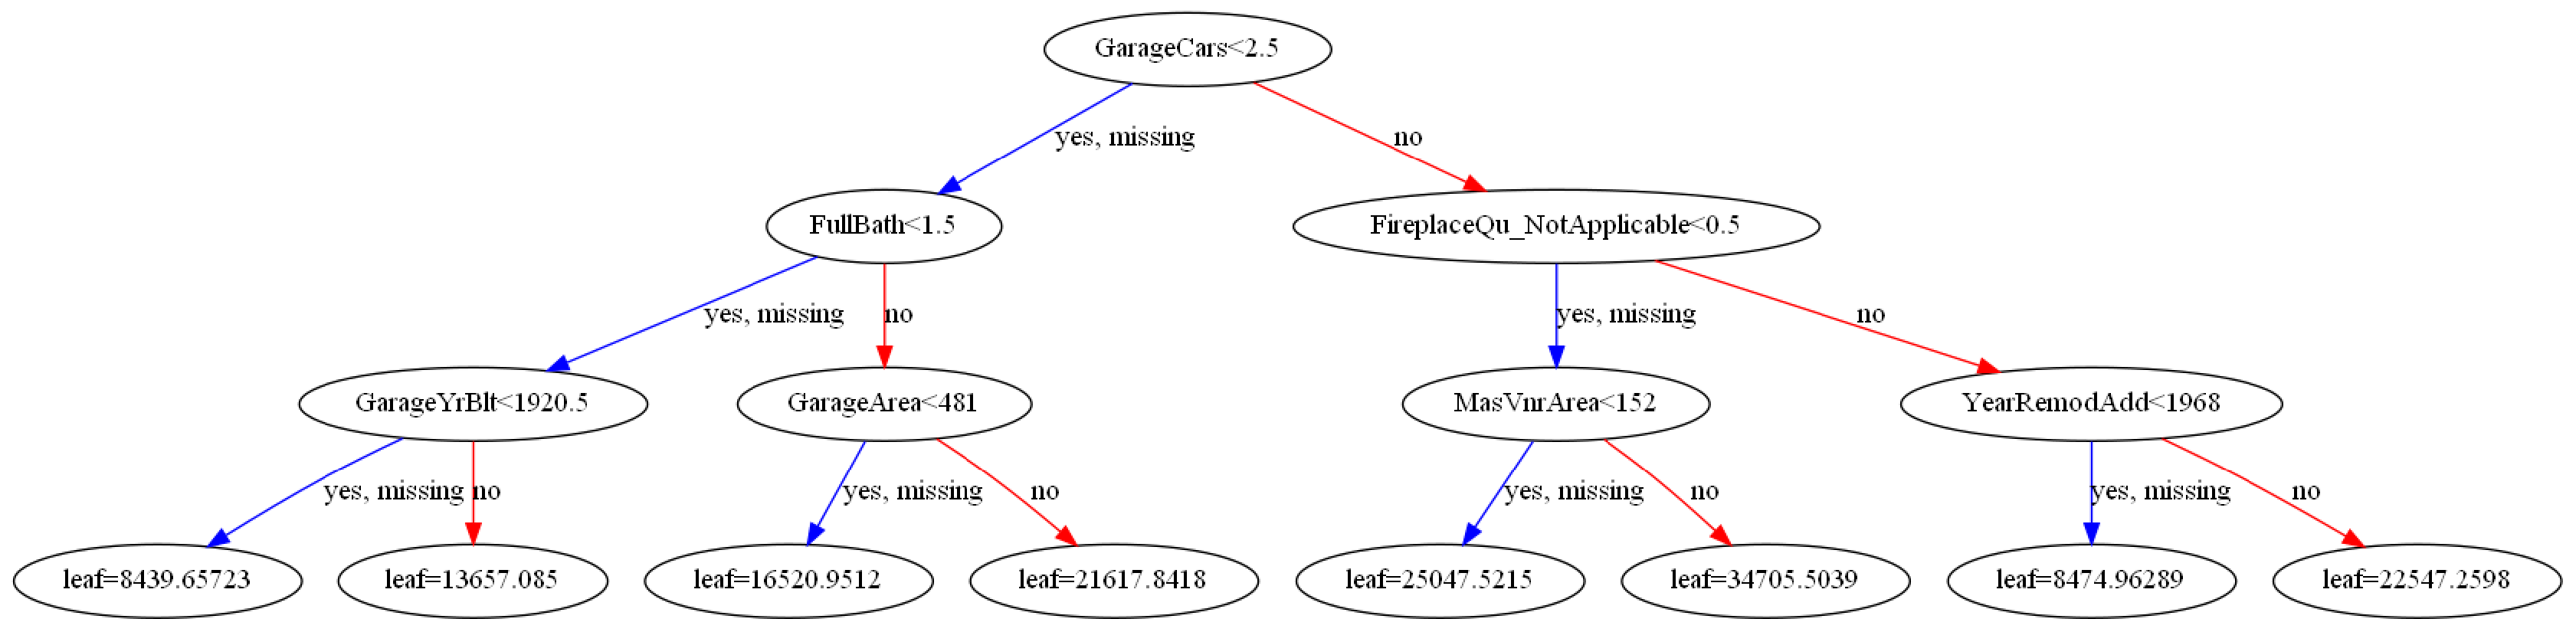

In [167]:
xgb.plot_tree(gsearch1.best_estimator_)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

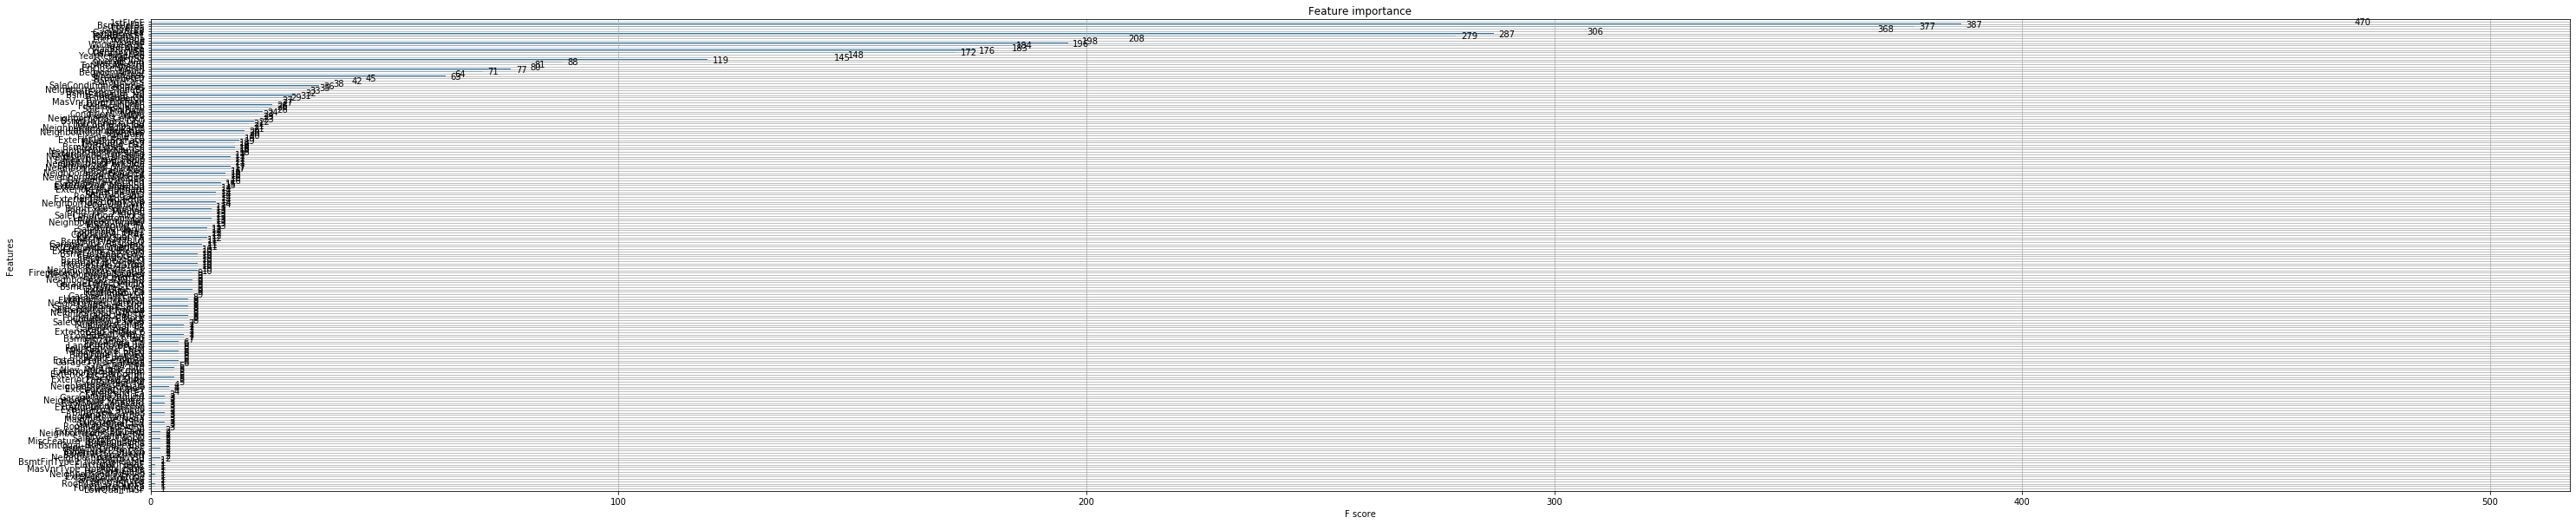

In [168]:
xgb.plot_importance(gsearch1.best_estimator_)
plt.rcParams['figure.figsize'] = [60, 20]
plt.show()

In [169]:
xgb_best1 = gsearch1.best_estimator_


<p><a name="Forest"></a></p>

### XGB Random Forest

In [170]:
# Random Forest
params2 = {
    'n_estimators':[1000],
    'max_depth':[3,5,7],
    'learning_rate':[1],#
    'tree_method':['exact','approx'],
    'gamma':np.linspace(0,1,5),#
    'min_child_weight':np.linspace(1,5,3),#
    'subsample':np.linspace(0.3,0.9,3), # 
    'colsample_bynode':np.linspace(0.3,0.9,3),#
    'reg_alpha':[0,1e-05,1e-03,1e-01,.5,1],#
    'reg_lambda':[0,1e-05,1e-03,1e-01,.5,1],#    
    'scale_pos_weight':np.linspace(1,5,3)#
#     'num_parallel_tree':[25,50,100,150,200]
}

params2 = {
    'max_depth':[3],#
}

xgb_estimator2 = xgb.XGBRFRegressor(learning_rate=1, n_estimators=1000,
     subsample=0.6, colsample_bytree=0.6,seed=42)

gsearch2 = GridSearchCV(estimator=xgb_estimator2,param_grid=params2,
                       scoring='neg_root_mean_squared_error',n_jobs=4,
                       refit='neg_root_mean_squared_error',cv=10,verbose=11)

gsearch2.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done   4 out of  10 | elapsed:    3.2s remaining:    4.9s
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    5.9s remaining:    5.9s
[Parallel(n_jobs=4)]: Done   6 out of  10 | elapsed:    6.2s remaining:    4.1s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    6.2s remaining:    2.6s
[Parallel(n_jobs=4)]: Done   8 out of  10 | elapsed:    6.2s remaining:    1.5s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.8s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    7.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bynode=0.8,
                                      colsample_bytree=0.6, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      learning_rate=1, max_delta_step=None,
                                      max_depth=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      n_estimato...
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=None,
                                      reg_lambda=1e-05, scale_pos_weight=None,
                                      seed=42, subsamp

In [171]:
print(list(gsearch2.cv_results_.keys()))
gsearch2.cv_results_

['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score']


{'mean_fit_time': array([2.81029644]),
 'std_fit_time': array([0.6035823]),
 'mean_score_time': array([0.01240044]),
 'std_score_time': array([0.00142788]),
 'param_max_depth': masked_array(data=[3],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3}],
 'split0_test_score': array([-35947.8314082]),
 'split1_test_score': array([-30800.12522369]),
 'split2_test_score': array([-31367.18620457]),
 'split3_test_score': array([-35908.26873608]),
 'split4_test_score': array([-29309.60962462]),
 'split5_test_score': array([-35376.71223127]),
 'split6_test_score': array([-35160.05206478]),
 'split7_test_score': array([-43860.35179658]),
 'split8_test_score': array([-28548.76933375]),
 'split9_test_score': array([-40930.32850955]),
 'mean_test_score': array([-34720.92351331]),
 'std_test_score': array([4686.38306717]),
 'rank_test_score': array([1])}

In [172]:
print(f'Best Estimator: {gsearch2.best_estimator_}')
print(f'Best Parameters: {gsearch2.best_params_}')
print(f'Best Score: {gsearch2.best_score_}')

Best Estimator: XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=0.6, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=1000, n_jobs=8, num_parallel_tree=1000,
               objective='reg:squarederror', random_state=42, reg_alpha=0,
               reg_lambda=1e-05, scale_pos_weight=1, seed=42, subsample=0.6,
               tree_method='exact', validate_parameters=1, verbosity=None)
Best Parameters: {'max_depth': 3}
Best Score: -34720.92351330914


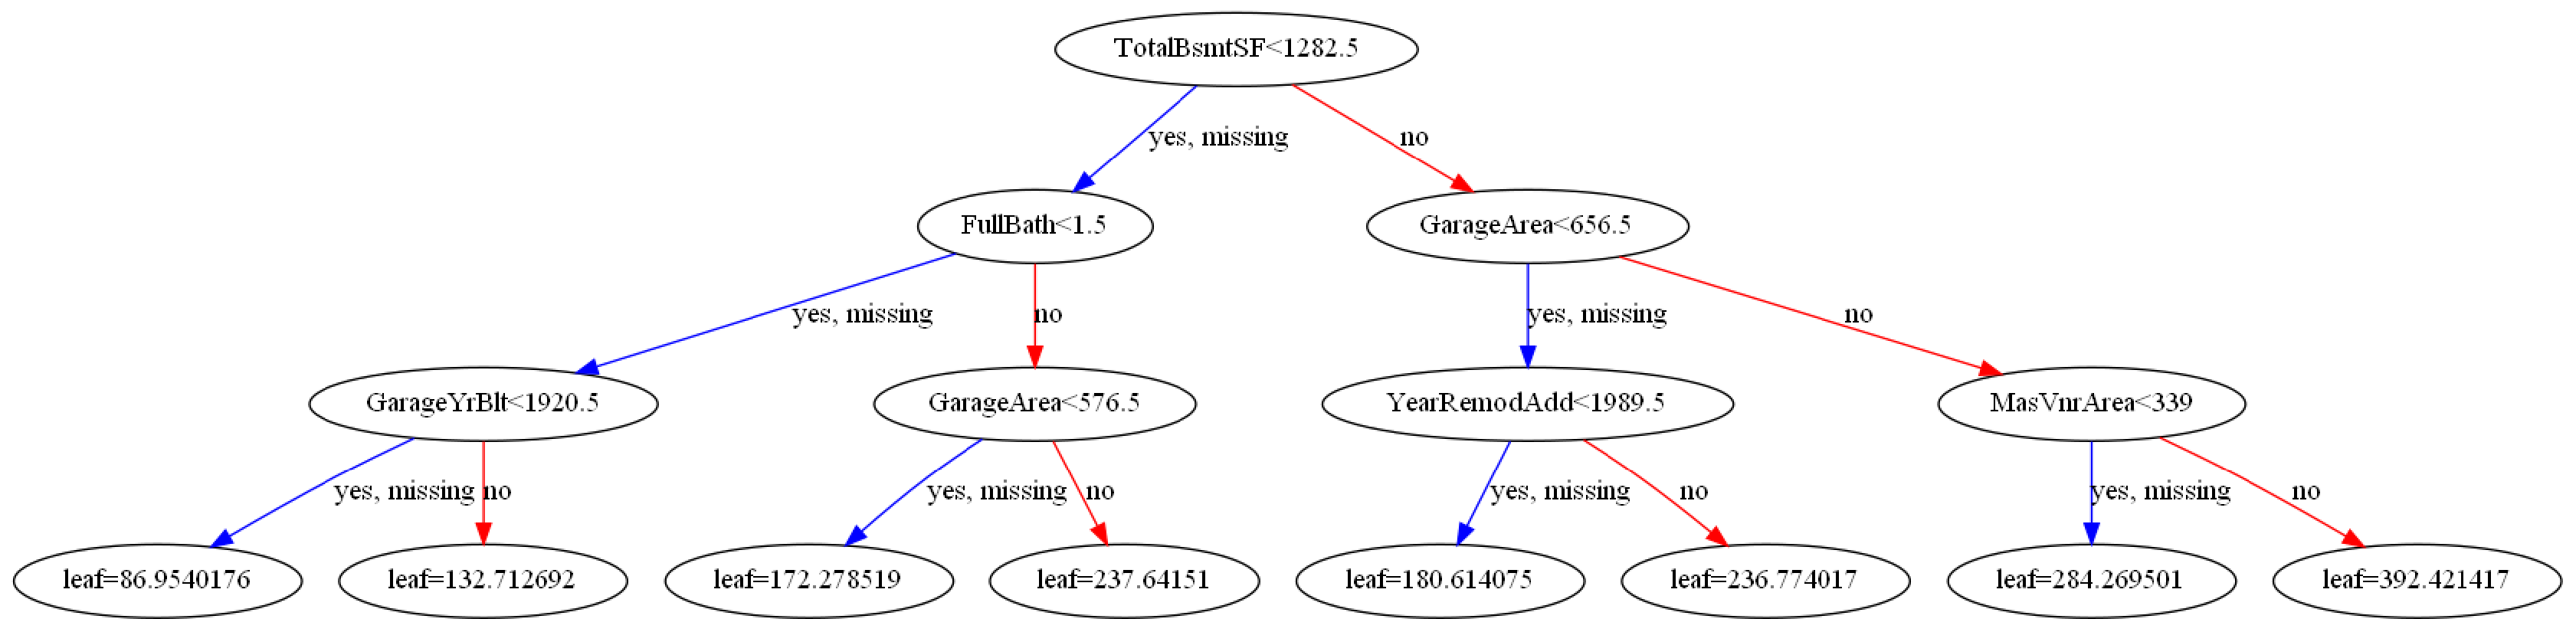

In [173]:
xgb.plot_tree(gsearch2.best_estimator_)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

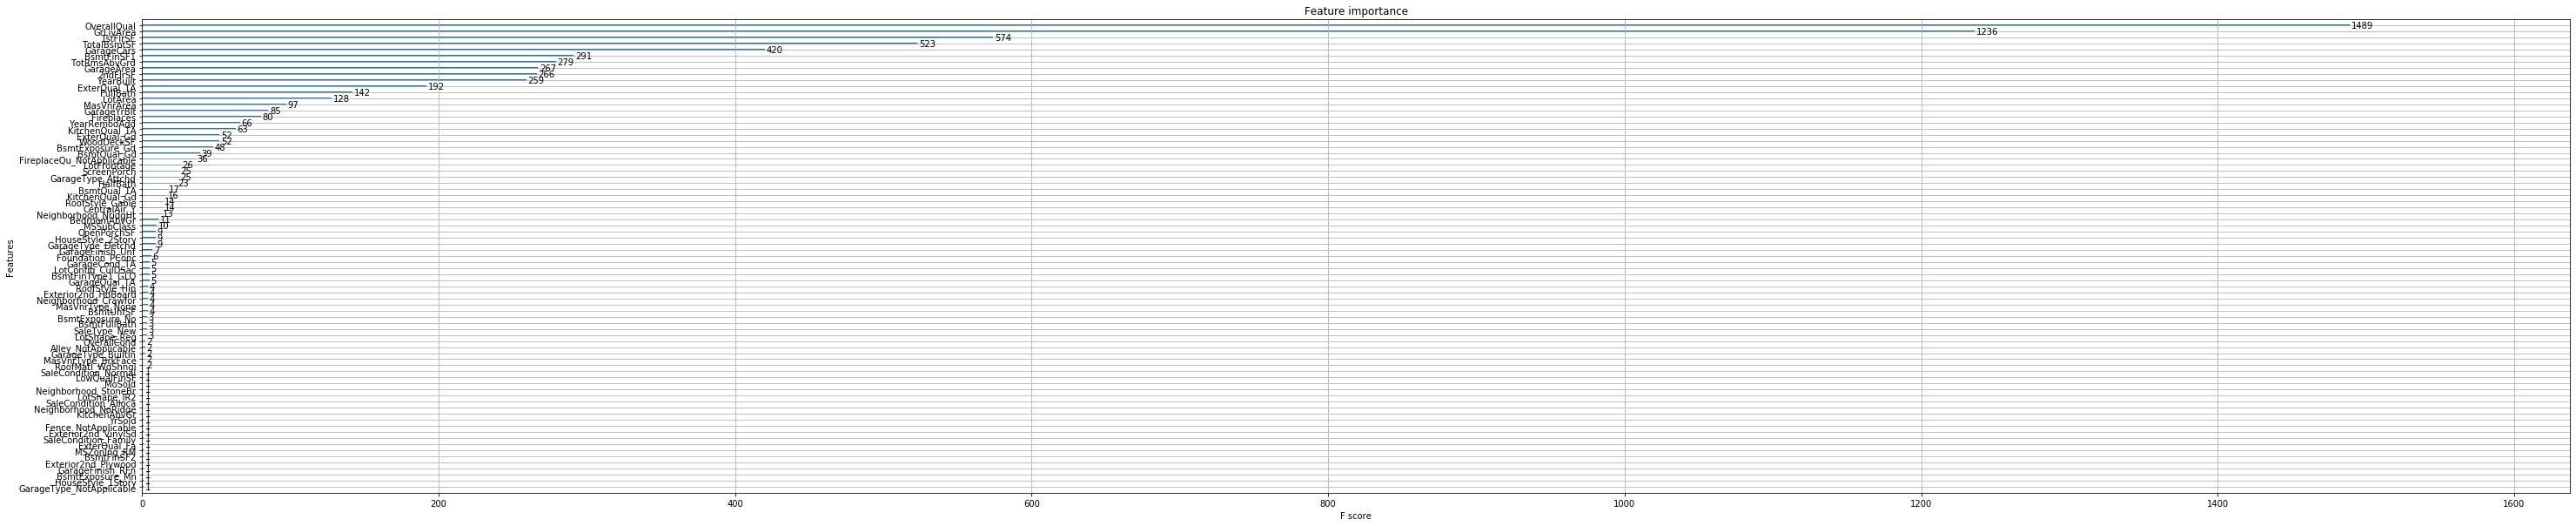

In [174]:
xgb.plot_importance(gsearch2.best_estimator_)
plt.rcParams['figure.figsize'] = [60, 20]
plt.show()

In [175]:
xgb_best2 = gsearch2.best_estimator_

<p><a name="Compare"></a></p>

### Compare and Predict

In [177]:
print(xgb_best1.fit(X_train,y_train))
print(xgb_best1.score(X_test,y_test))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)
0.9071505139943657


In [178]:
print(xgb_best2.fit(X_train,y_train))
print(xgb_best2.score(X_test,y_test))

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=0.8, colsample_bytree=0.6, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=1000, n_jobs=8, num_parallel_tree=1000,
               objective='reg:squarederror', random_state=42, reg_alpha=0,
               reg_lambda=1e-05, scale_pos_weight=1, seed=42, subsample=0.6,
               tree_method='exact', validate_parameters=1, verbosity=None)
0.8064181055709905


In [179]:
# Whichever has the highest score, refit with full dataset:
xgb_best1.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [189]:
pd.DataFrame({'Id':x.index+1, 'SalePrice':xgb_best1.predict(x)}).to_csv('submission.csv',index=False)